Feature.name                       Source                              
1 movie_id                           movies                              
2 depart_Lighting_female             movie_crew LEFT OUTER JOIN crew_dim 
3 original_language                  movies                              
4 sw_collection                      movie_collection                    
5 depart_Visual_Effects_female       movie_crew LEFT OUTER JOIN crew_dim 
6 runtime_cat                        movies                              
  Value.type  Scale   Data.type Unique.count Measure.unit Conversion.factor Min
1 Categorical Nominal Decimal   NA           NA           NA                 1 
2 Numeric     Ratio   Decimal    2           NA           NA                 0 
3 Categorical Nominal Text      44           NA           NA                NA 
4 Categorical Ratio   Decimal    3           NA           NA                 0 
5 Numeric     Ratio   Decimal    3           NA           NA                 0 
6 Categorical Ordinal Text       3           NA           NA                 1 
  Max  Outlier.treatment Null
1 7398 NA                NA  
2    1 Null              NA  
3   NA Leave             NA  
4    2 Leave             NA  
5    2 Leave             NA  
6    3 Leave             NA  
  Notes                                                                           
1 NA                                                                              
2 NA                                                                              
3 NA                                                                              
4 Movies belongin to multiple collections look like an error (check movie_id= 555)
5 NA                                                                              
6 NA

column name: depart_Lighting_female


Data.Type: Numeric


column name: original_language


Data.Type: Categorical


column name: sw_collection


Data.Type: Categorical


column name: depart_Visual_Effects_female


Data.Type: Numeric




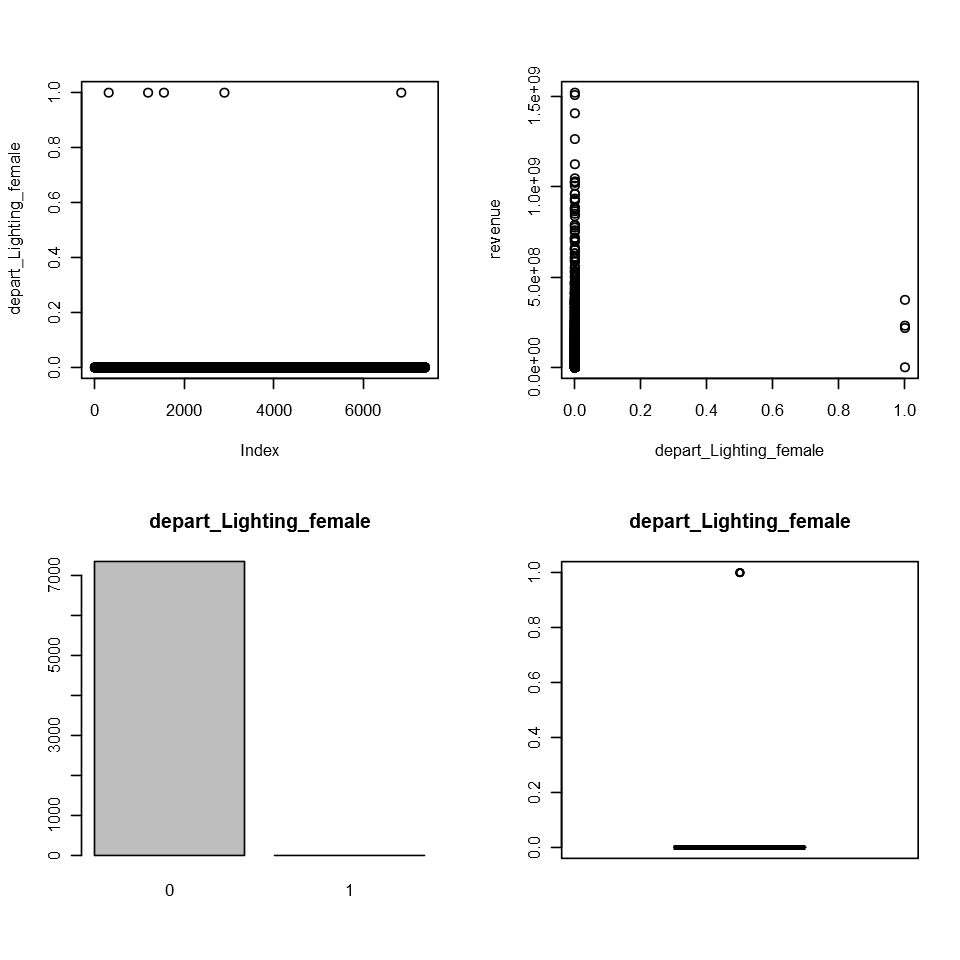

column name: runtime_cat


Data.Type: Categorical


column name: depart_Camera_female


Data.Type: Numeric




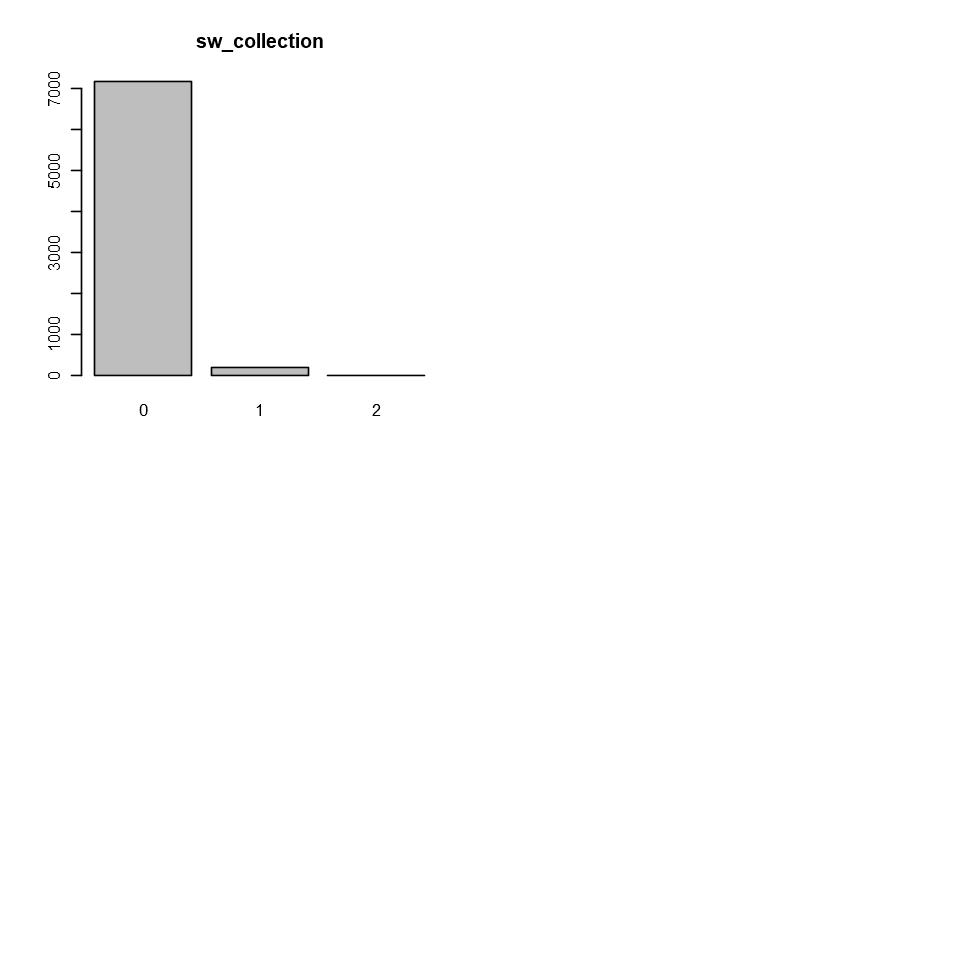

column name: sw_lang_en


Data.Type: Categorical




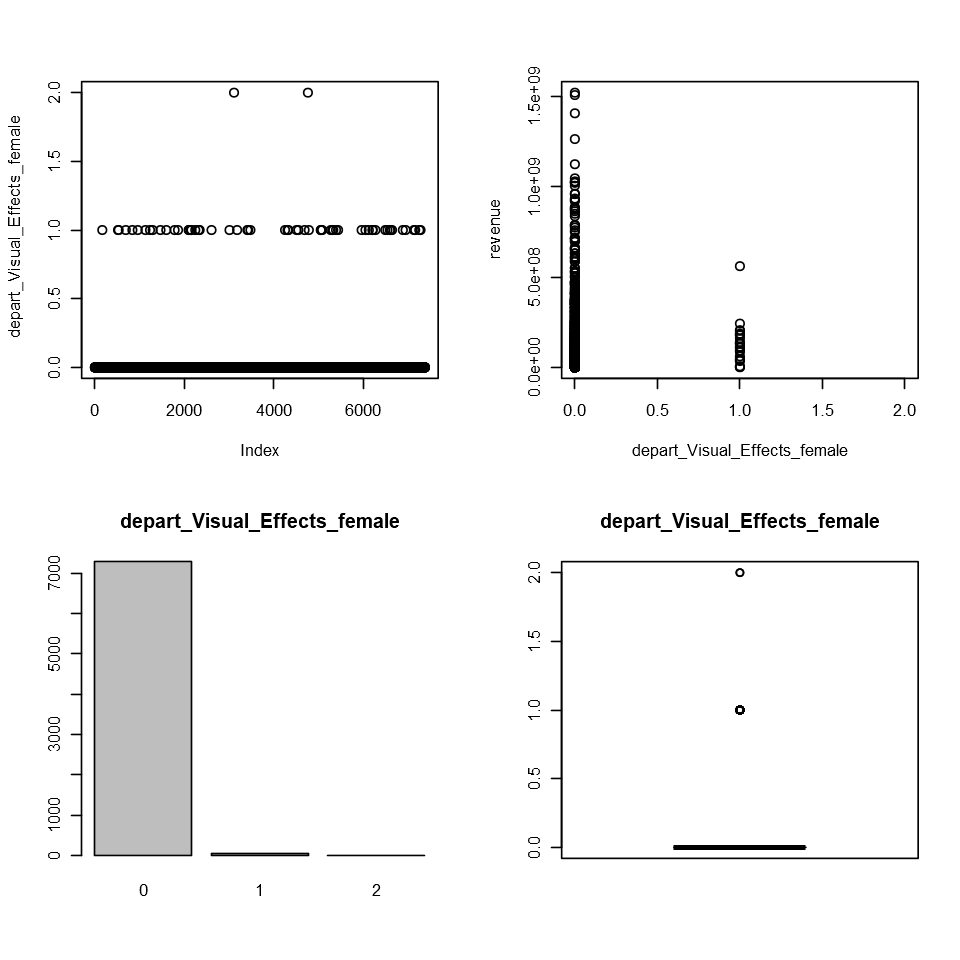

column name: sw_web_presence


Data.Type: Categorical




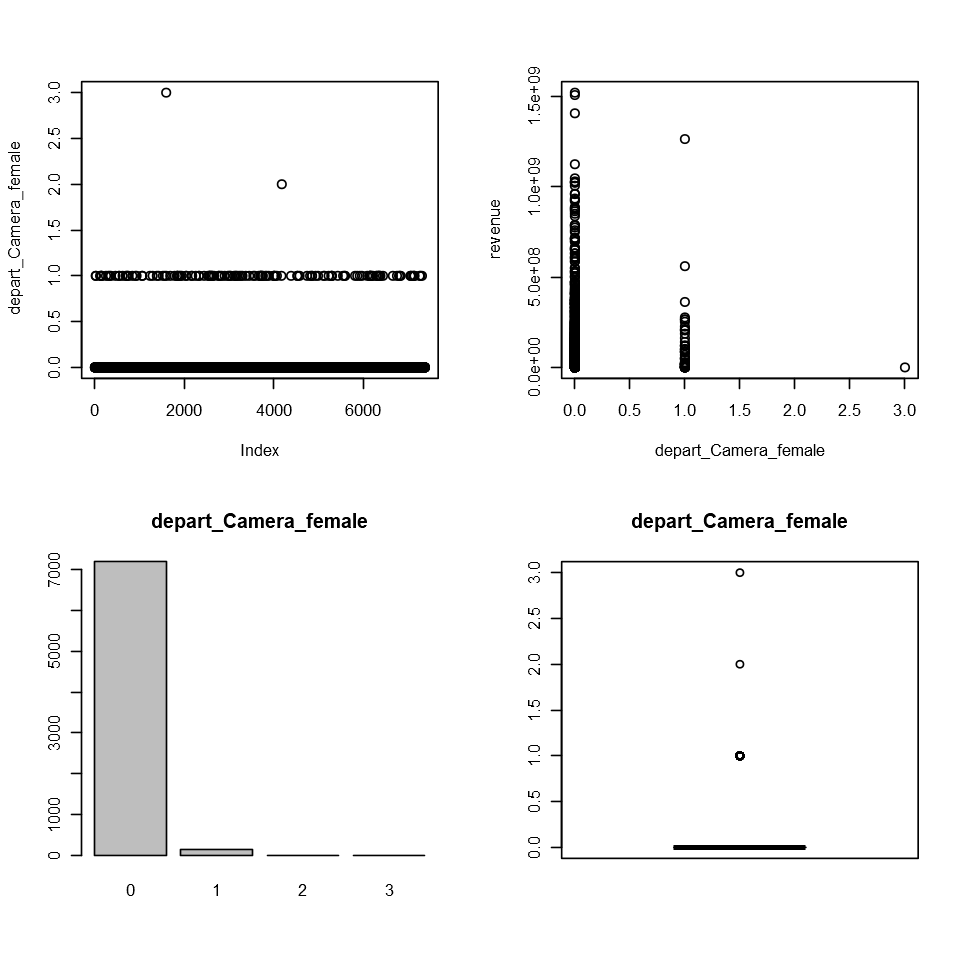

column name: sw_has_poster


Data.Type: Categorical




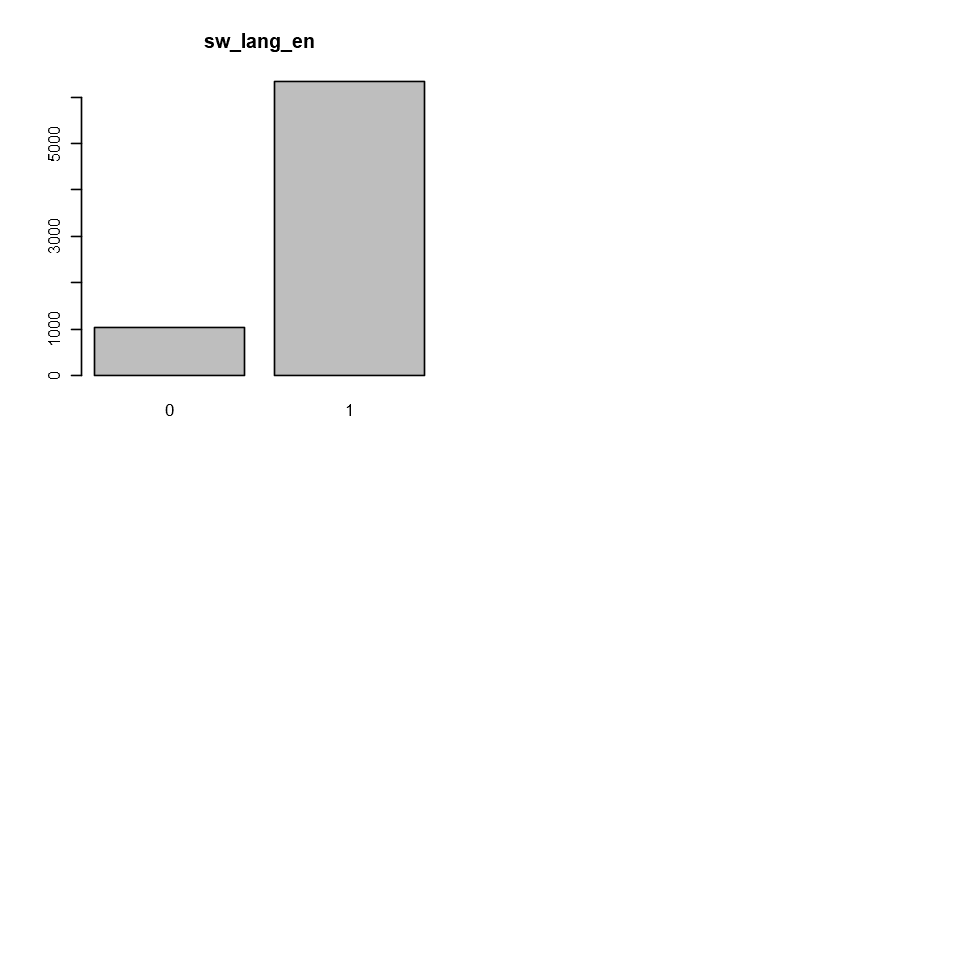

column name: sw_tagline


Data.Type: Categorical




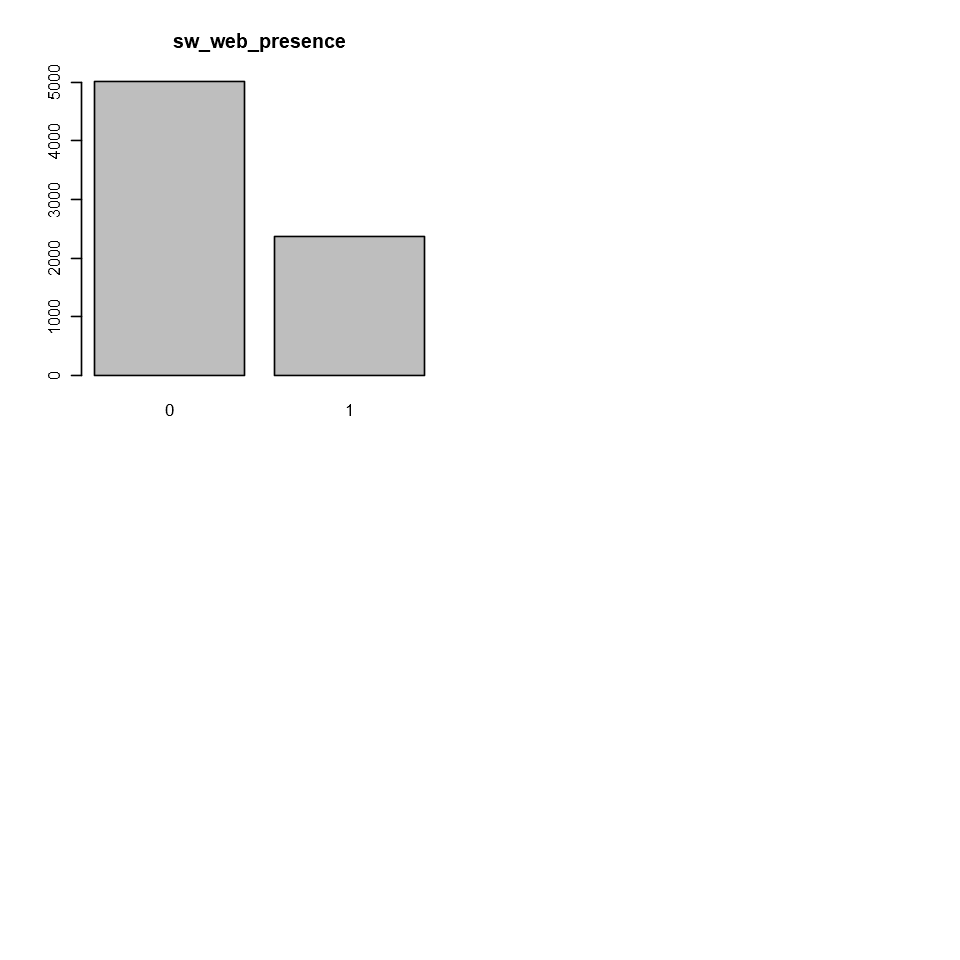

column name: depart_Directing_female


Data.Type: Numeric




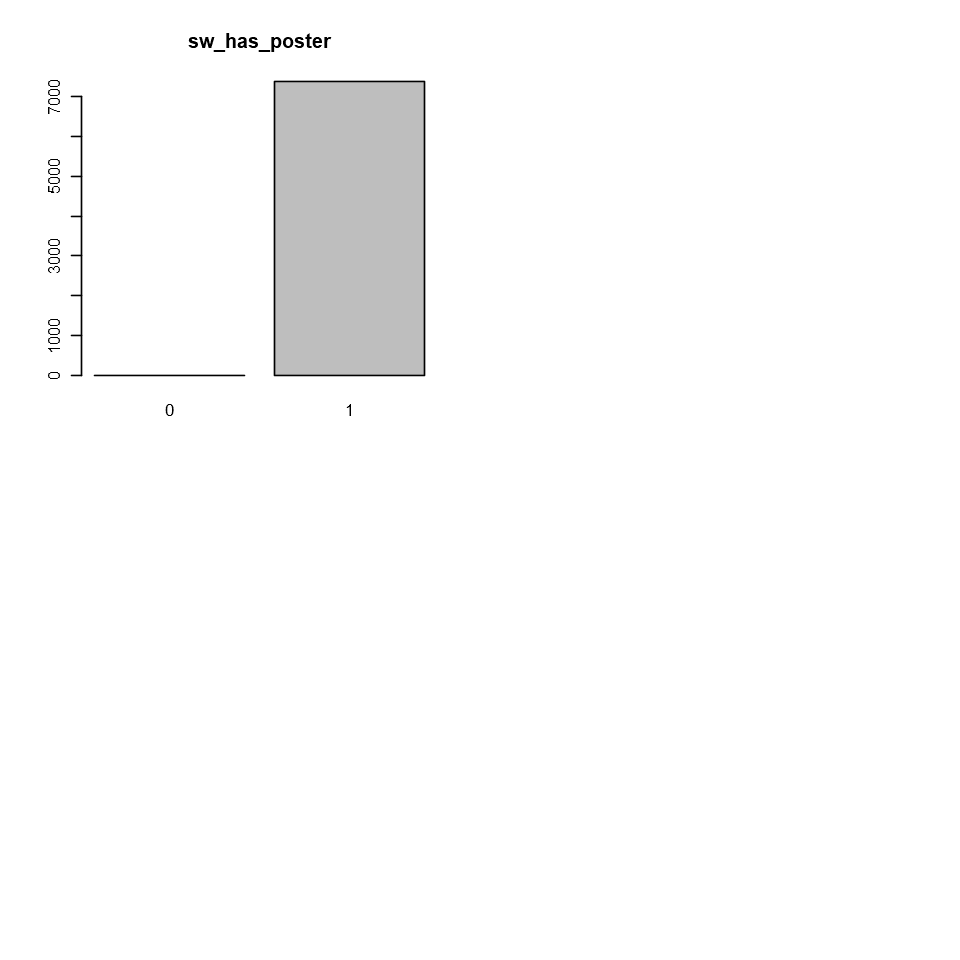

column name: release_date


Data.Type: Date


column name: release_year


Data.Type: Categorical




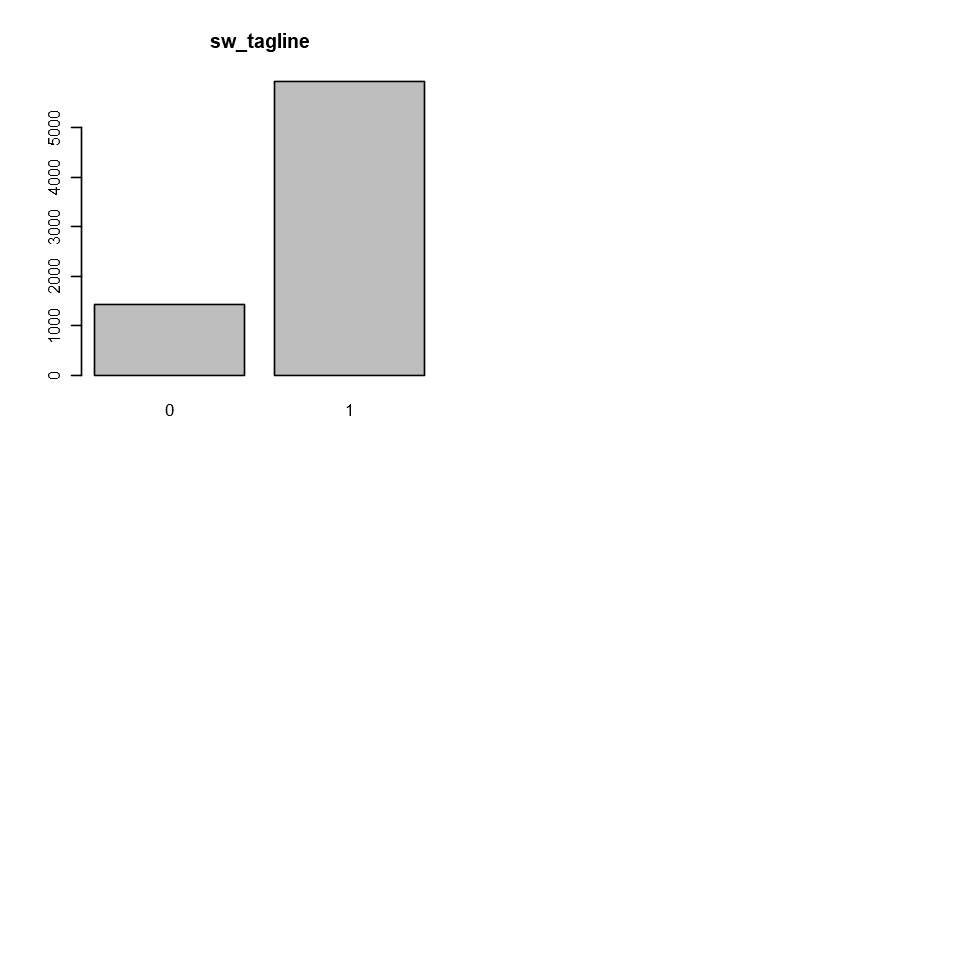

column name: release_month


Data.Type: Categorical




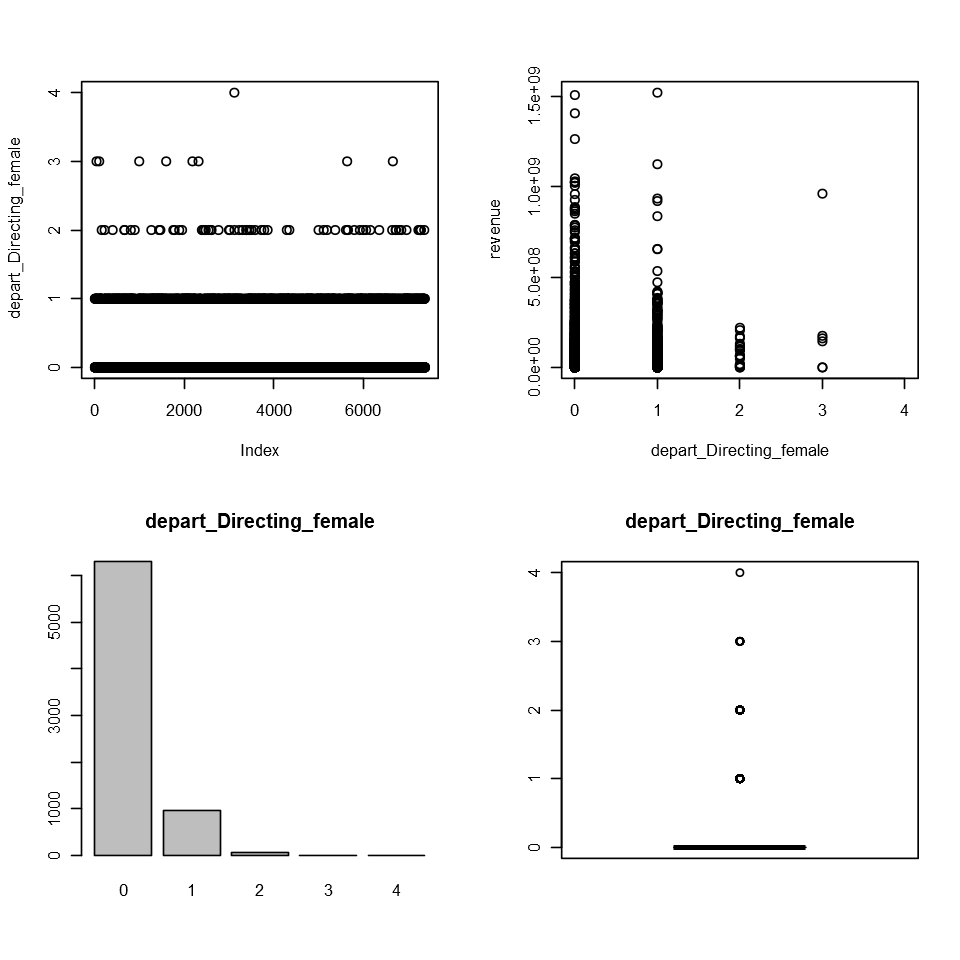

column name: release_day


Data.Type: Categorical




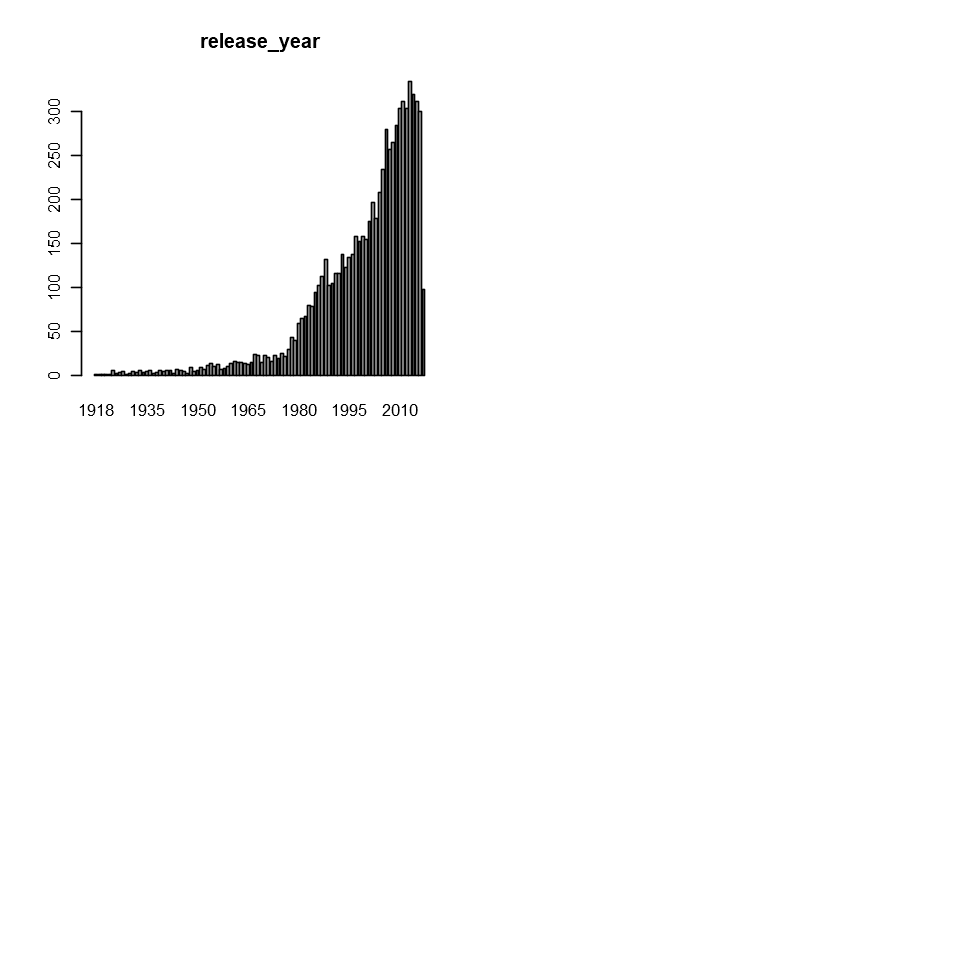

column name: high_release_month


Data.Type: Categorical




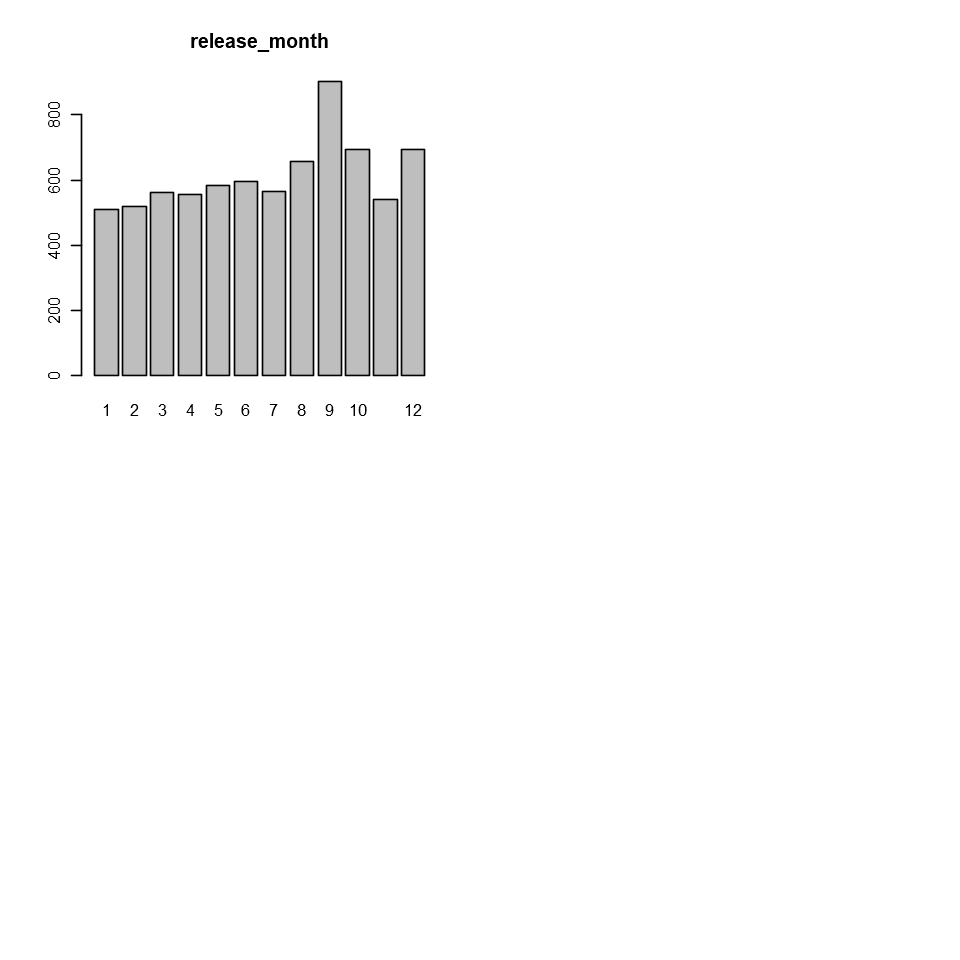

column name: depart_Editing_female


Data.Type: Numeric




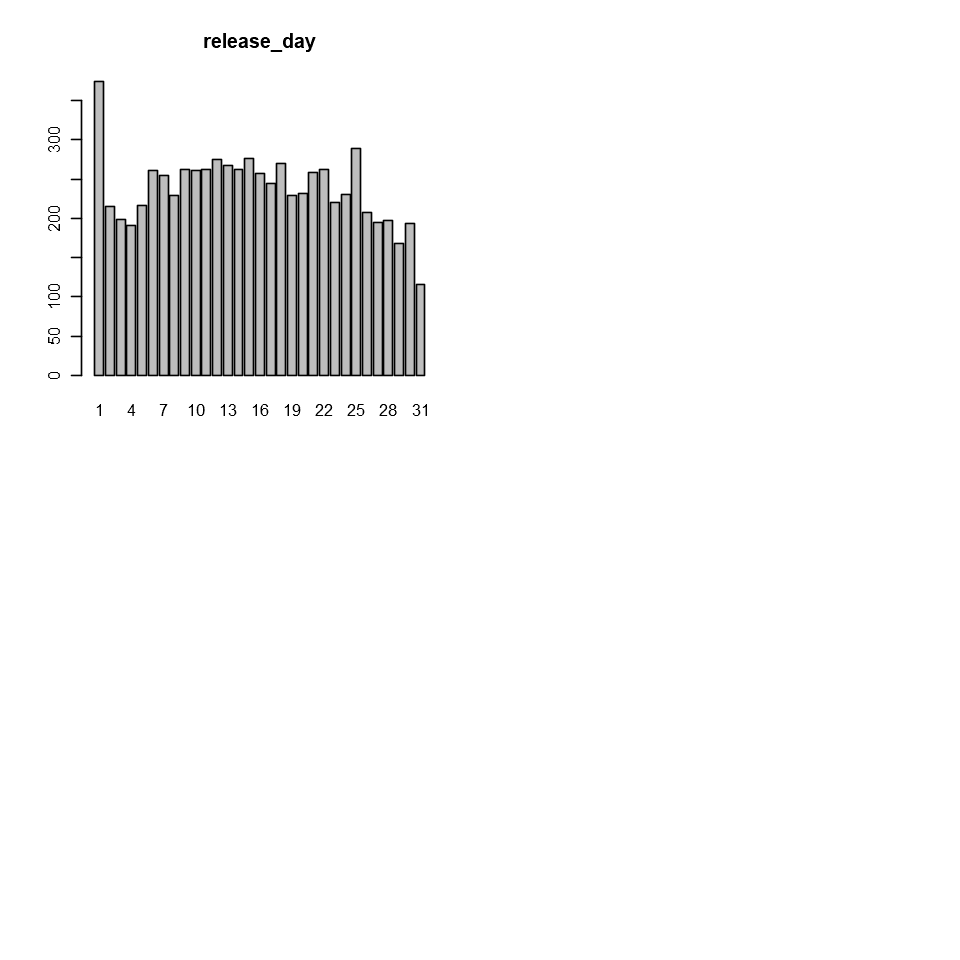

column name: depart_Sound_female


Data.Type: Numeric




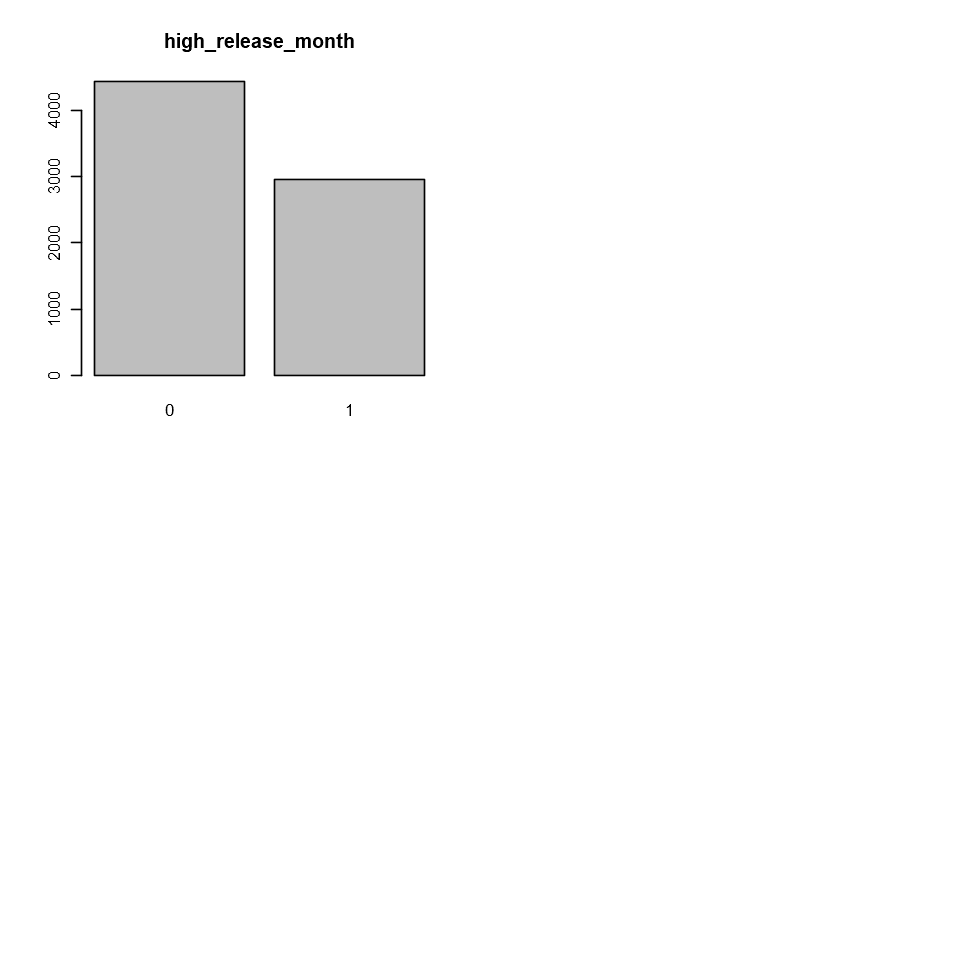

column name: depart_Writing_female


Data.Type: Numeric




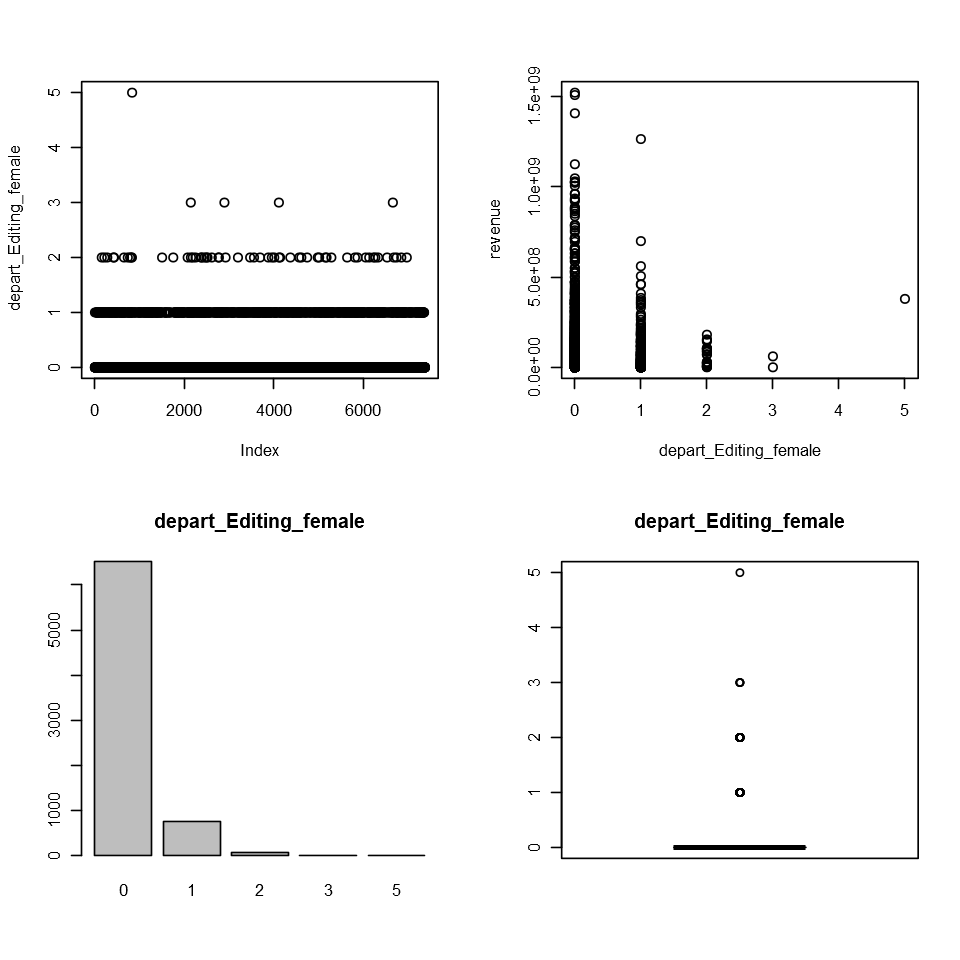

column name: director_movies_5y_cnt


Data.Type: Numeric




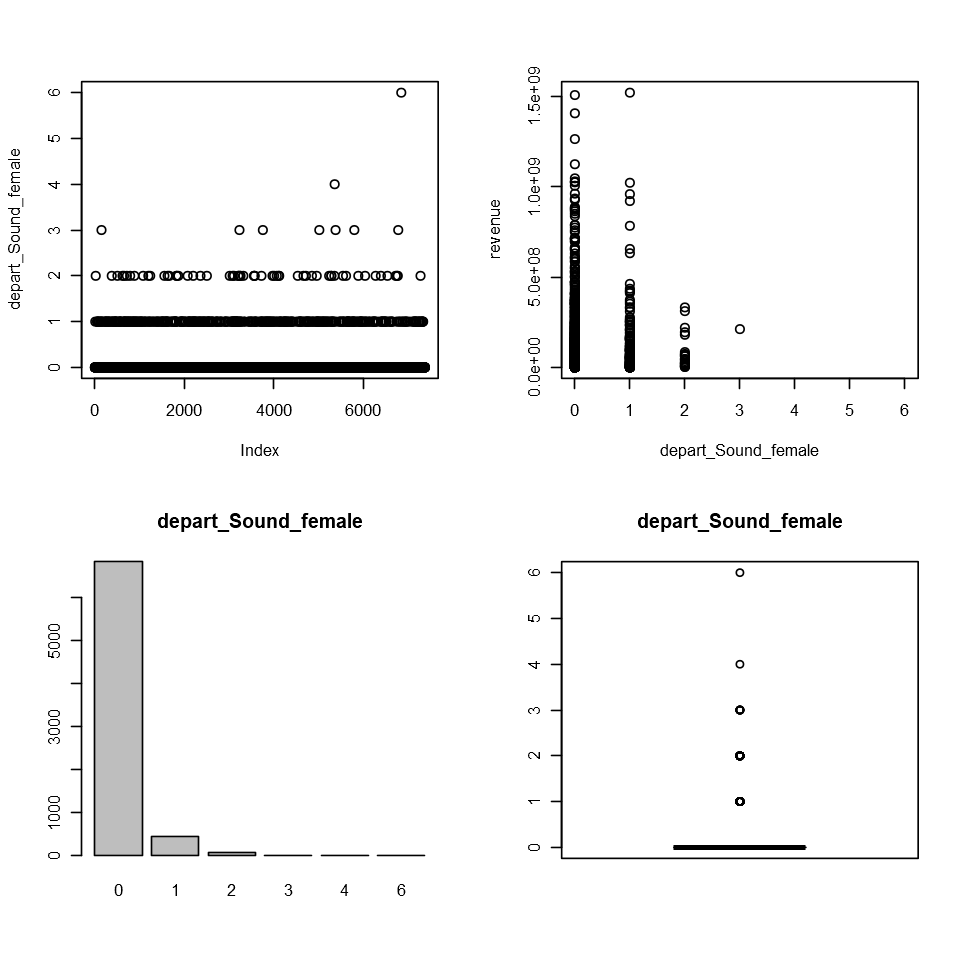

column name: lang_US


Data.Type: Categorical




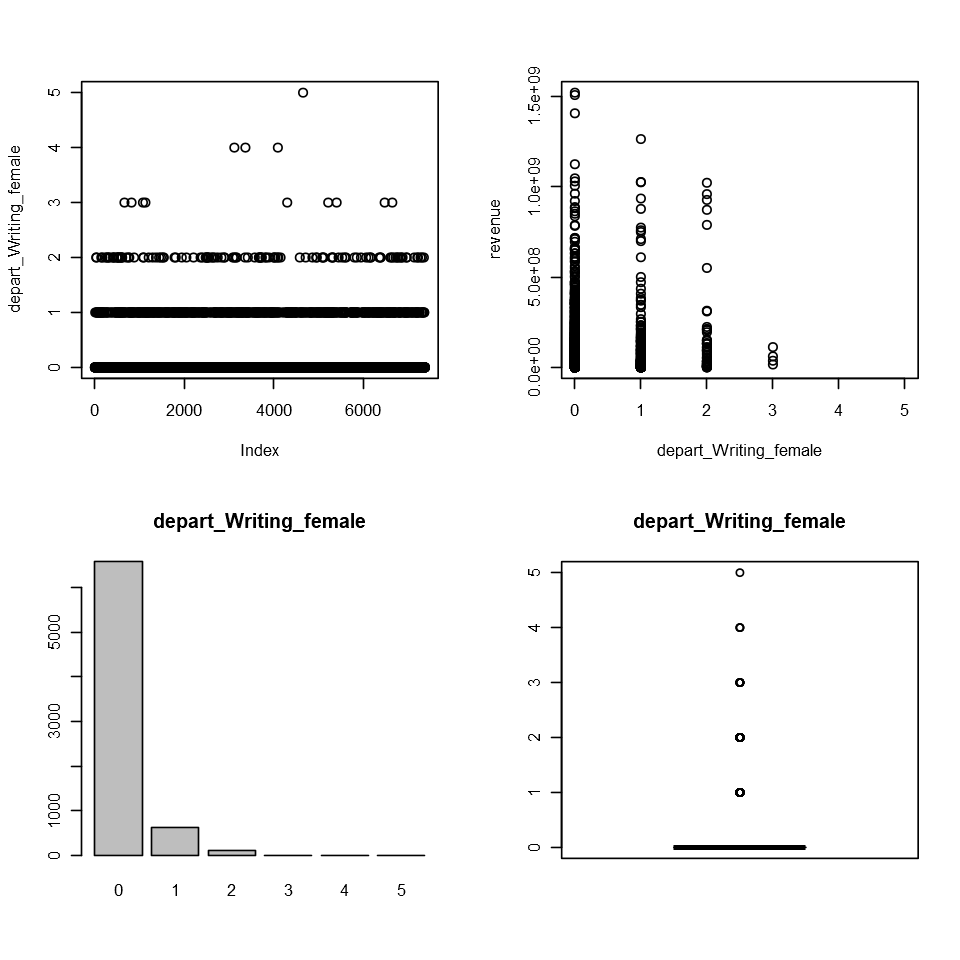

column name: lang_FR


Data.Type: Categorical




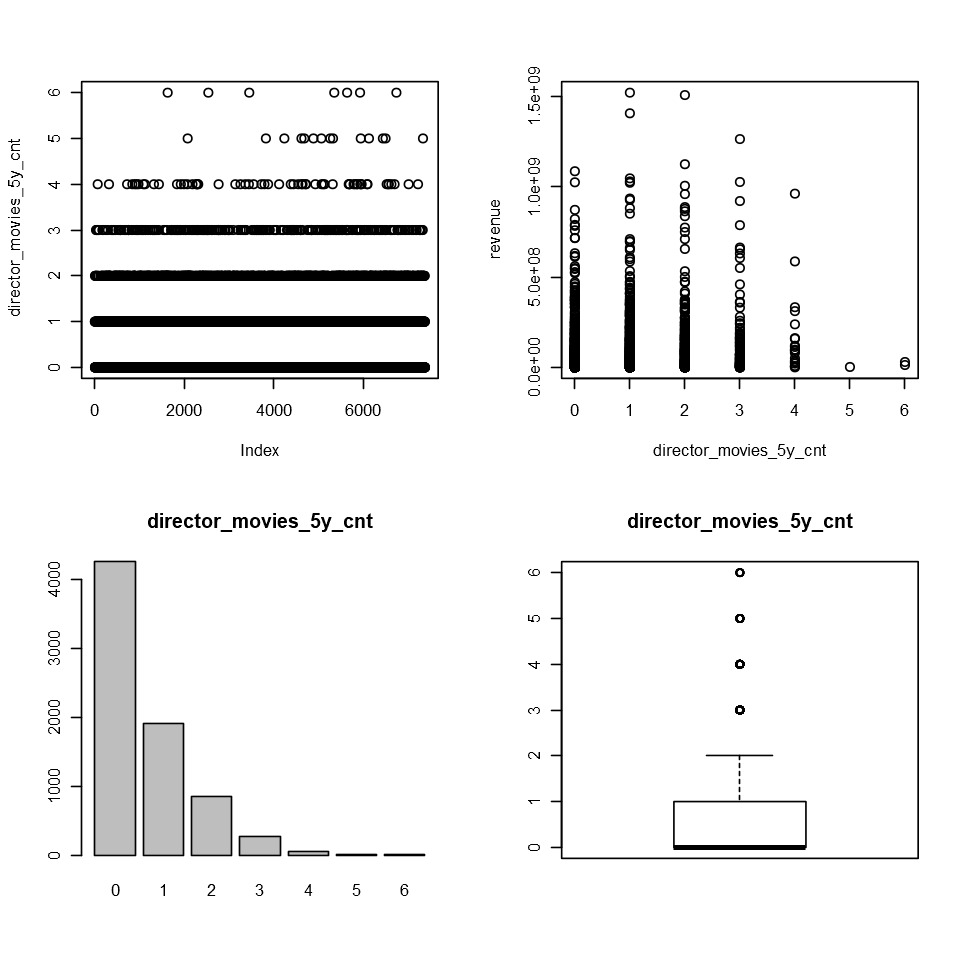

column name: lang_RU


Data.Type: Categorical




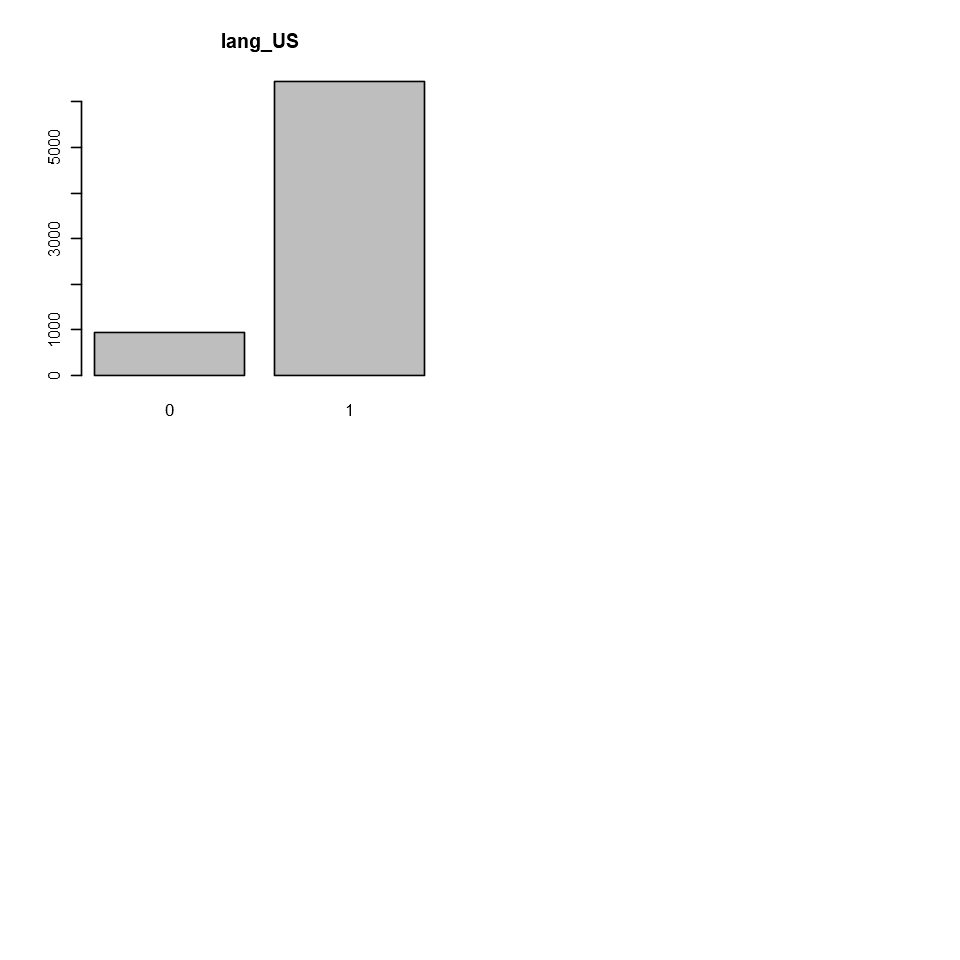

column name: lang_ES


Data.Type: Categorical




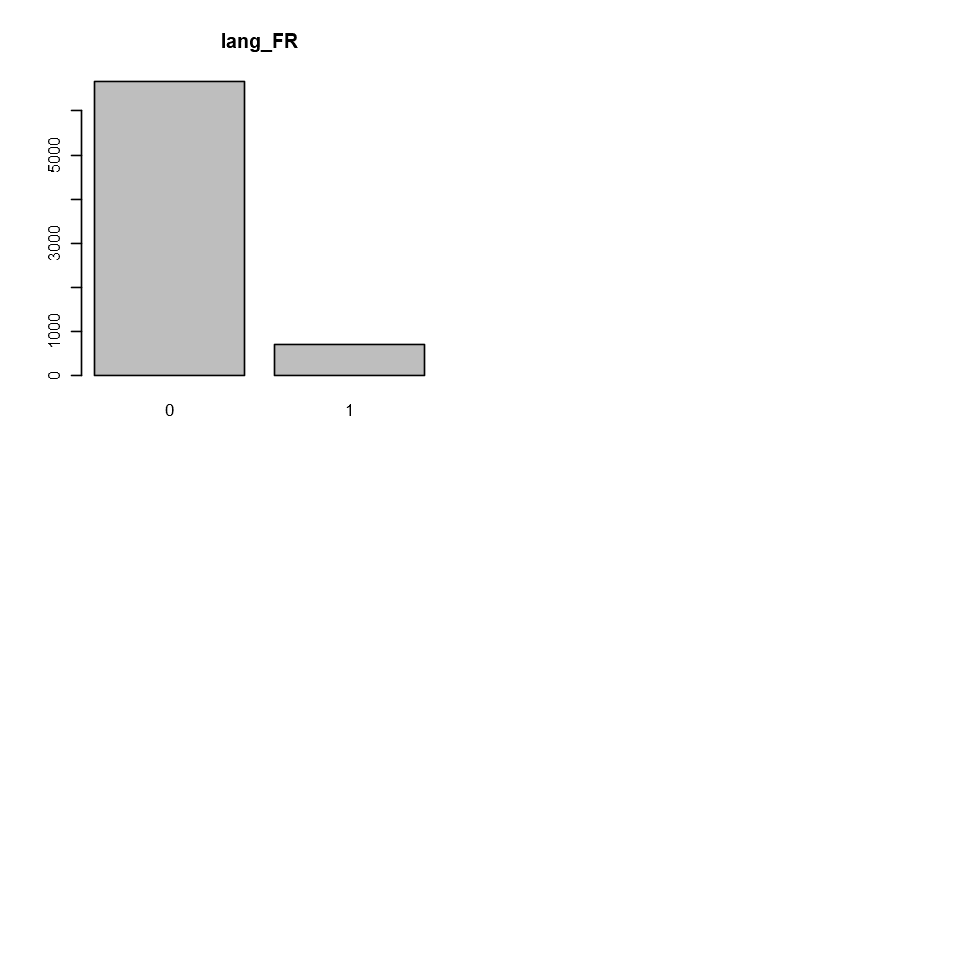

column name: lang_JA


Data.Type: Categorical




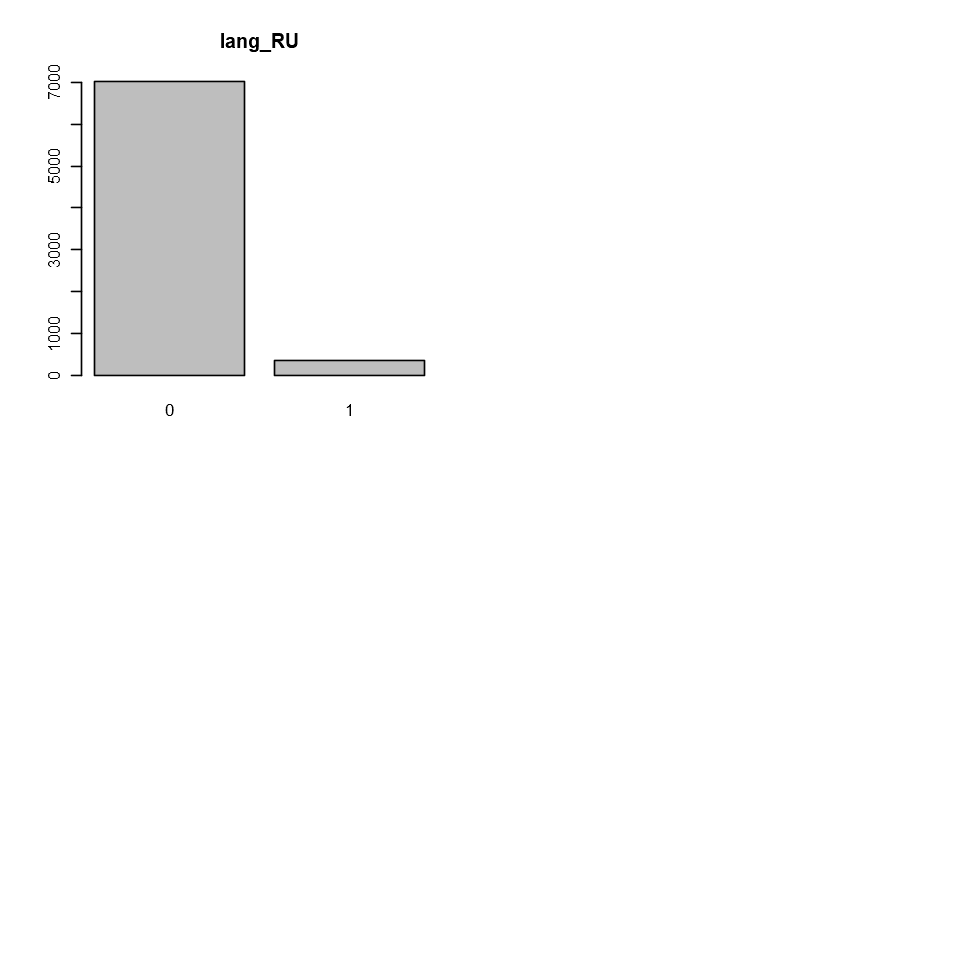

column name: depart_Custom_Mkup_female


Data.Type: Numeric




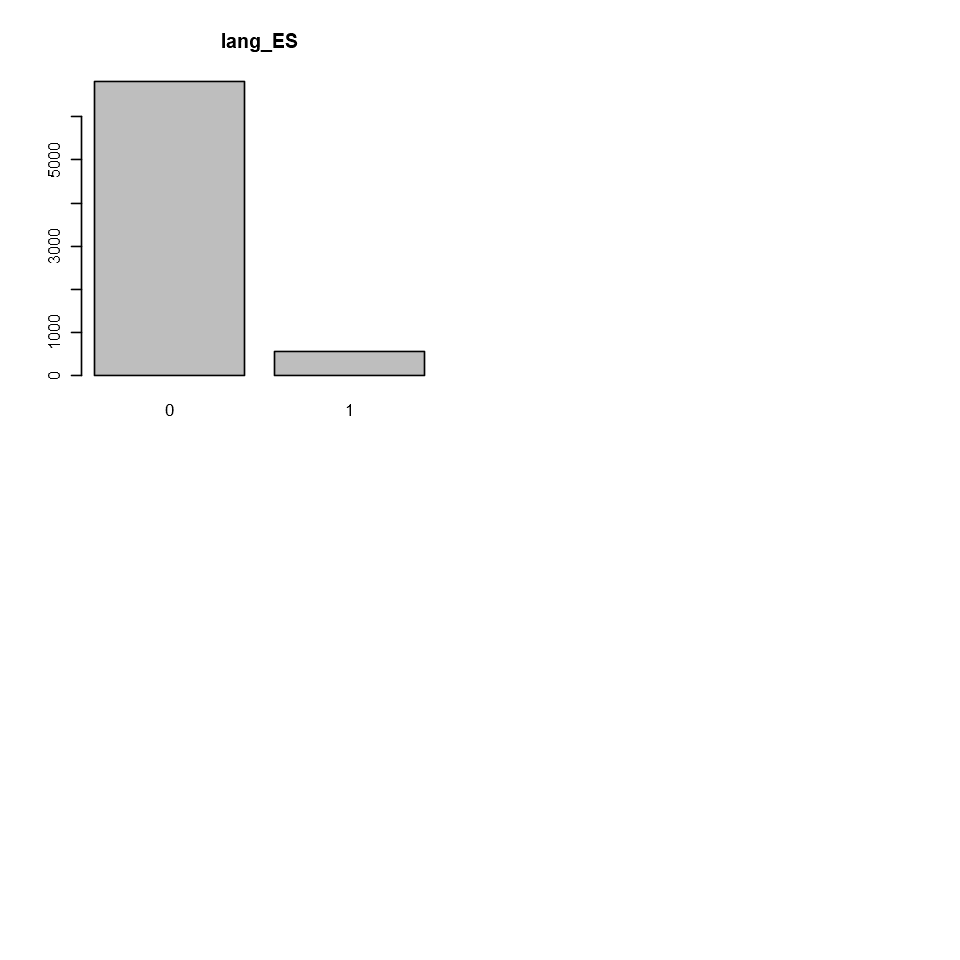

column name: depart_Art_female


Data.Type: Numeric




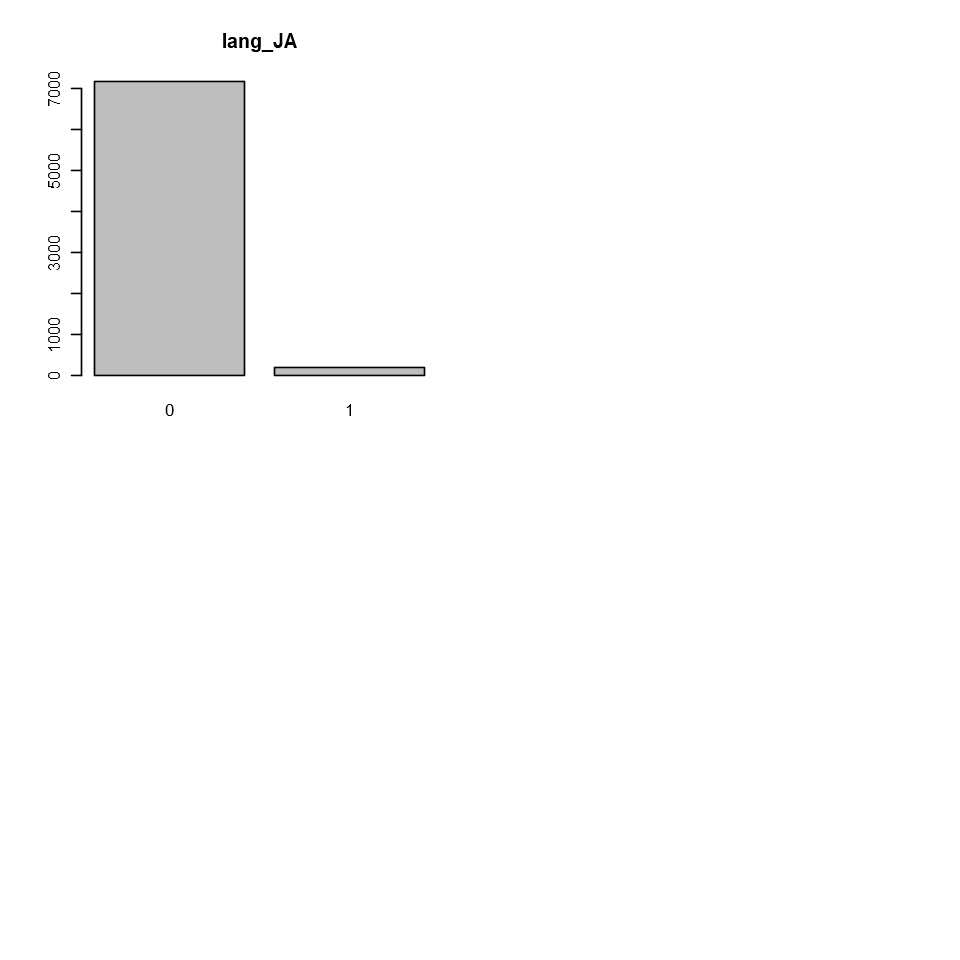

column name: depart_Crew_female


Data.Type: Numeric




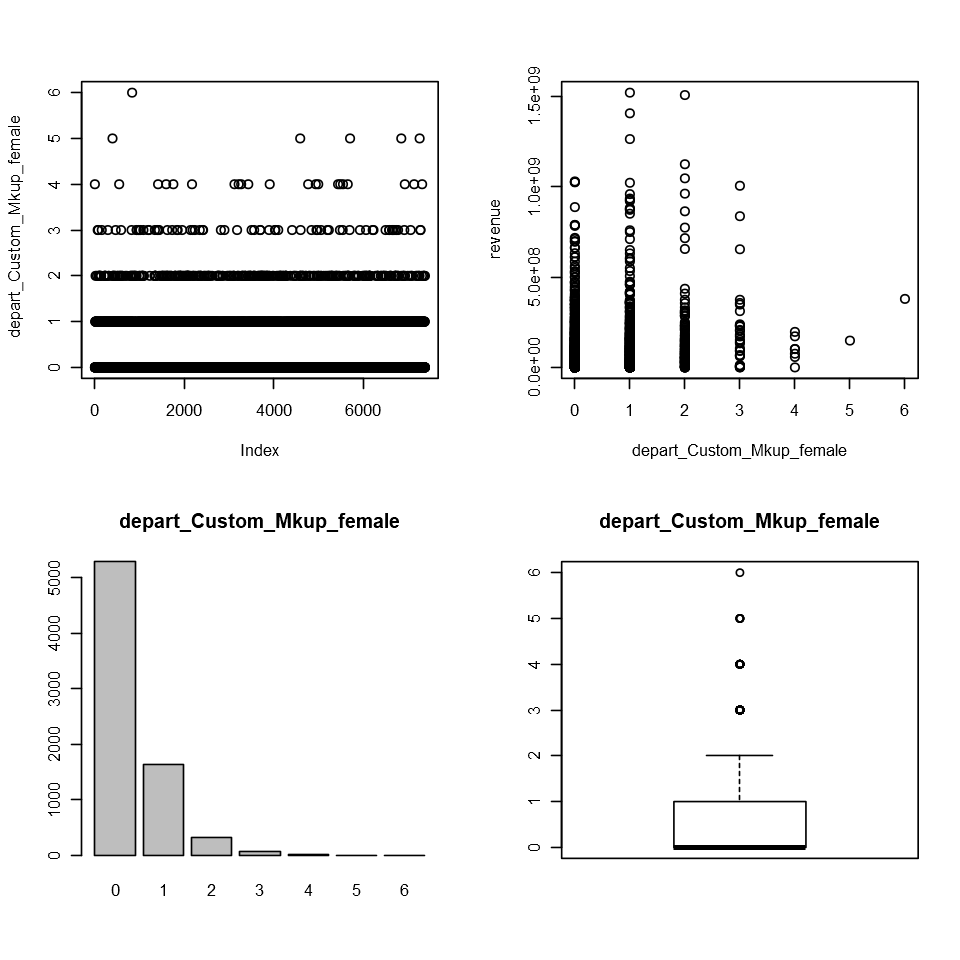

column name: seasonality


Data.Type: Numeric




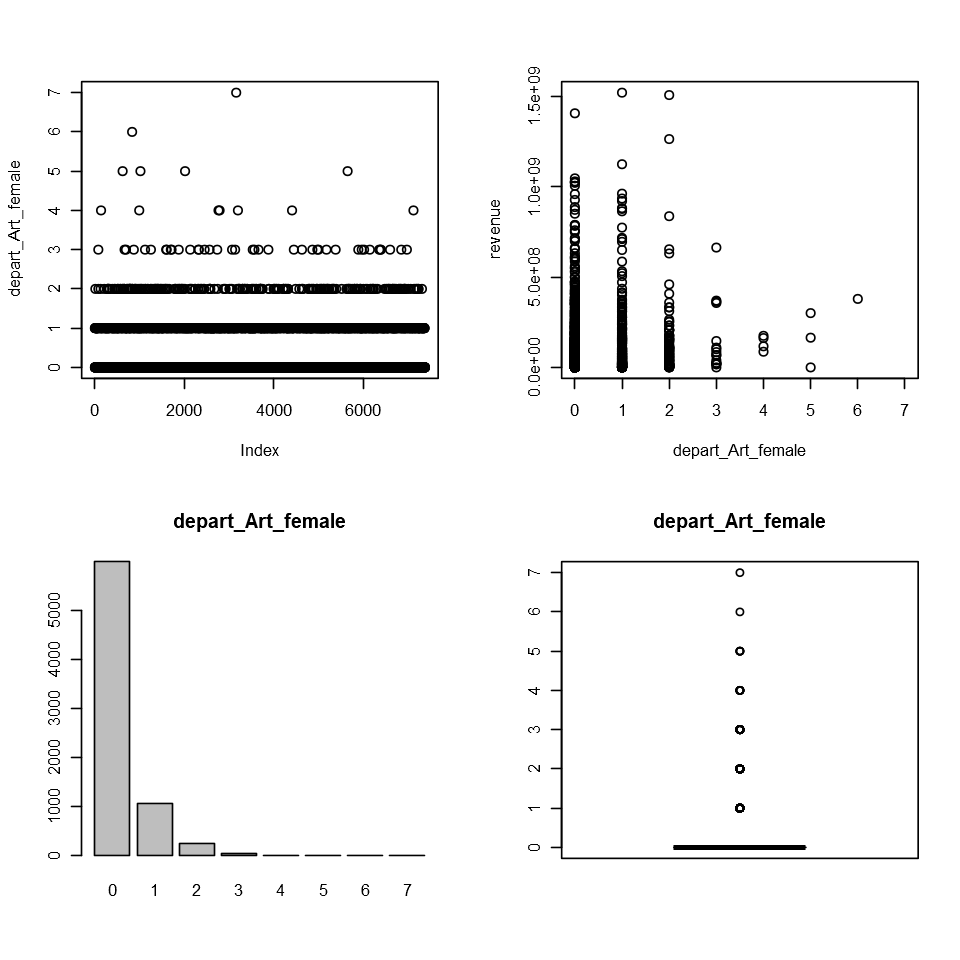

Warning message in FUN(X[[i]], ...):
"NaNs produced"
column name: countries_cnt


Data.Type: Numeric




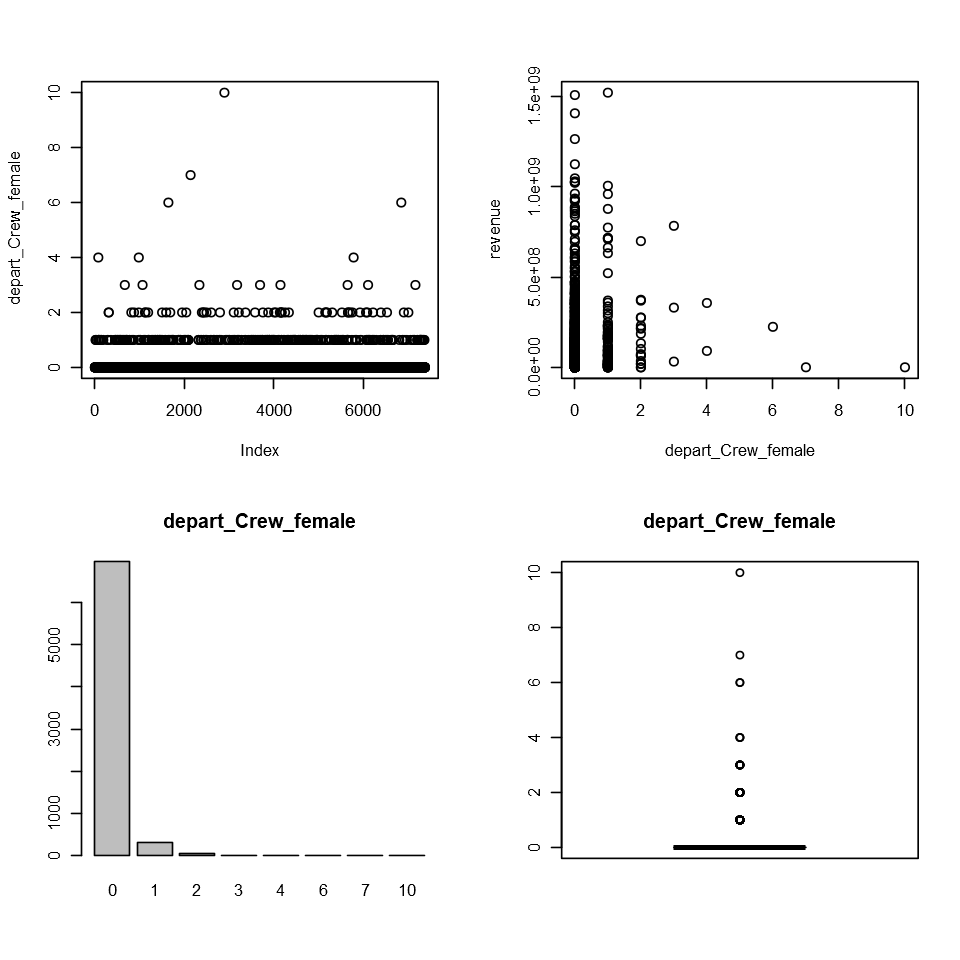

column name: depart_Production_female


Data.Type: Numeric




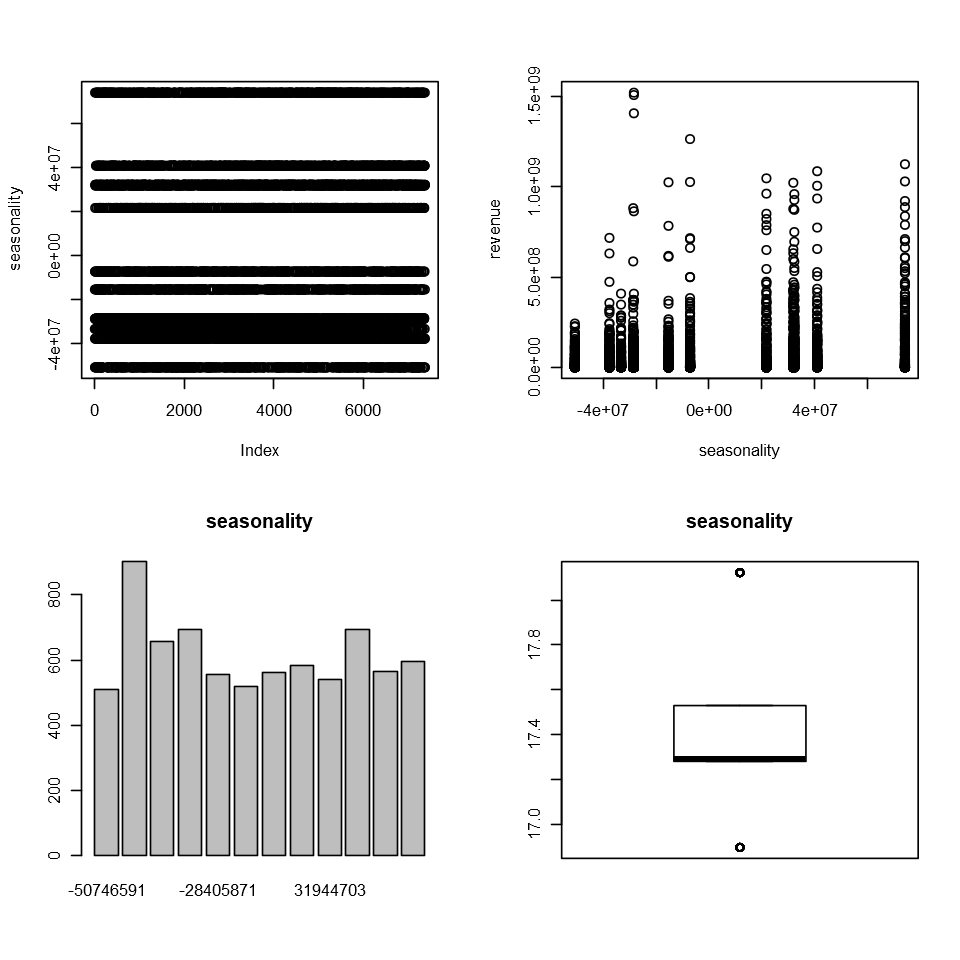

column name: sw_female_actor0


Data.Type: Categorical




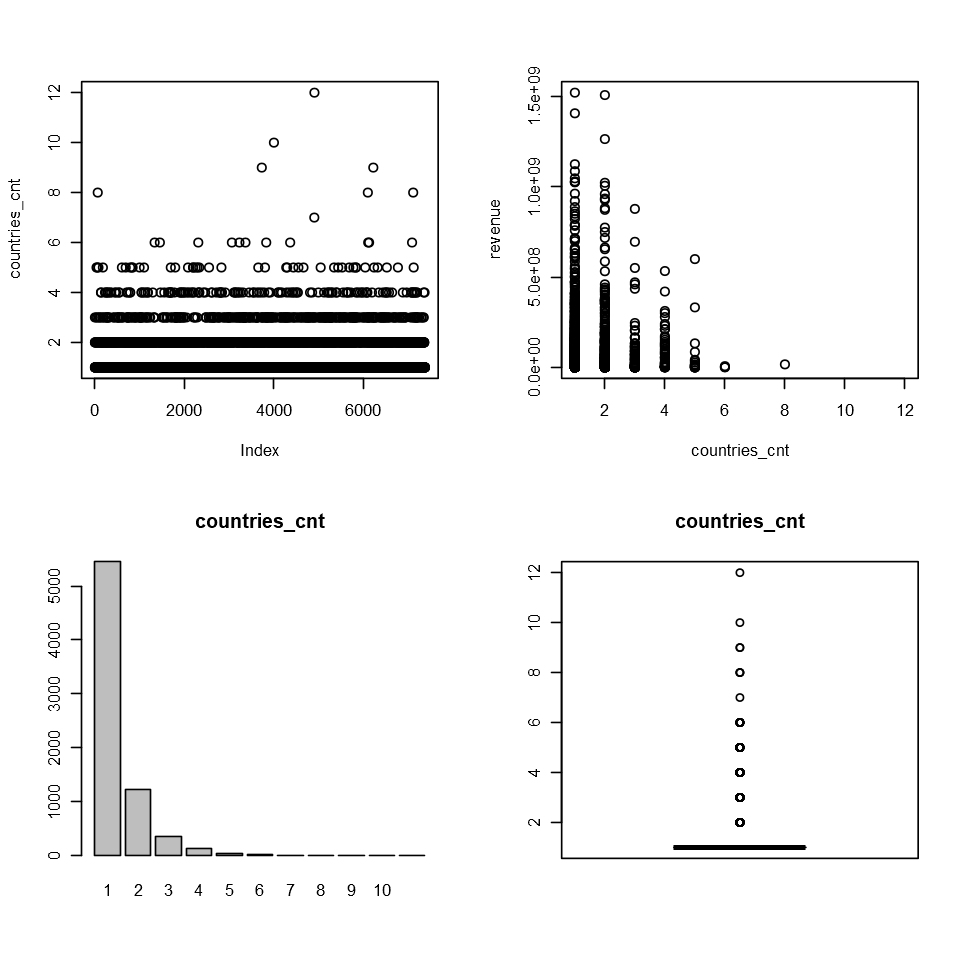

column name: sw_female_actor1


Data.Type: Categorical




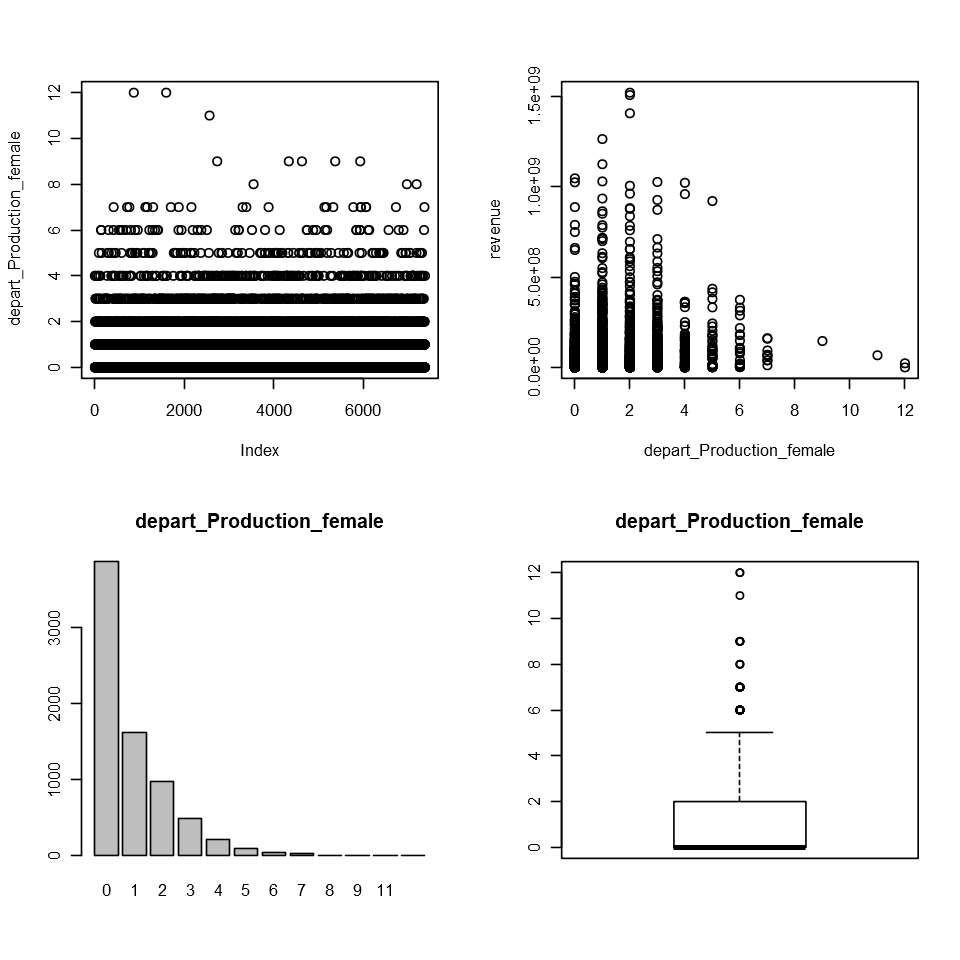

column name: sw_female_actor2


Data.Type: Categorical




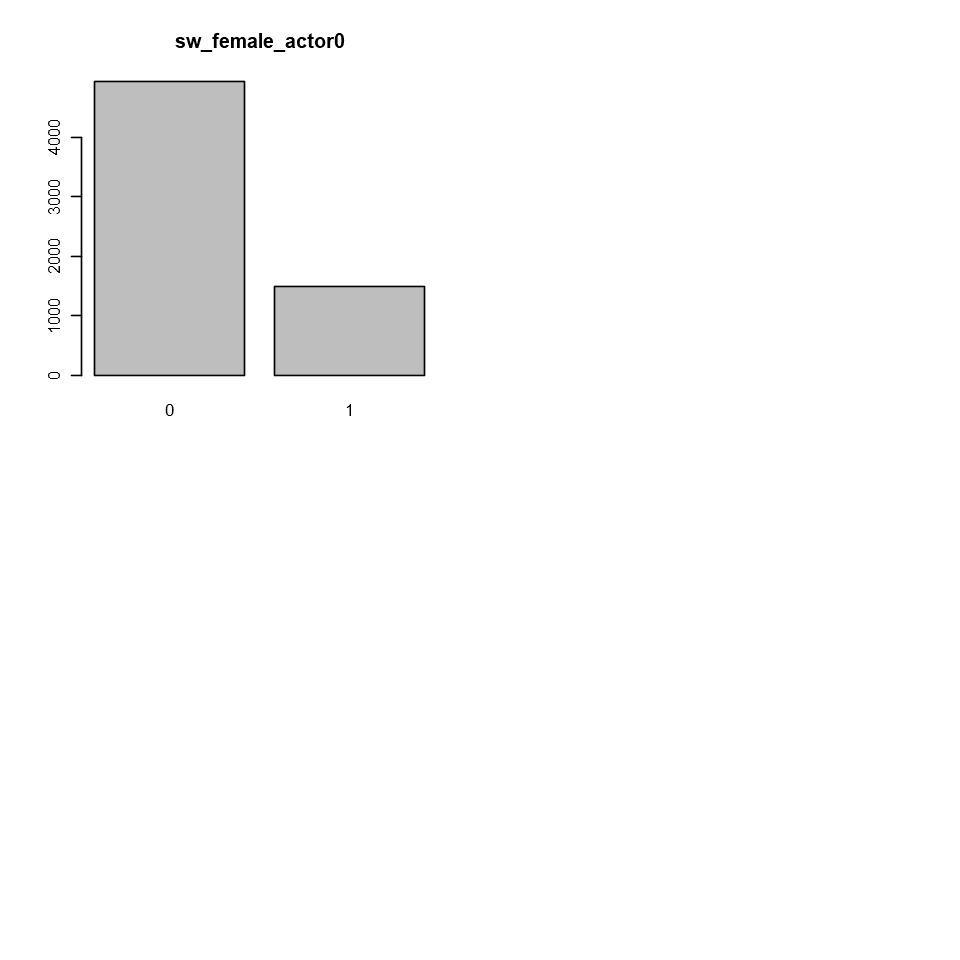

column name: sw_male_actor0


Data.Type: Categorical




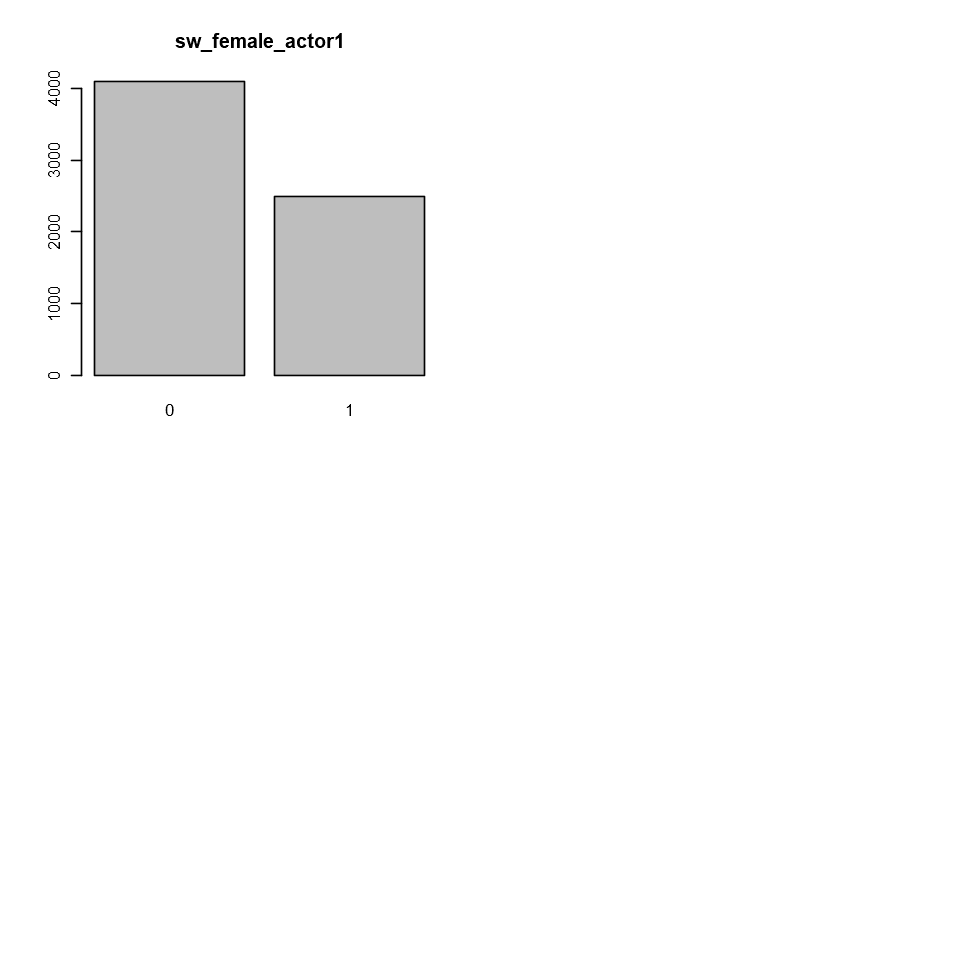

column name: sw_male_actor1


Data.Type: Categorical




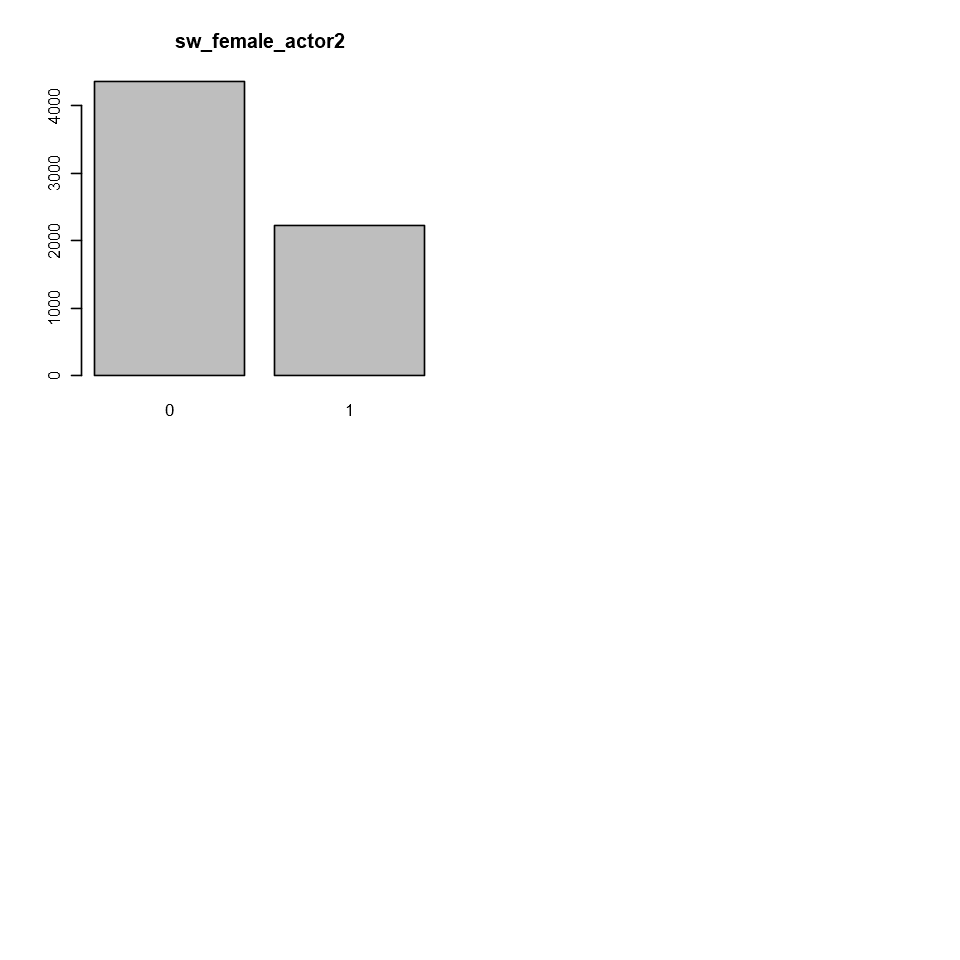

column name: sw_male_actor2


Data.Type: Categorical




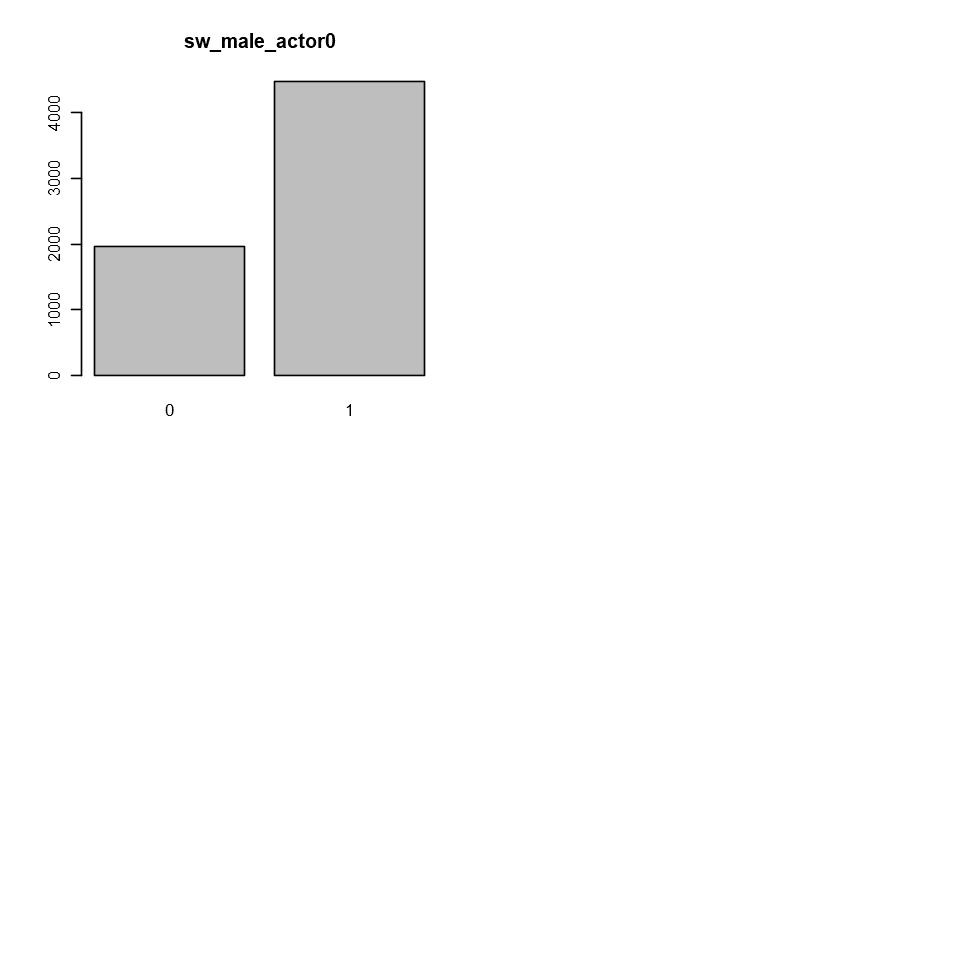

column name: depart_Lighting


Data.Type: Numeric




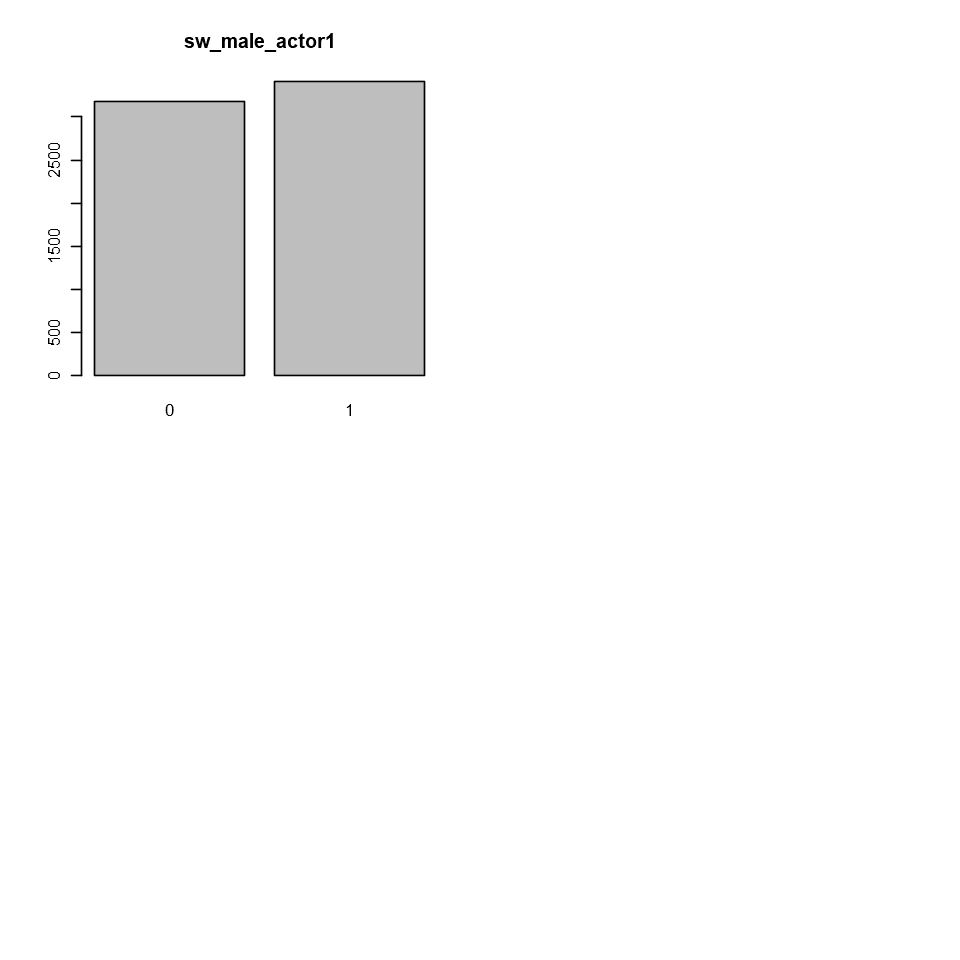

column name: actor2_movies_5y_cnt


Data.Type: Numeric




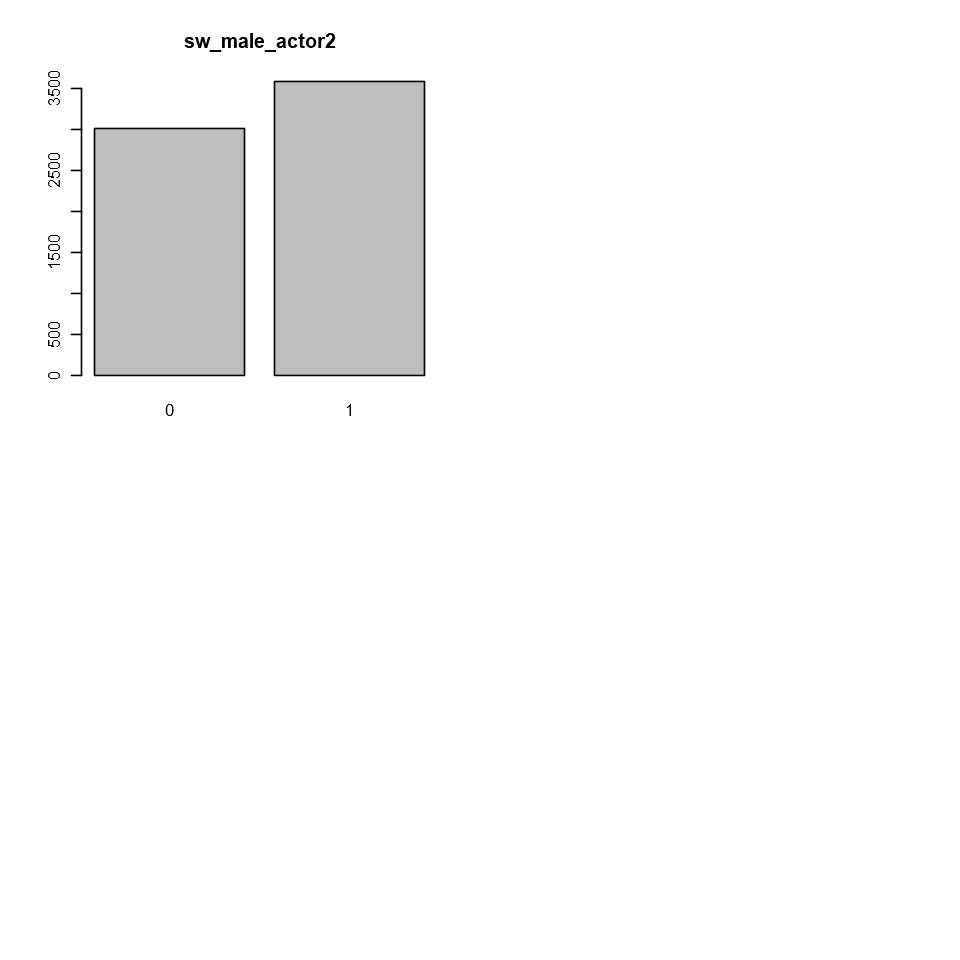

column name: depart_Editing


Data.Type: Numeric




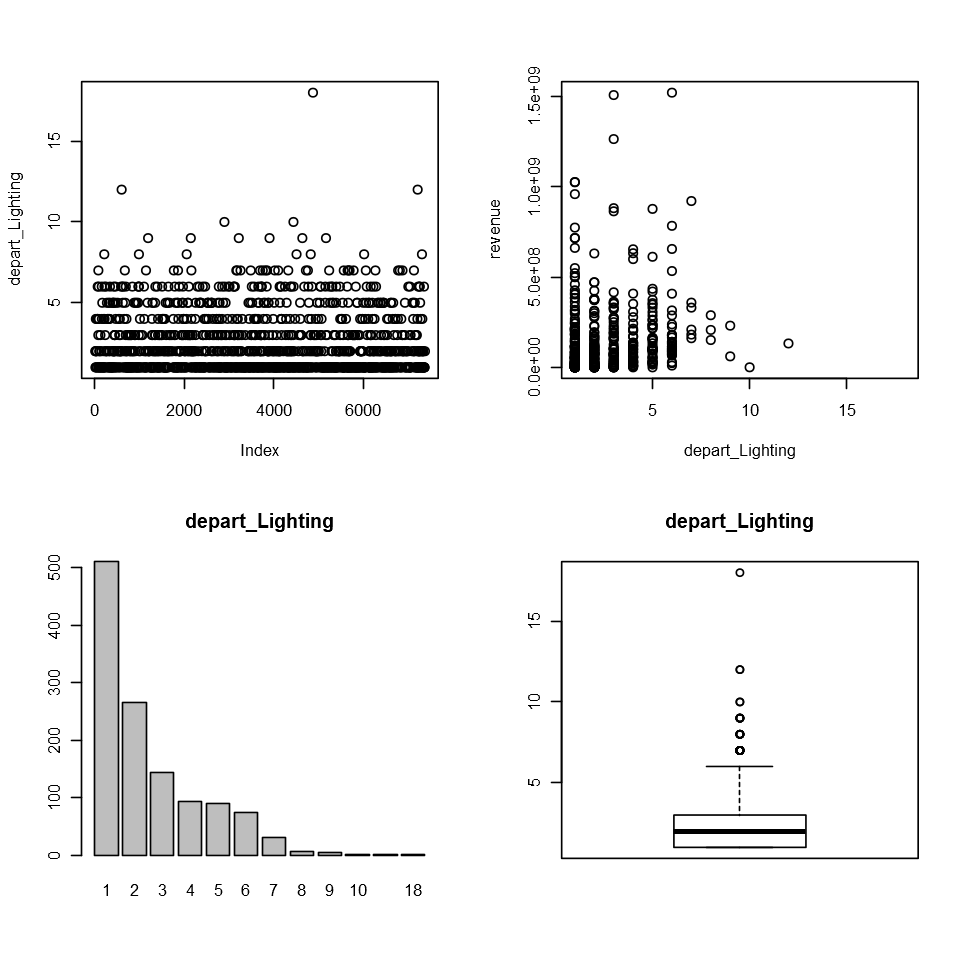

column name: actor0_movies_5y_cnt


Data.Type: Numeric




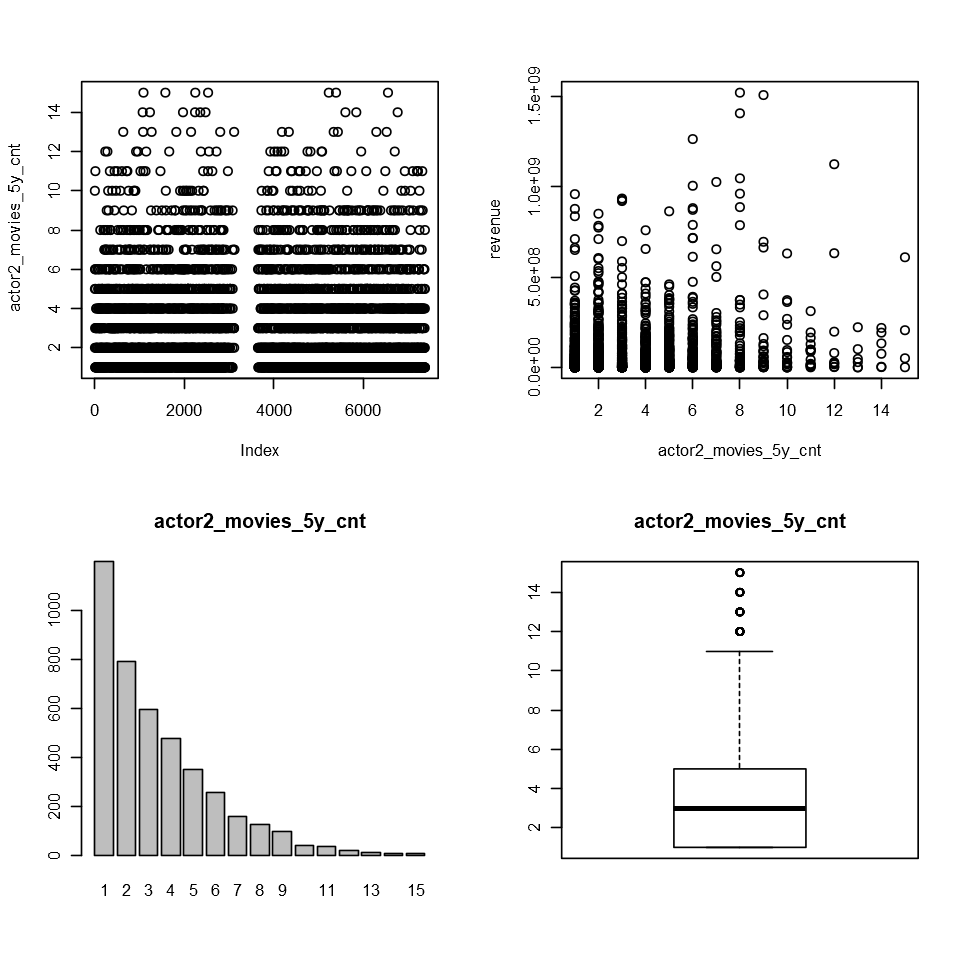

column name: actor1_movies_5y_cnt


Data.Type: Numeric




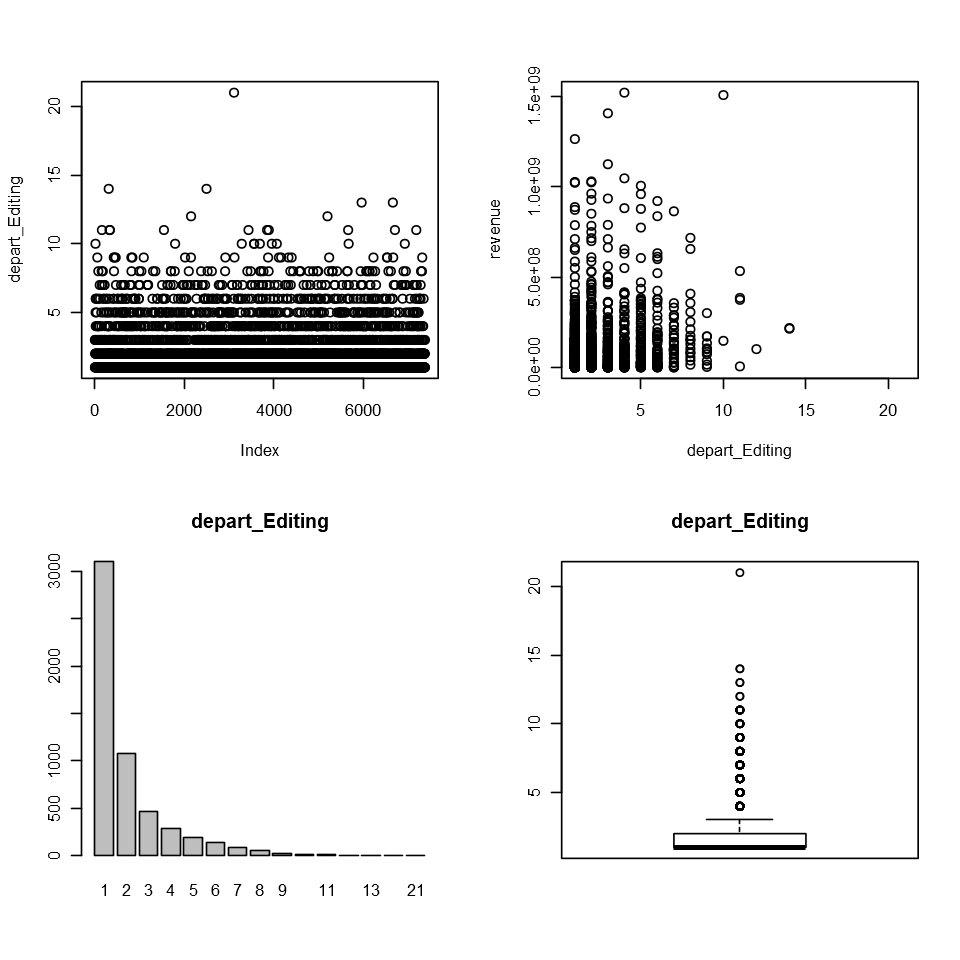

column name: genre_adventure


Data.Type: Categorical




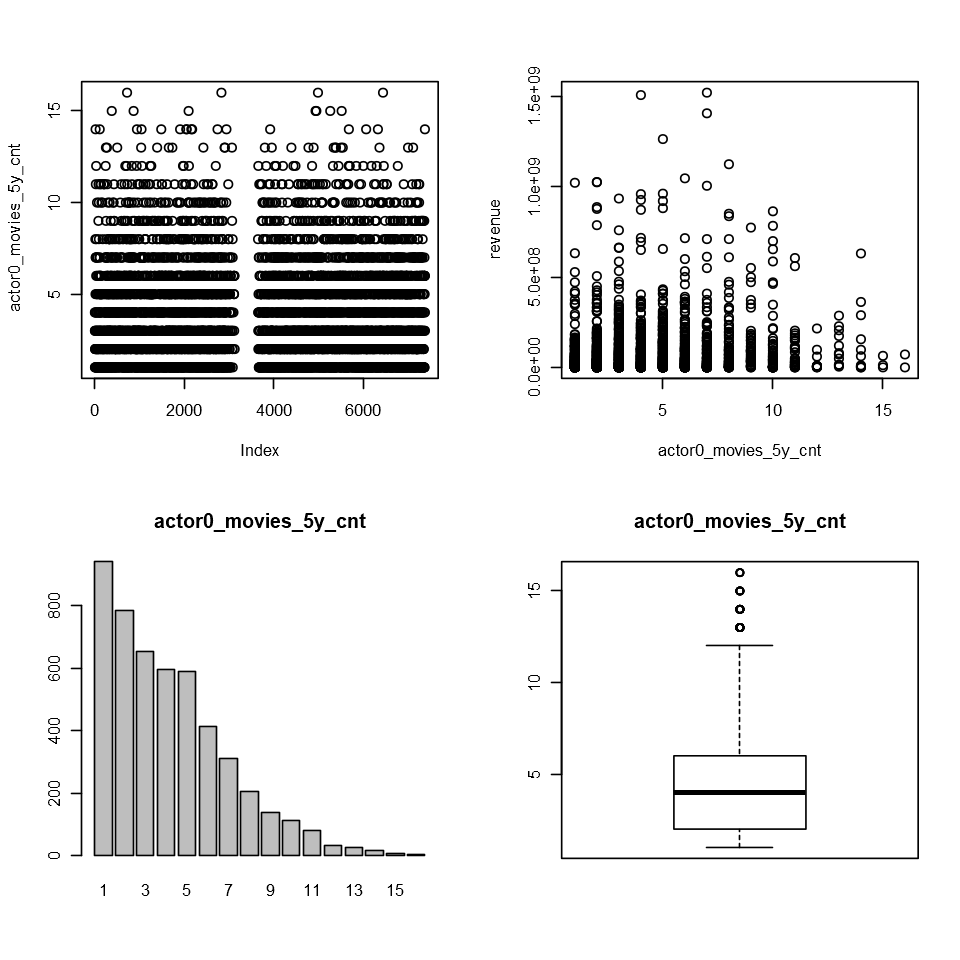

column name: genre_fantasy


Data.Type: Categorical




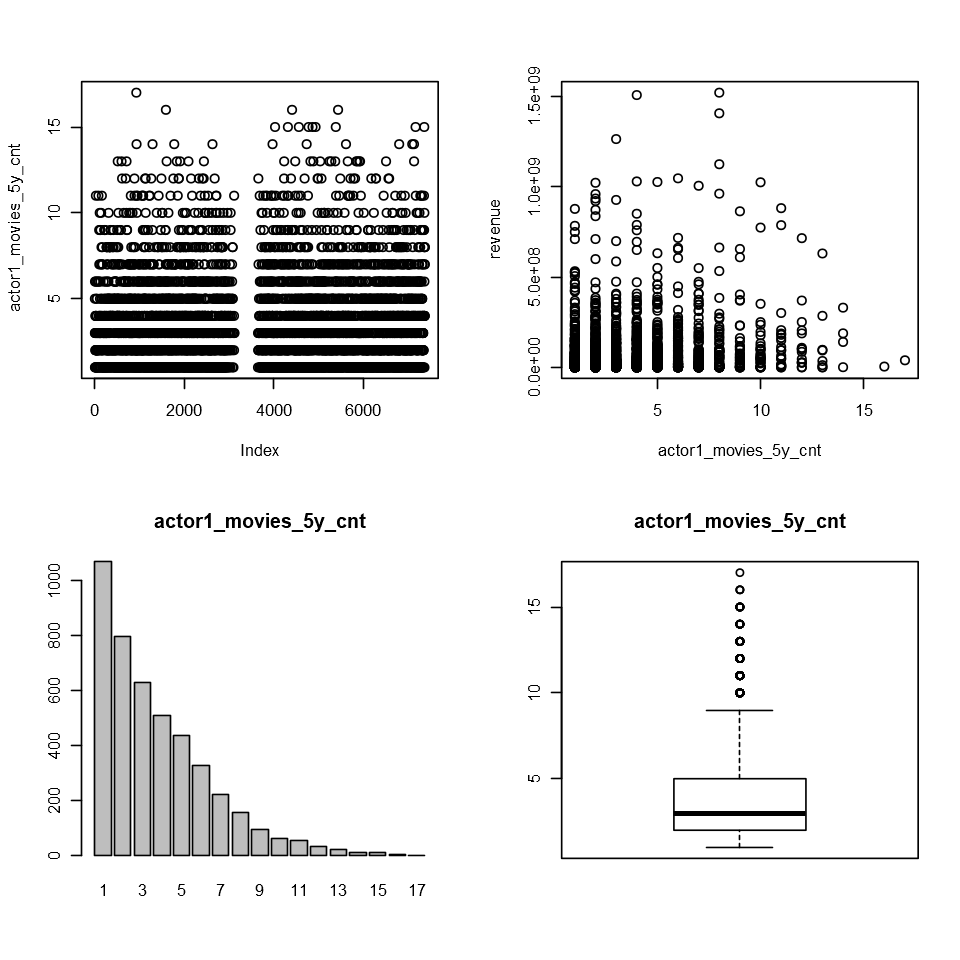

column name: genre_animation


Data.Type: Categorical




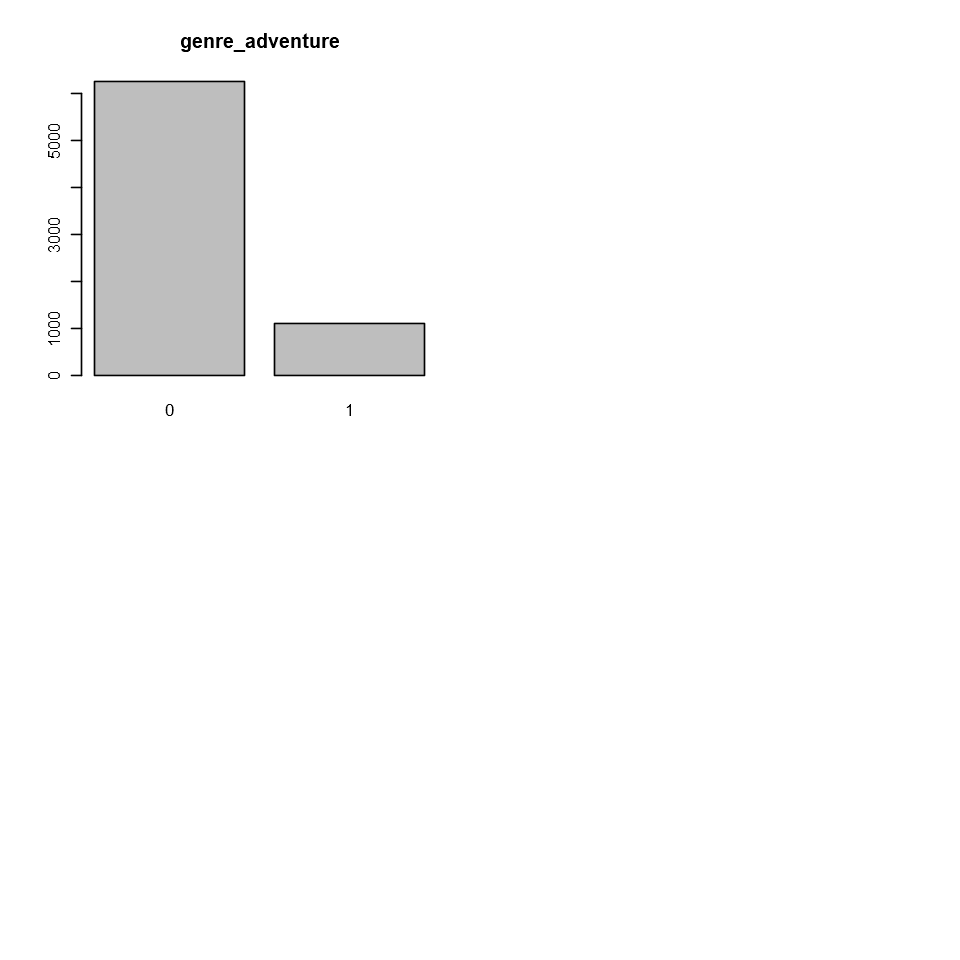

column name: genre_drama


Data.Type: Categorical




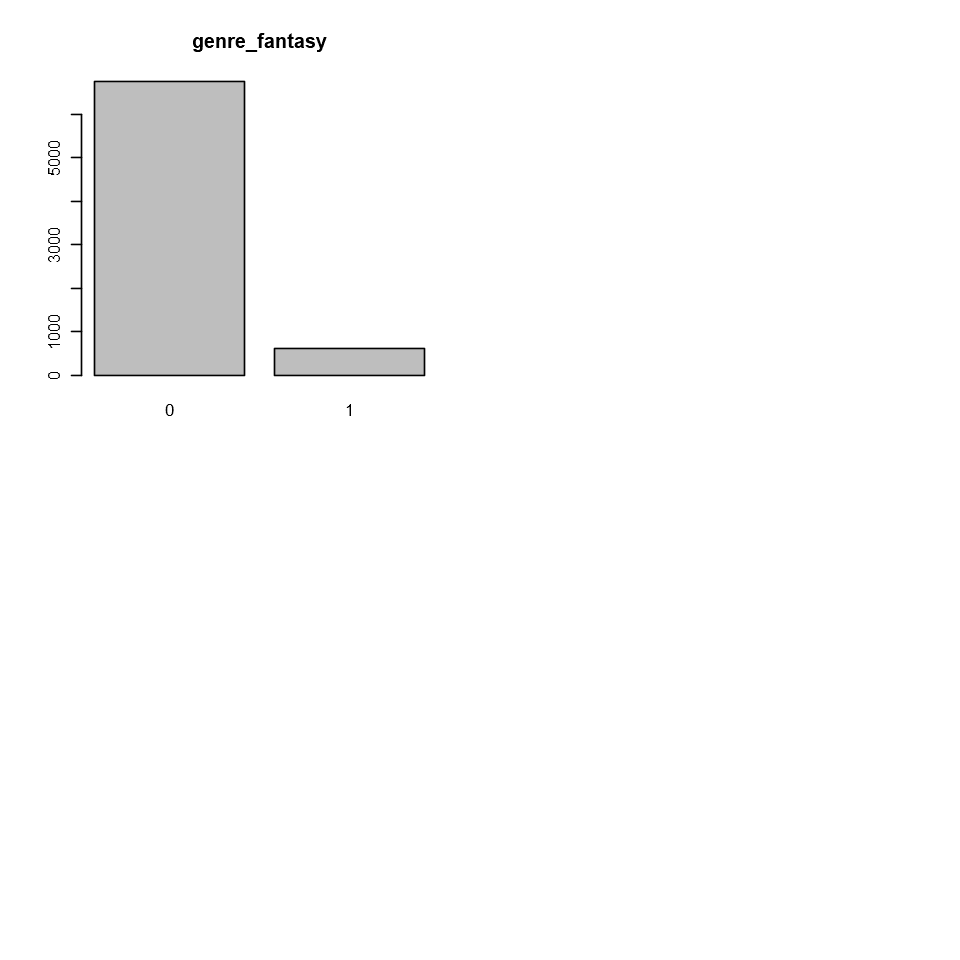

column name: genre_horror


Data.Type: Categorical




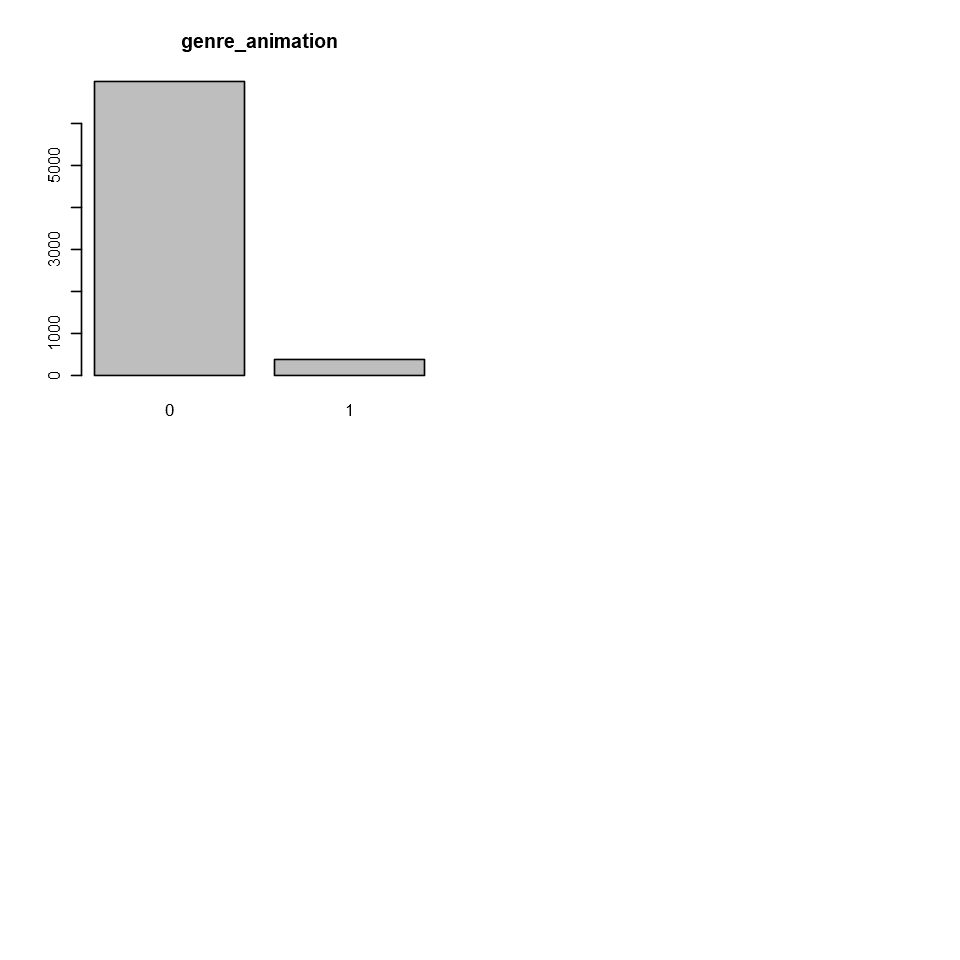

column name: genre_action


Data.Type: Categorical




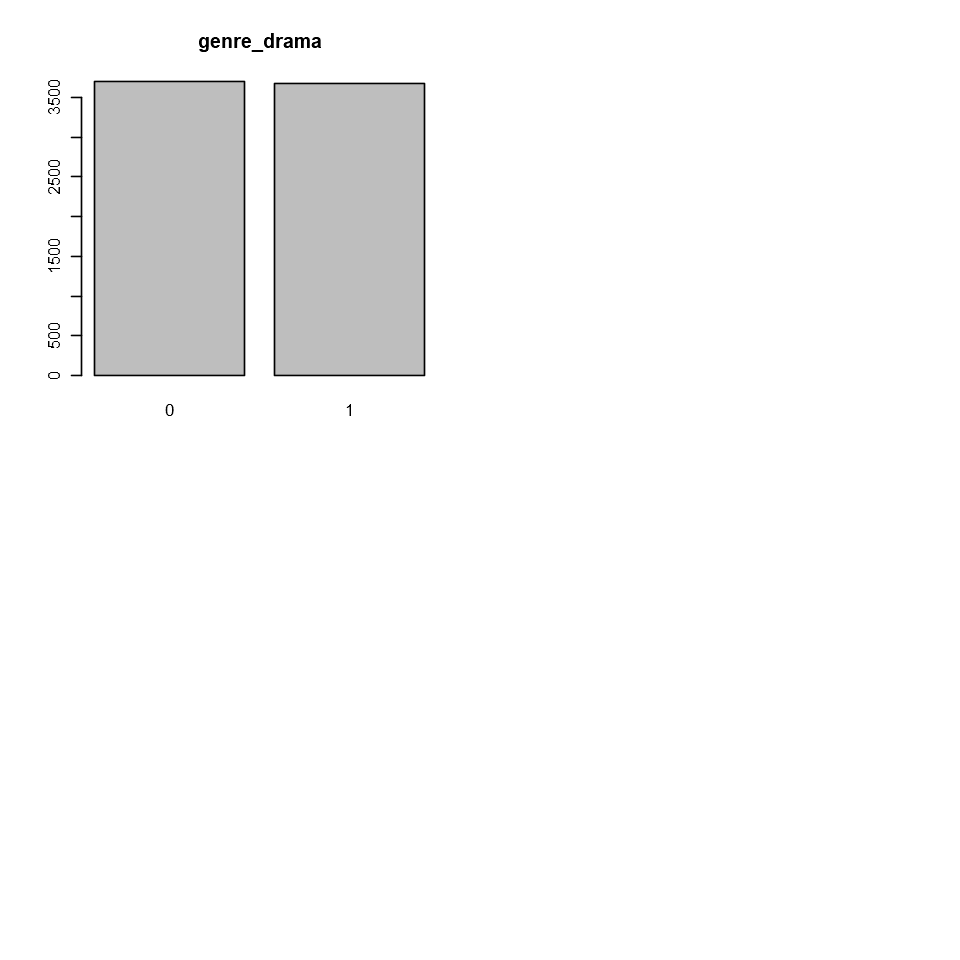

column name: genre_comedy


Data.Type: Categorical




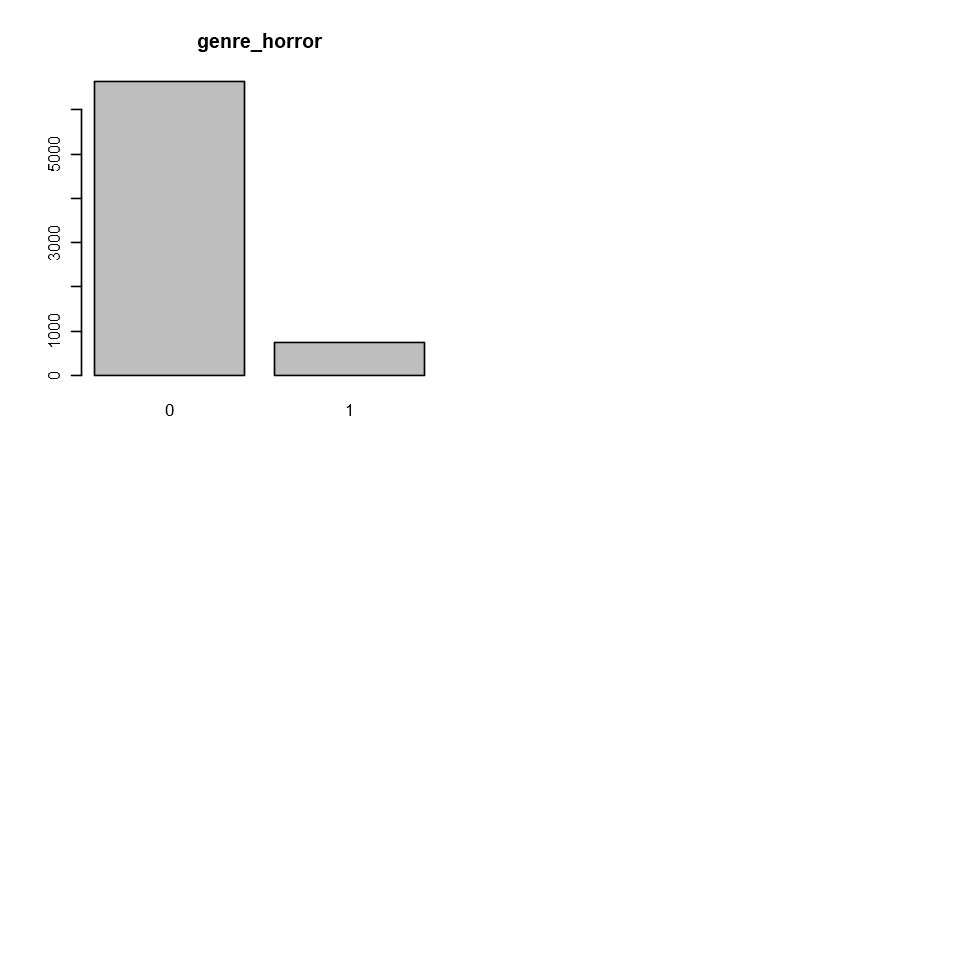

column name: genre_history


Data.Type: Categorical




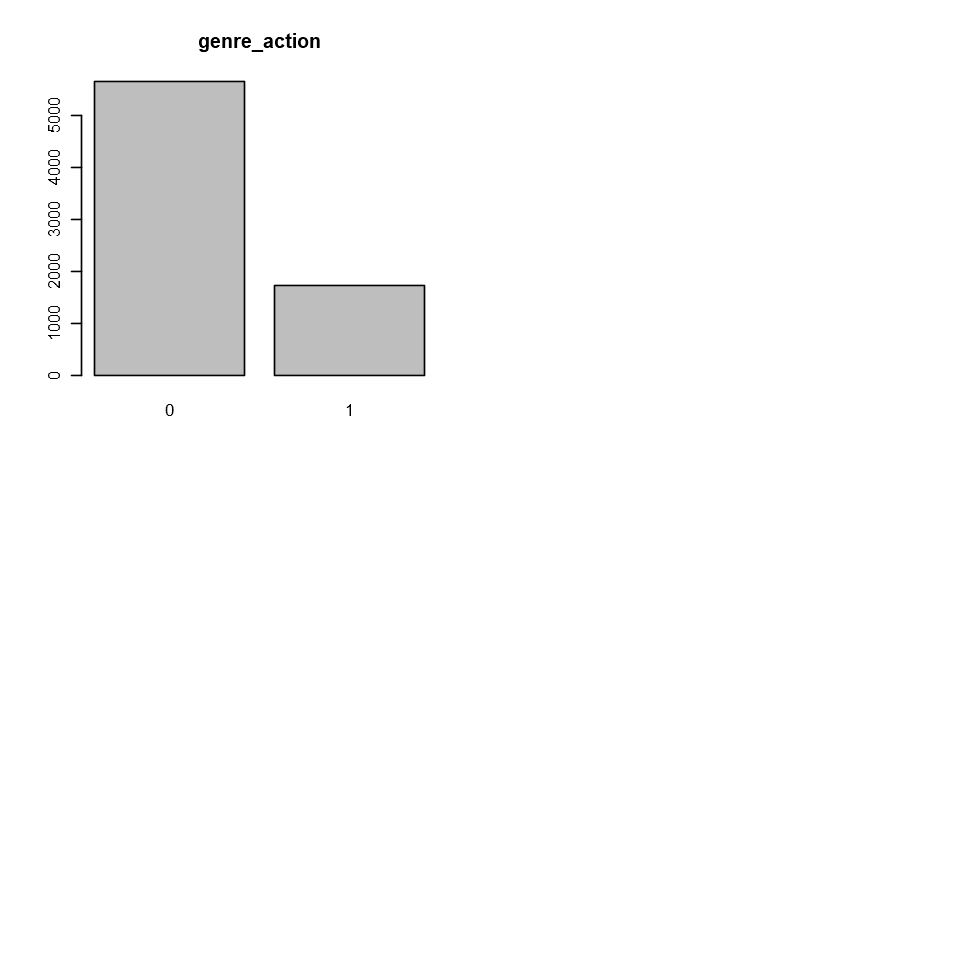

column name: genre_western


Data.Type: Categorical




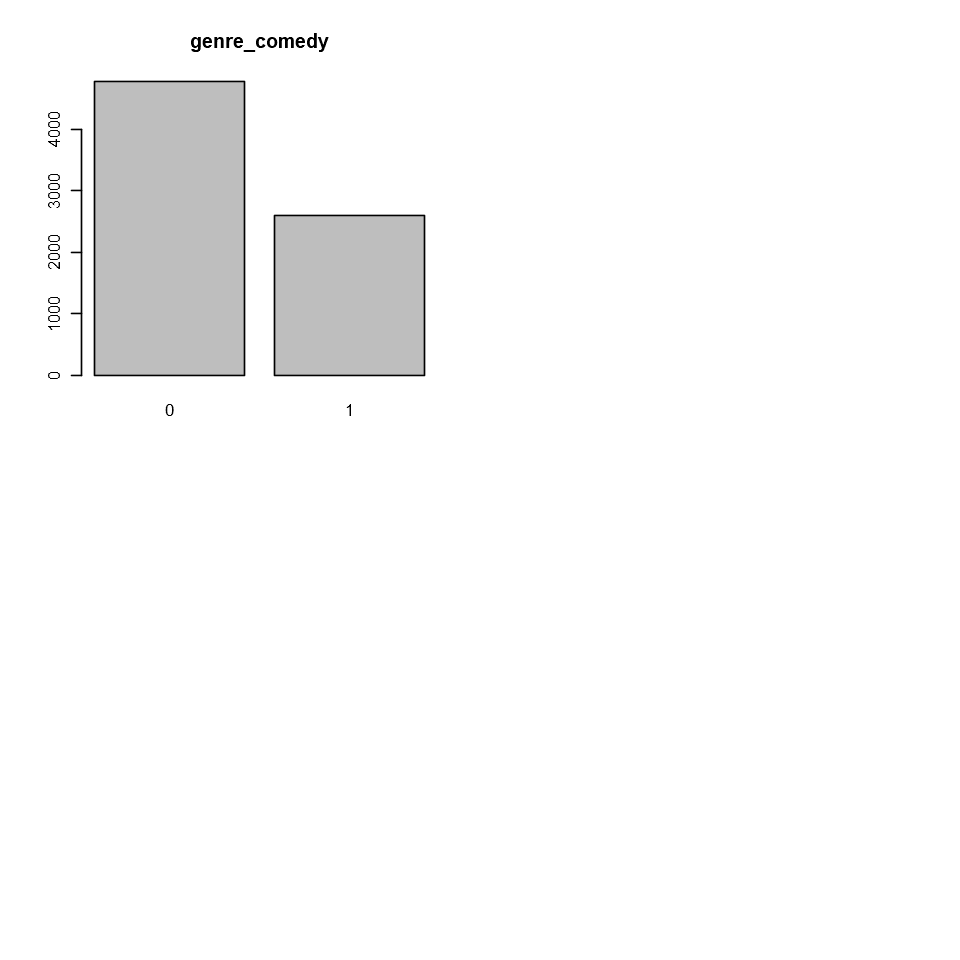

column name: genre_thriller


Data.Type: Categorical




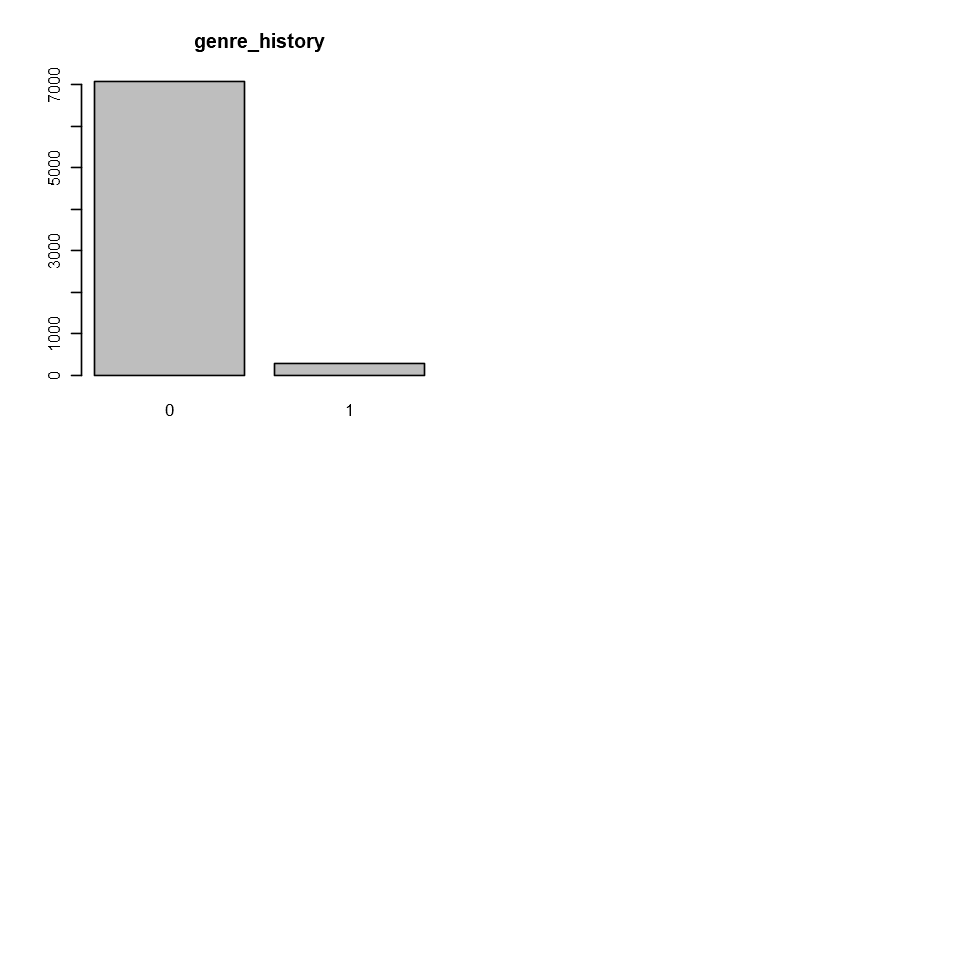

column name: genre_crime


Data.Type: Categorical




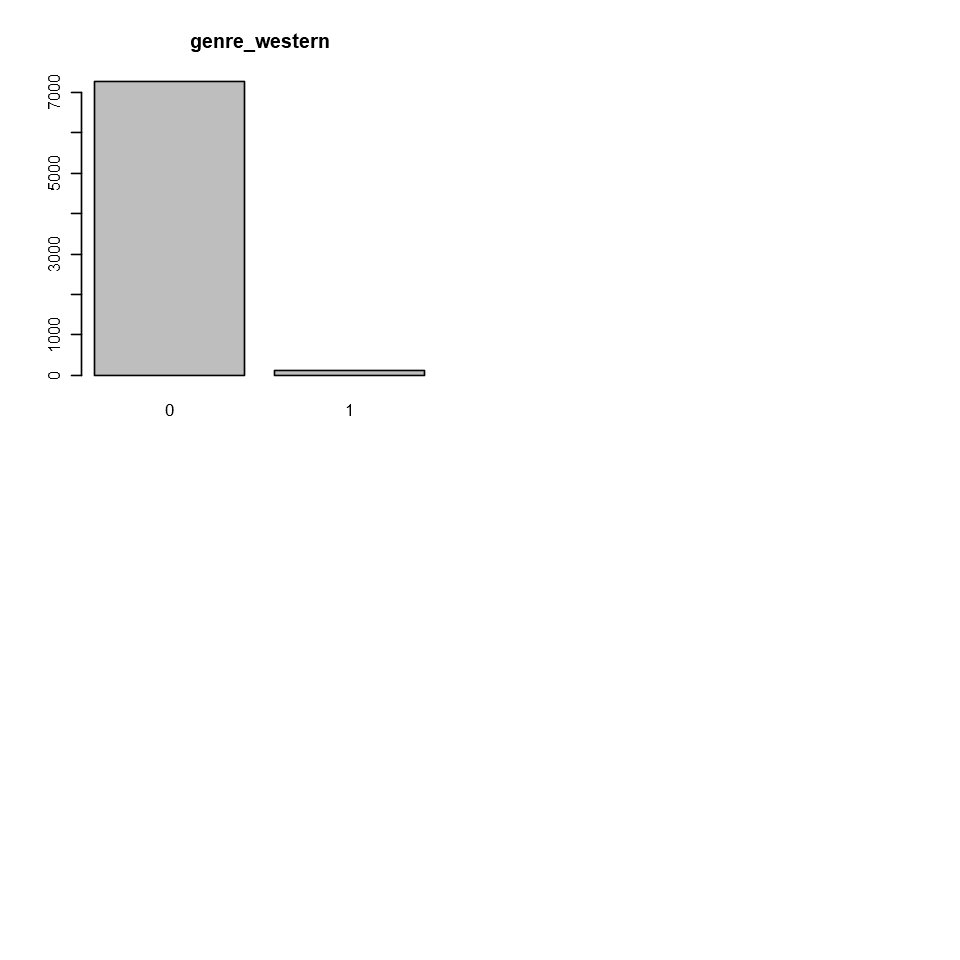

column name: genre_documentary


Data.Type: Categorical




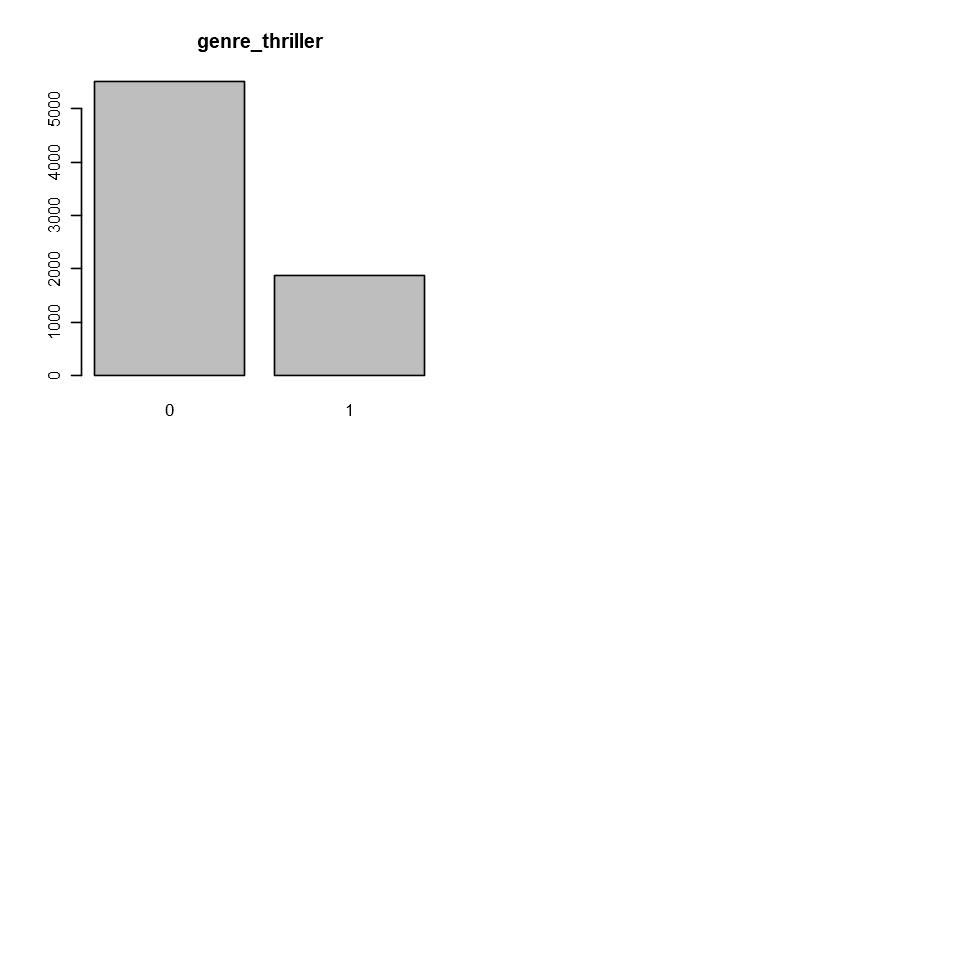

column name: genre_science_fiction


Data.Type: Categorical




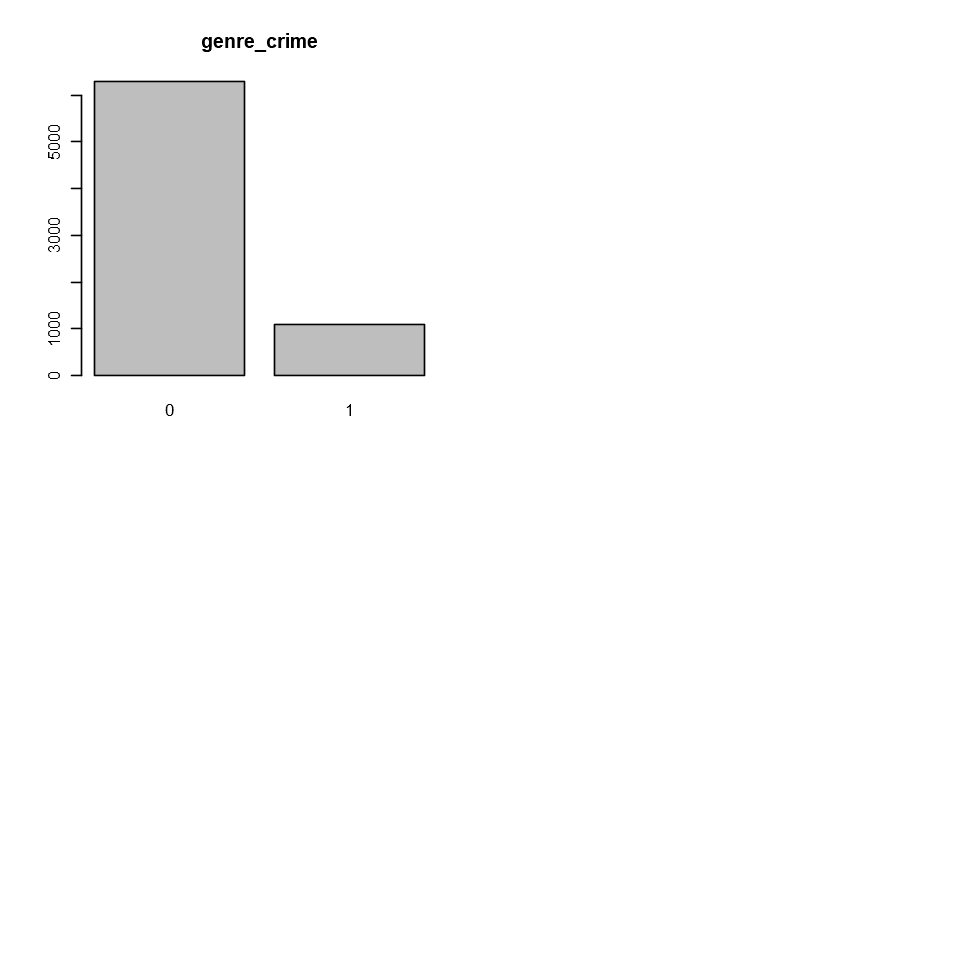

column name: genre_mystery


Data.Type: Categorical




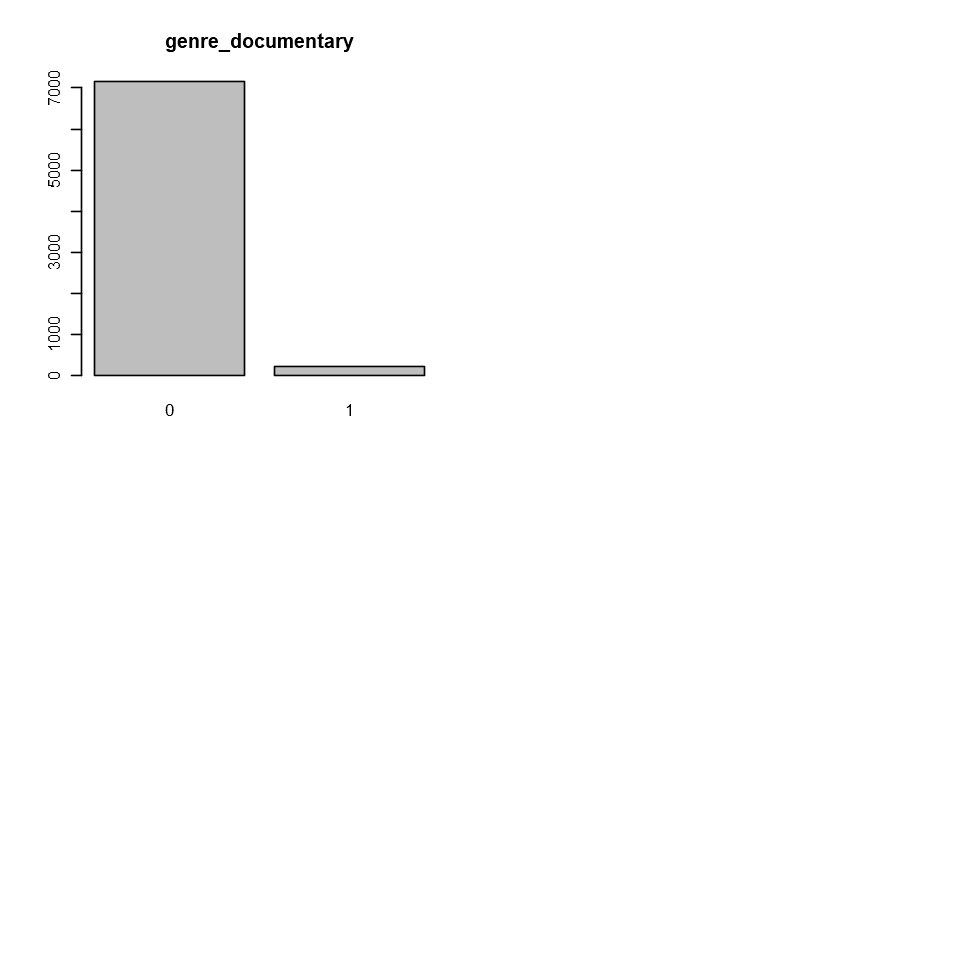

column name: genre_music


Data.Type: Categorical




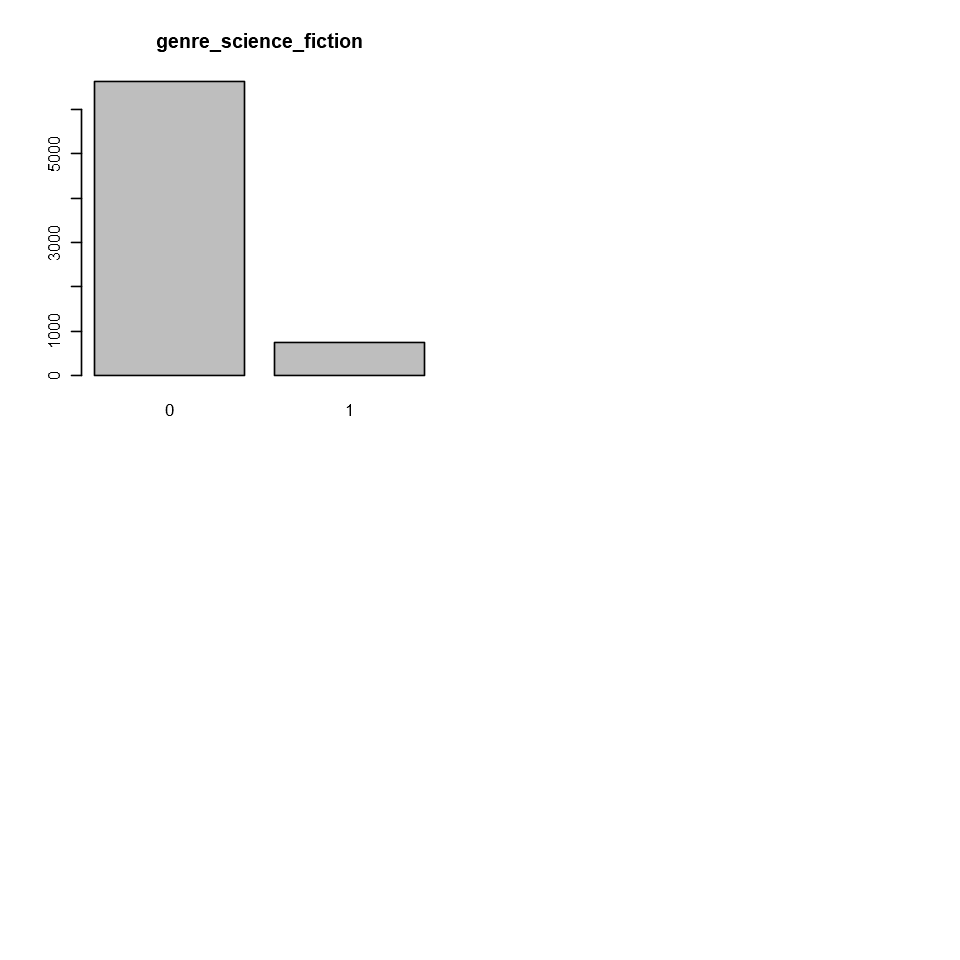

column name: genre_romance


Data.Type: Categorical




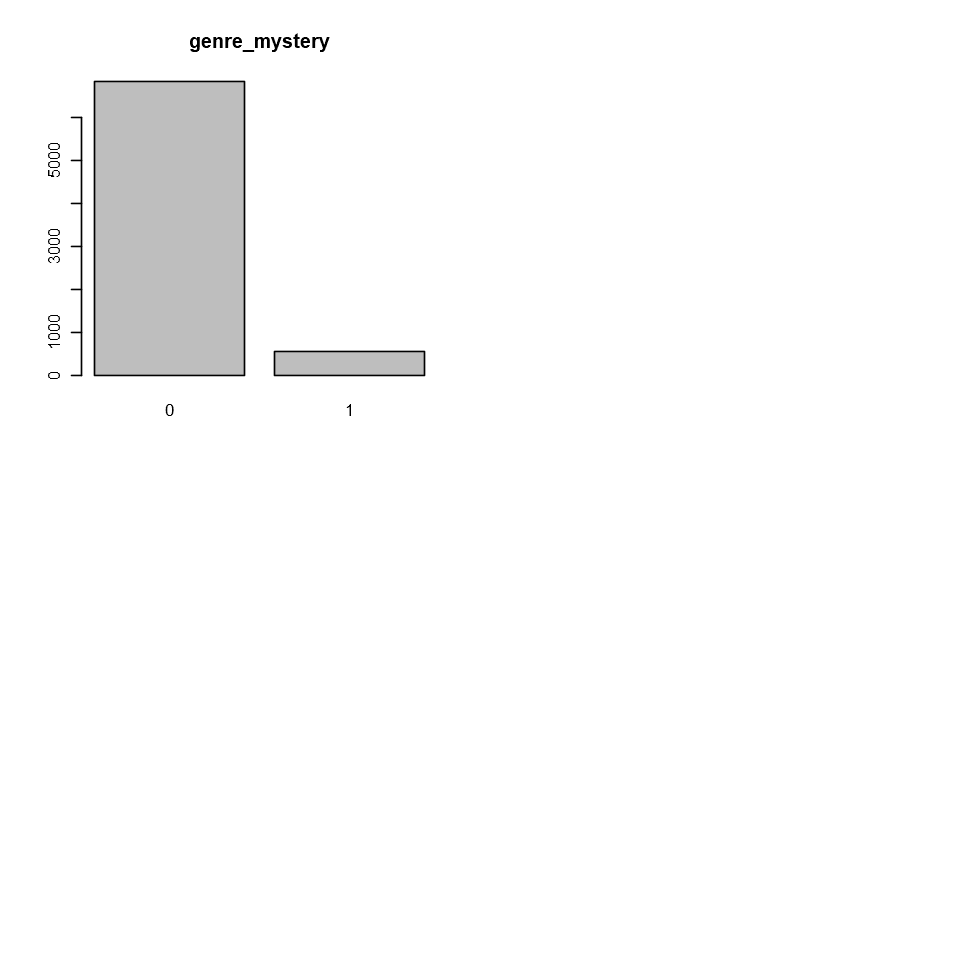

column name: genre_family


Data.Type: Categorical




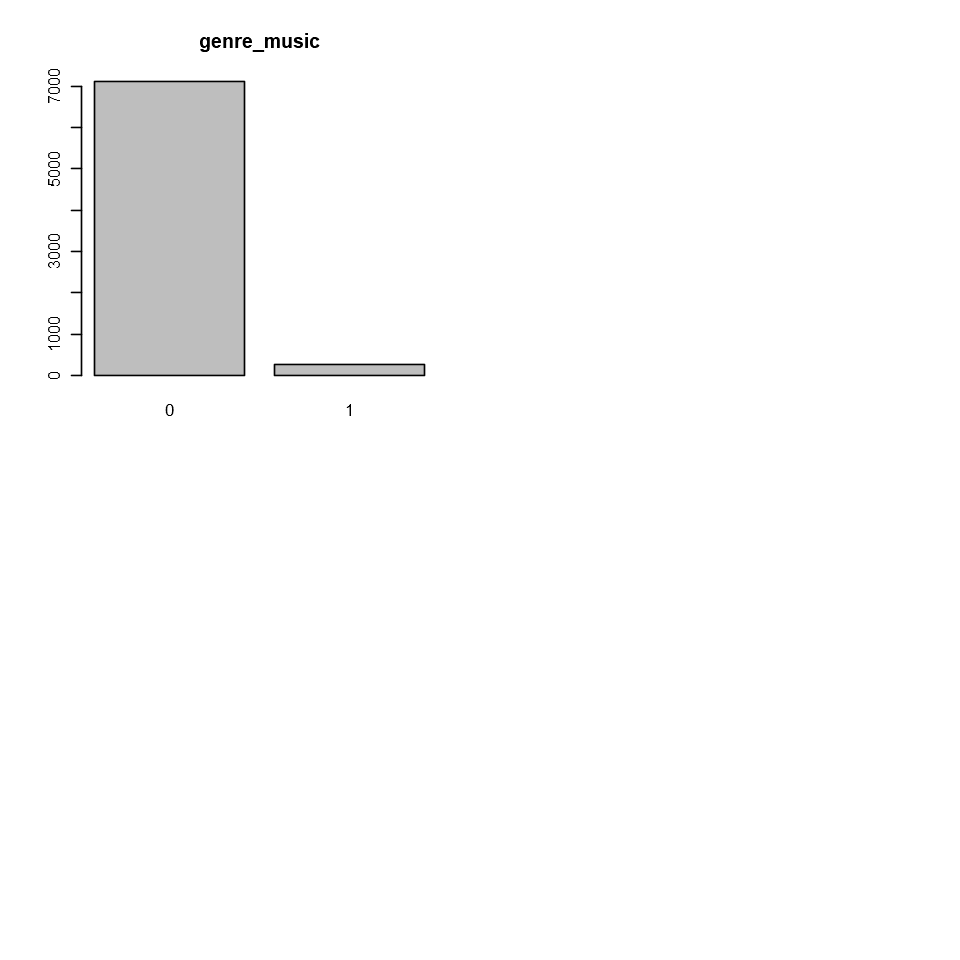

column name: genre_war


Data.Type: Categorical




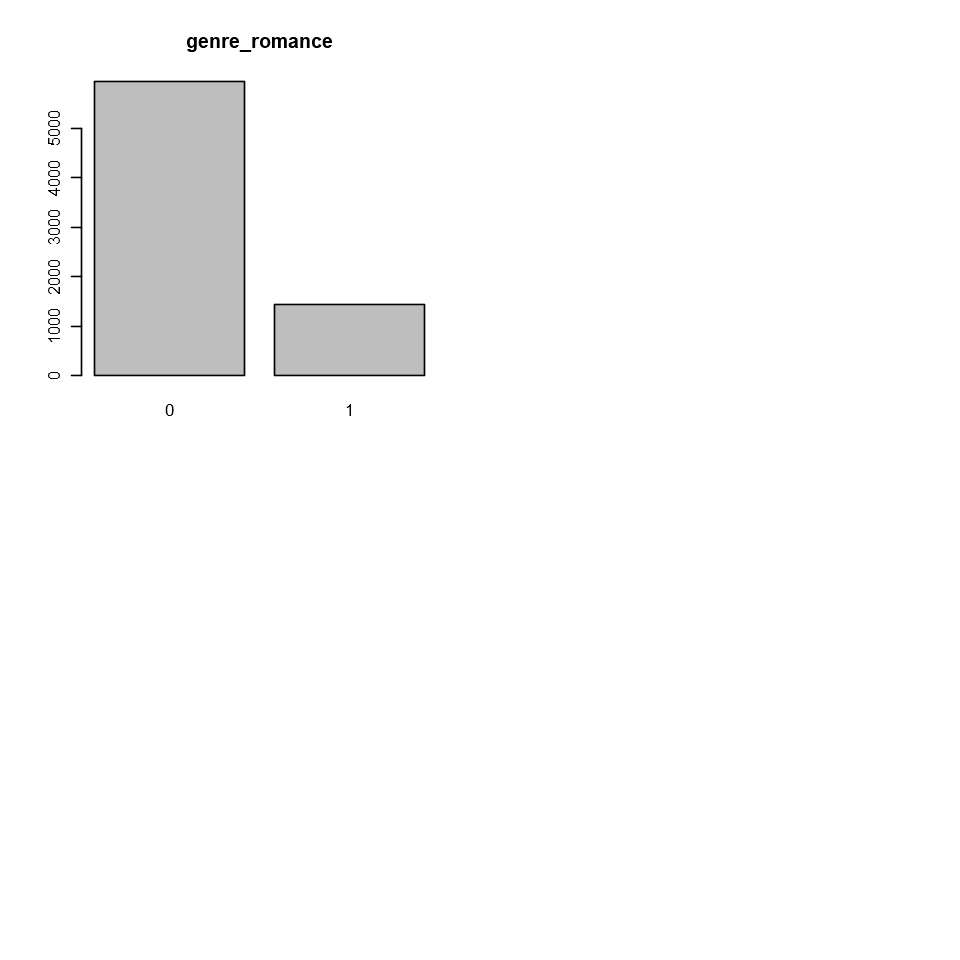

column name: genre_foreign


Data.Type: Categorical




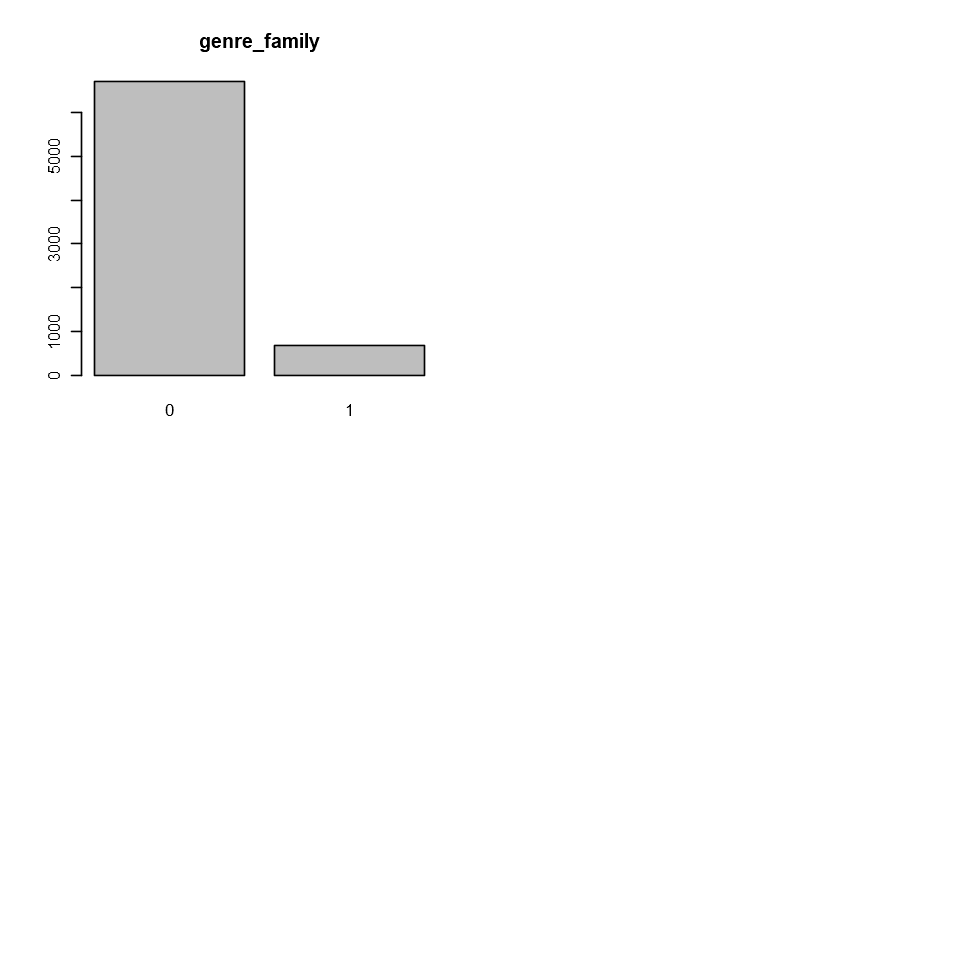

column name: depart_Writing


Data.Type: Numeric




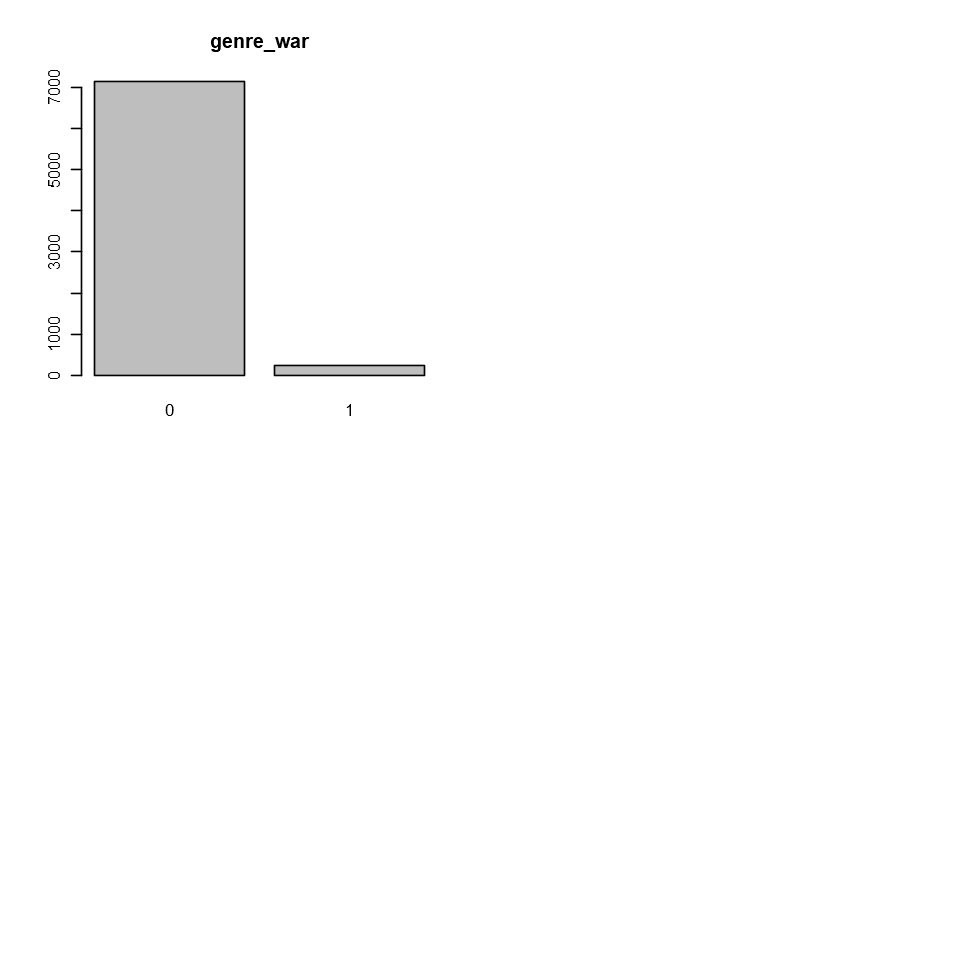

column name: depart_Camera


Data.Type: Numeric




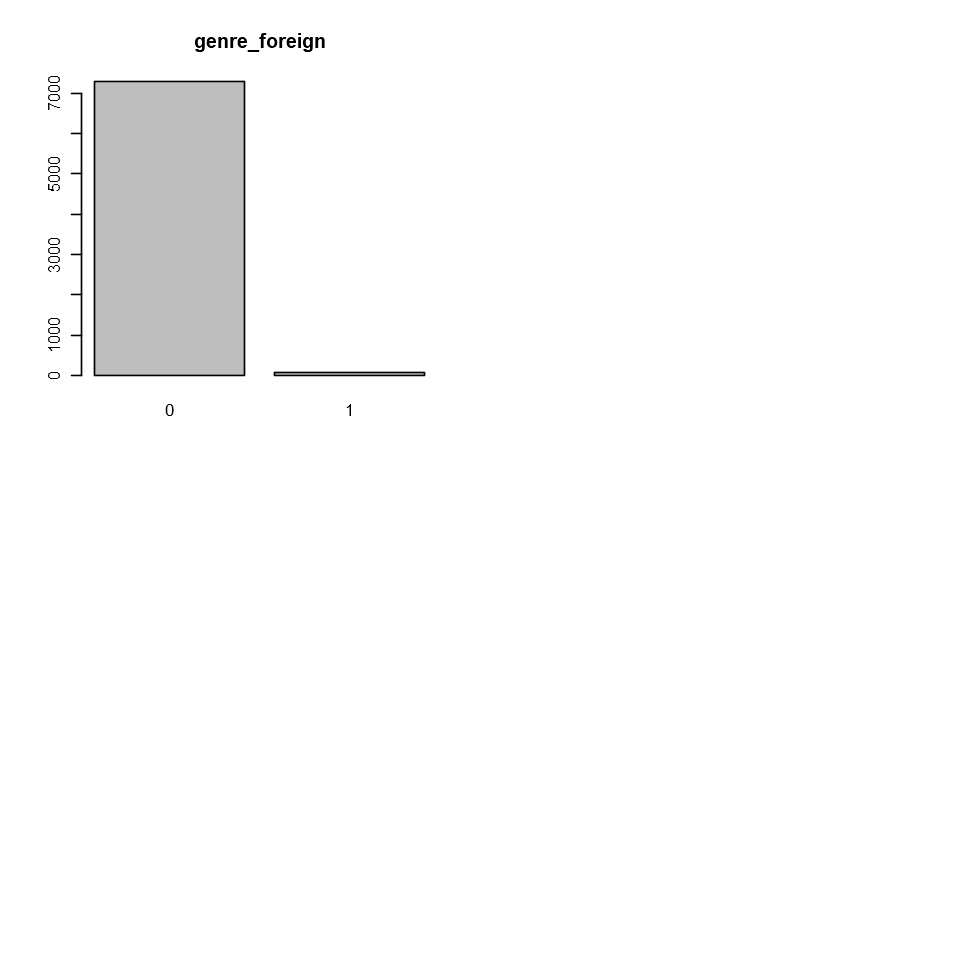

column name: depart_Directing


Data.Type: Numeric




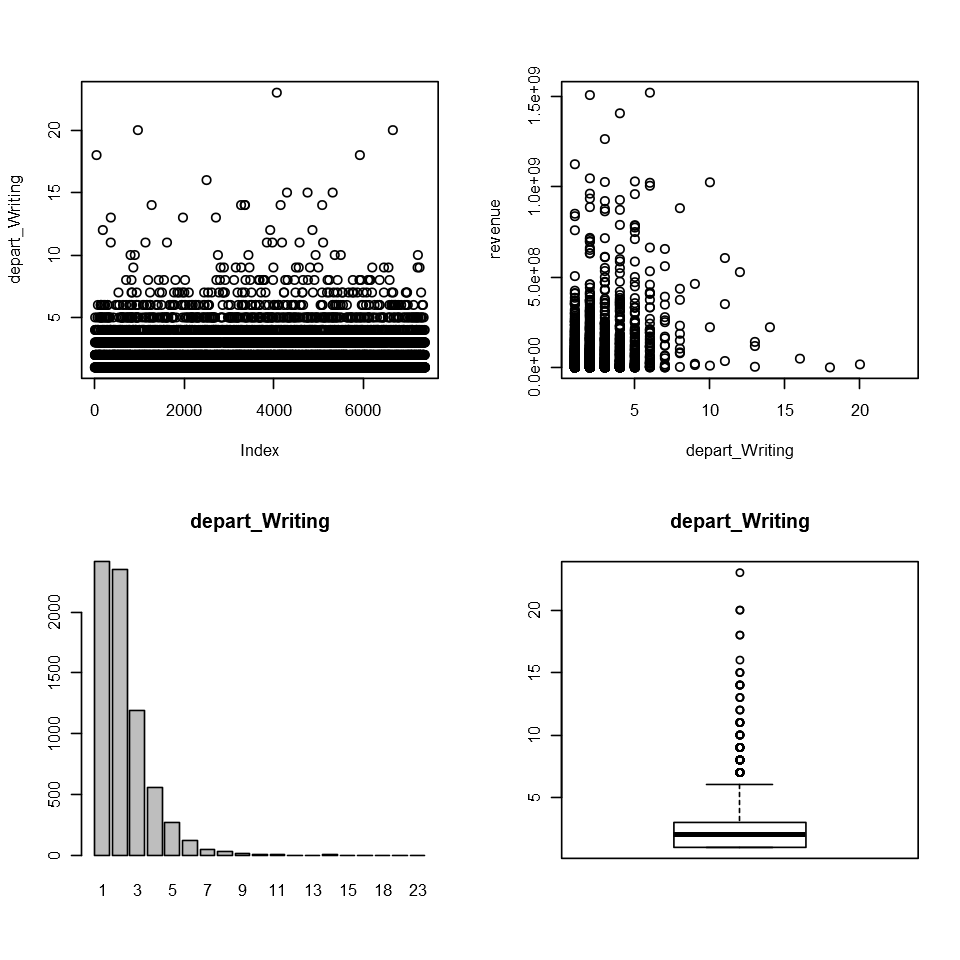

column name: producers_cnt


Data.Type: Numeric




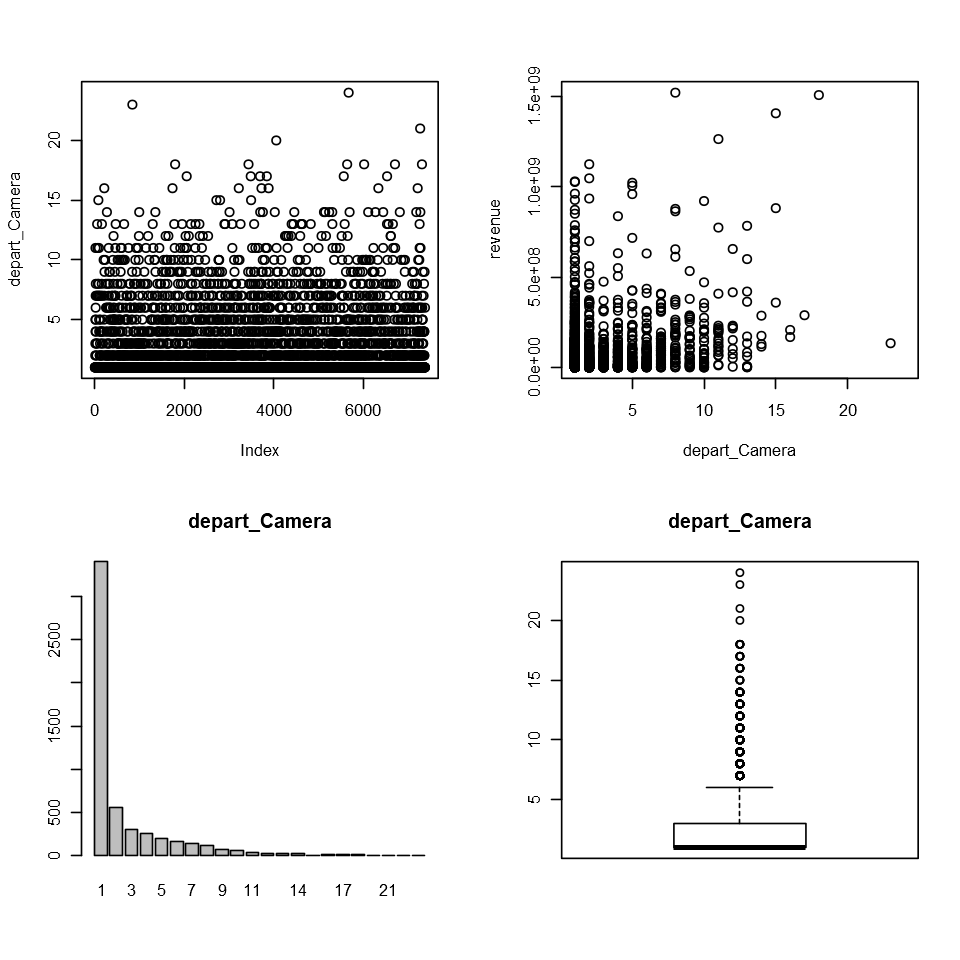

column name: depart_Custom_Mkup


Data.Type: Numeric




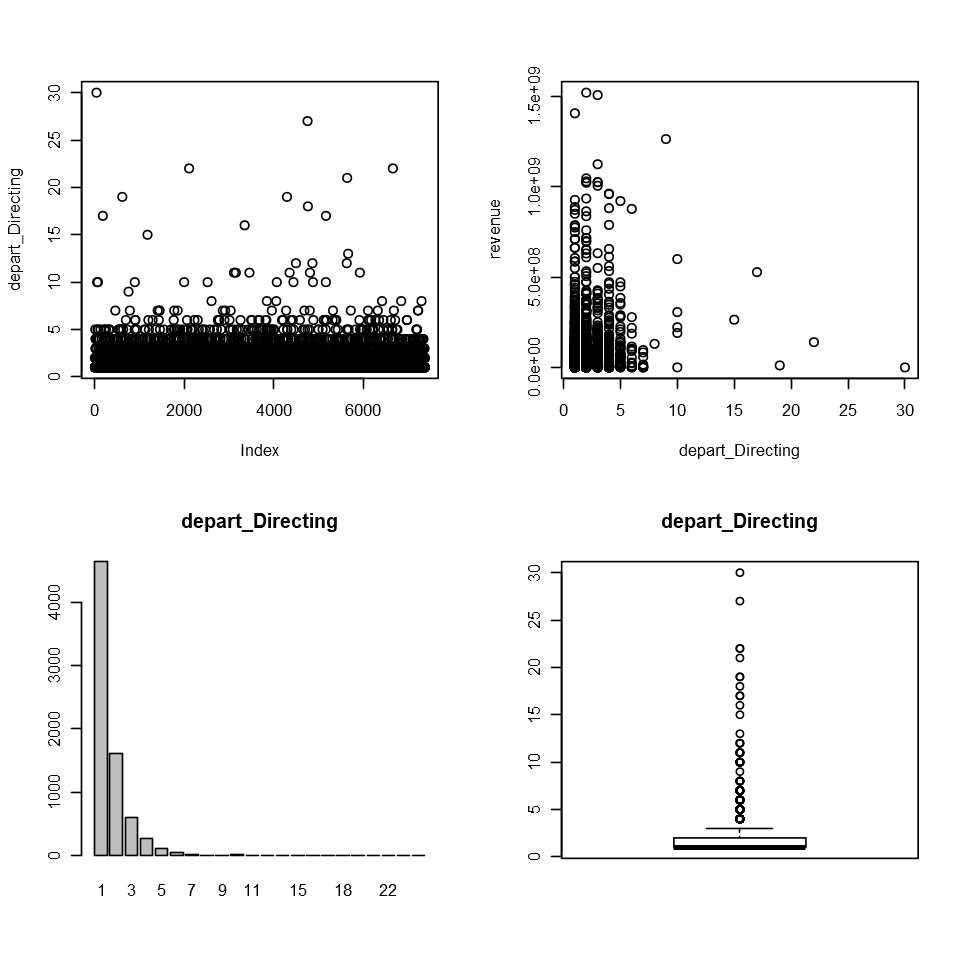

column name: director_movies_cnt


Data.Type: Numeric




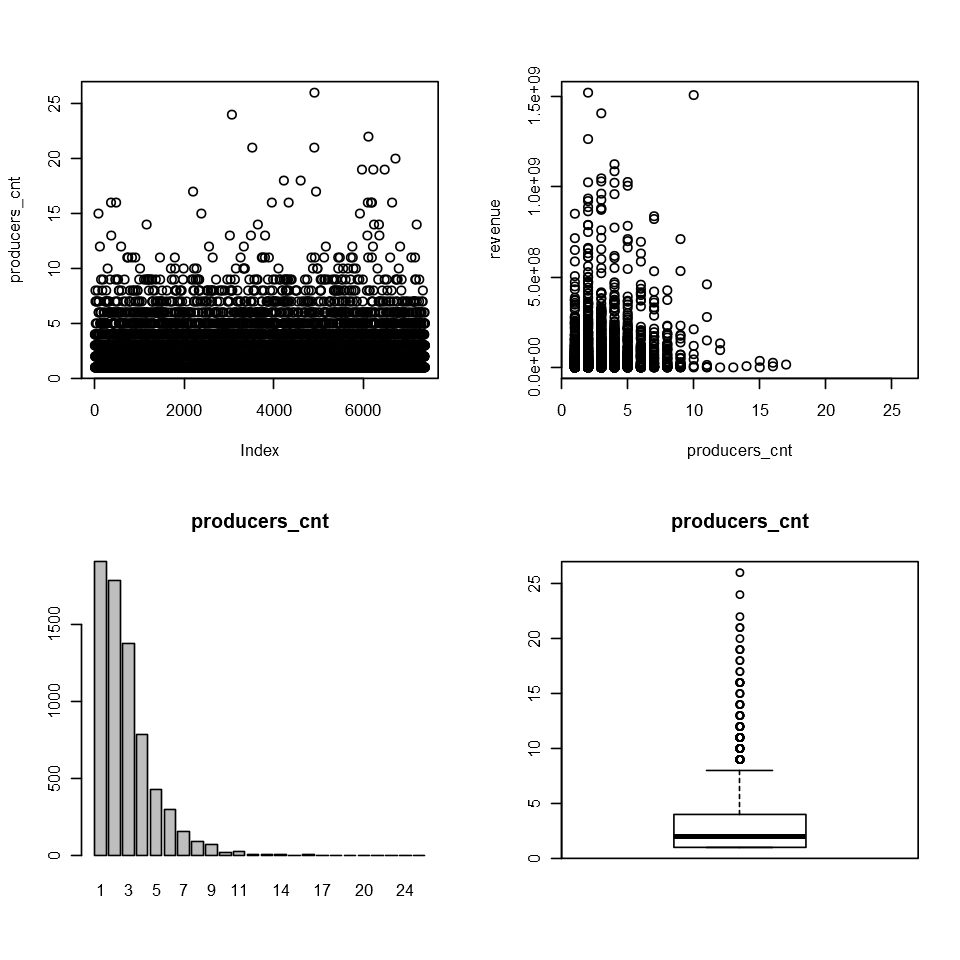

column name: depart_Art


Data.Type: Numeric




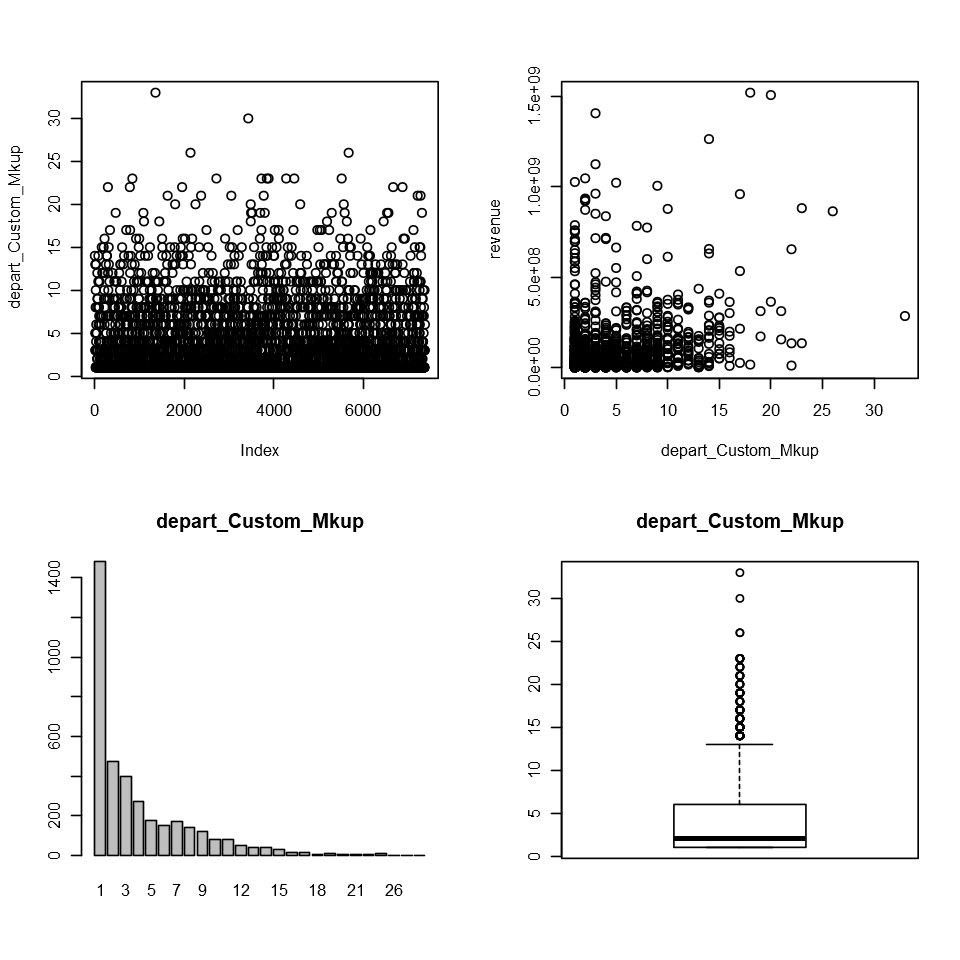

column name: depart_Sound


Data.Type: Numeric




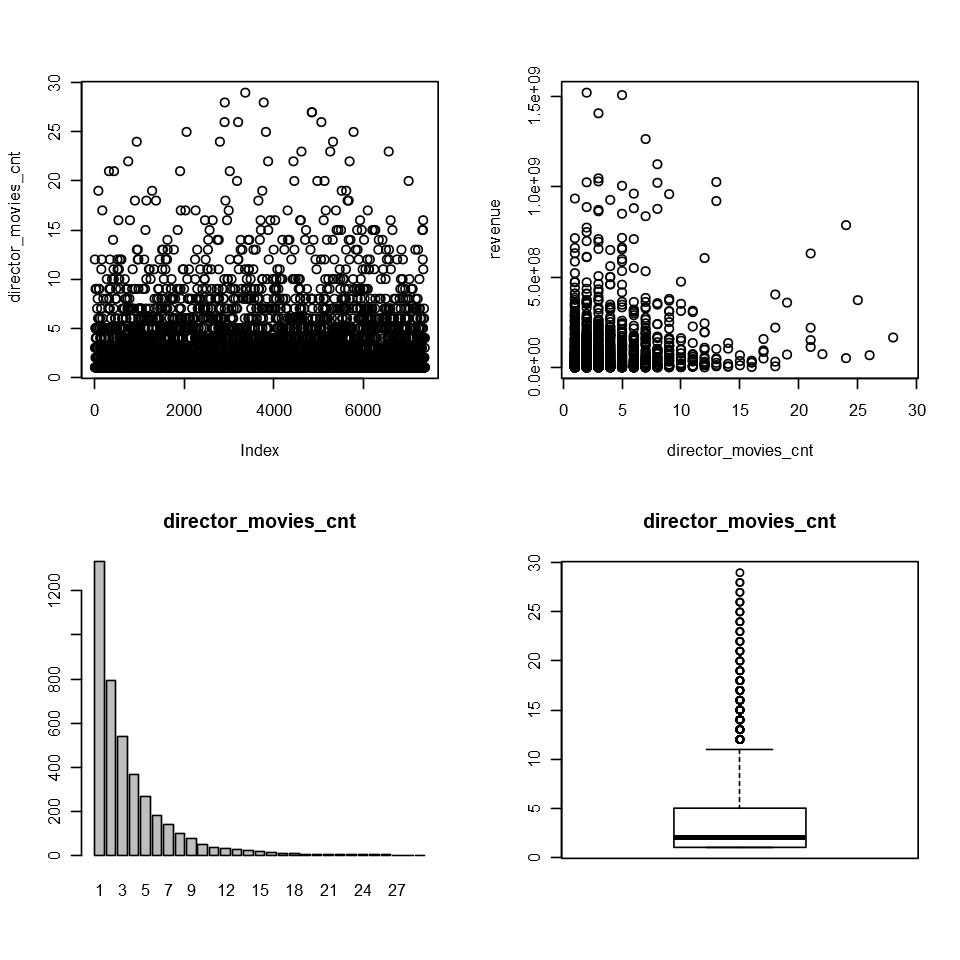

column name: depart_Production


Data.Type: Numeric




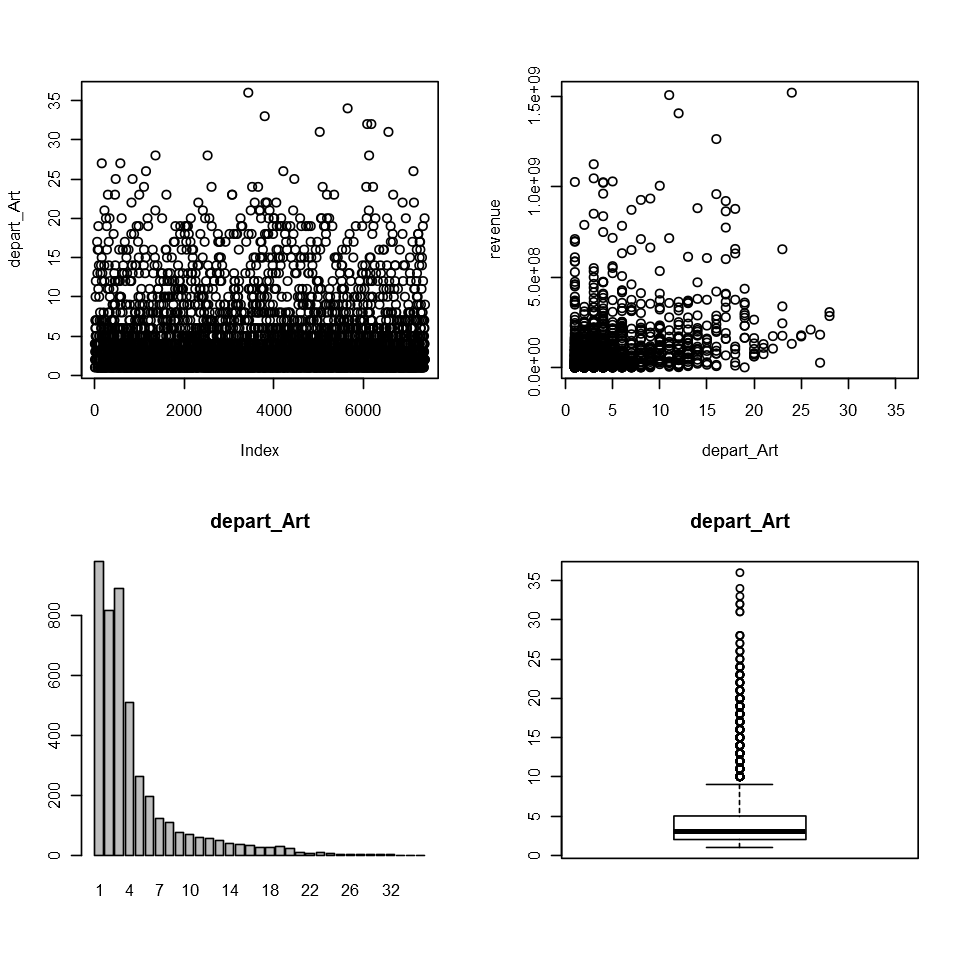

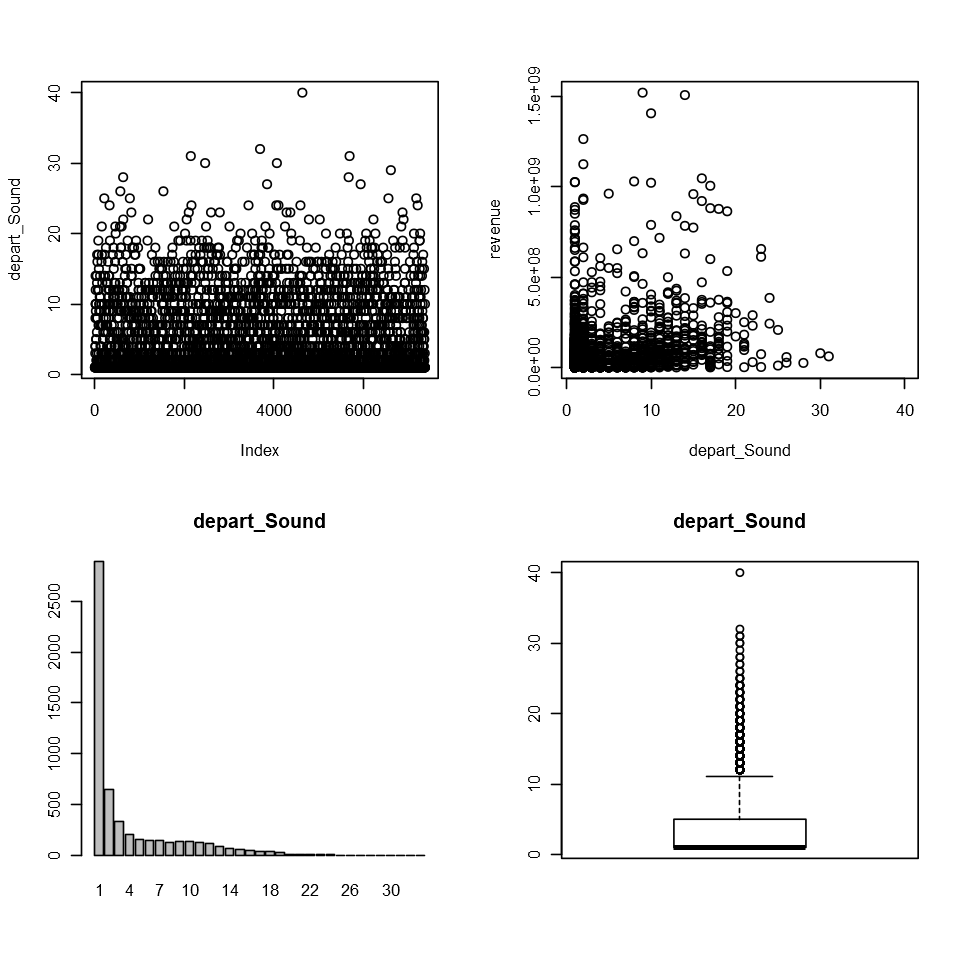

column name: depart_Visual_Effects


Data.Type: Numeric




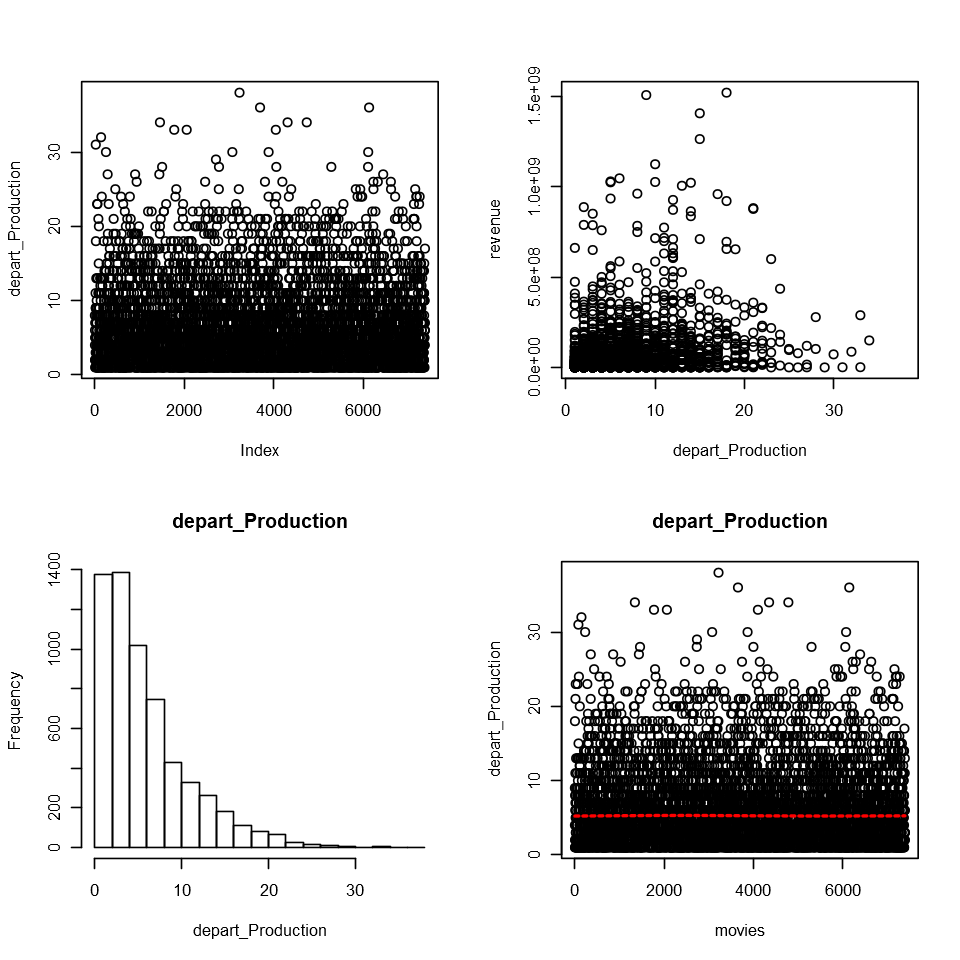

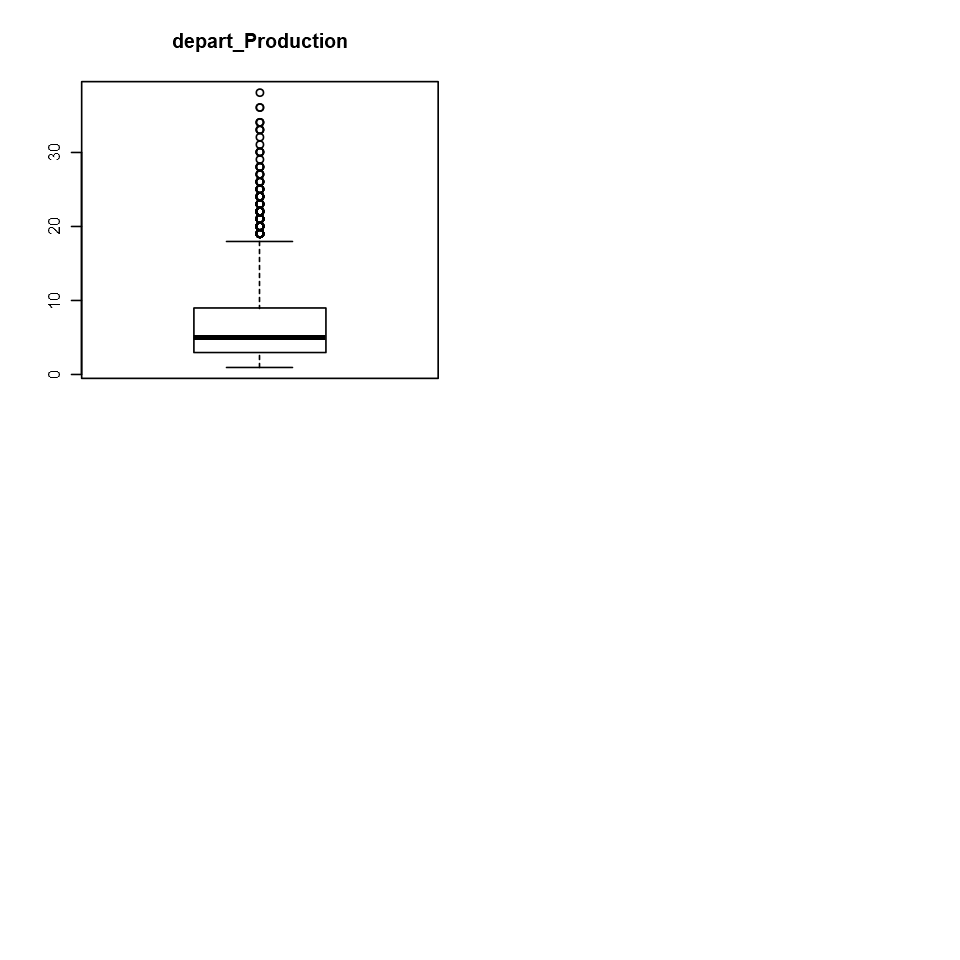

column name: keyword_cnt


Data.Type: Numeric




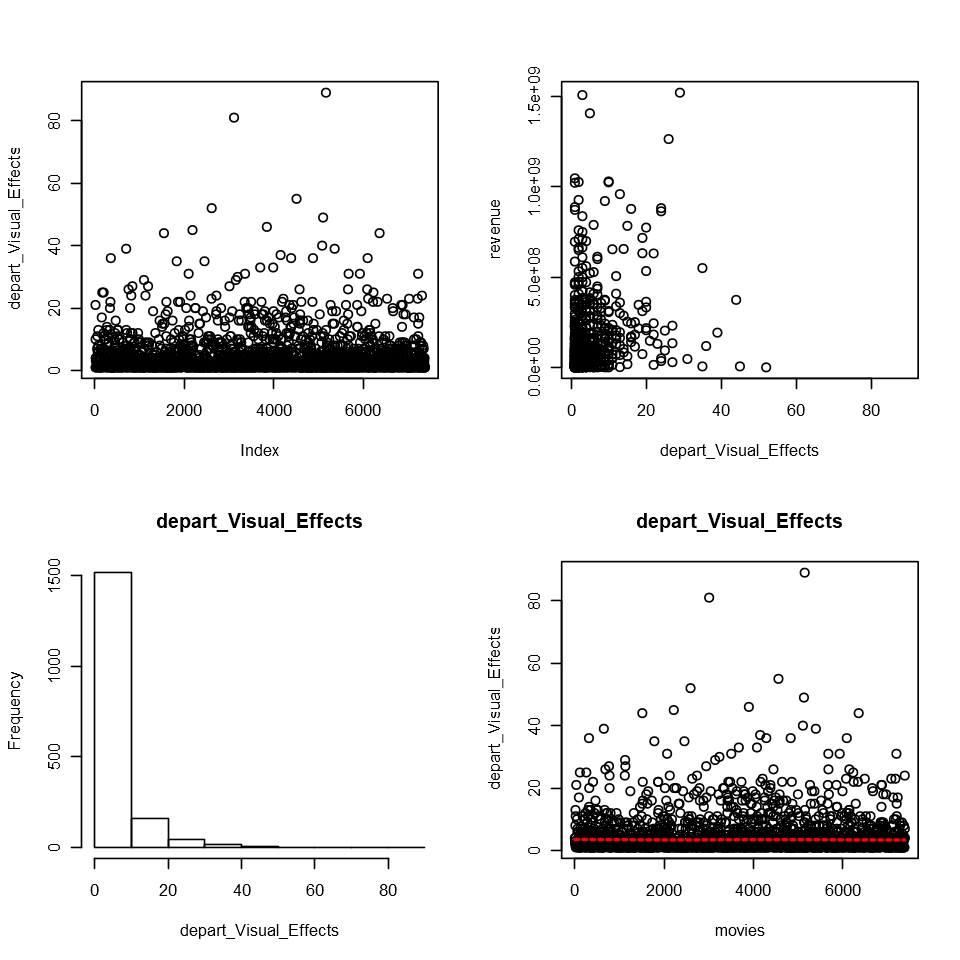

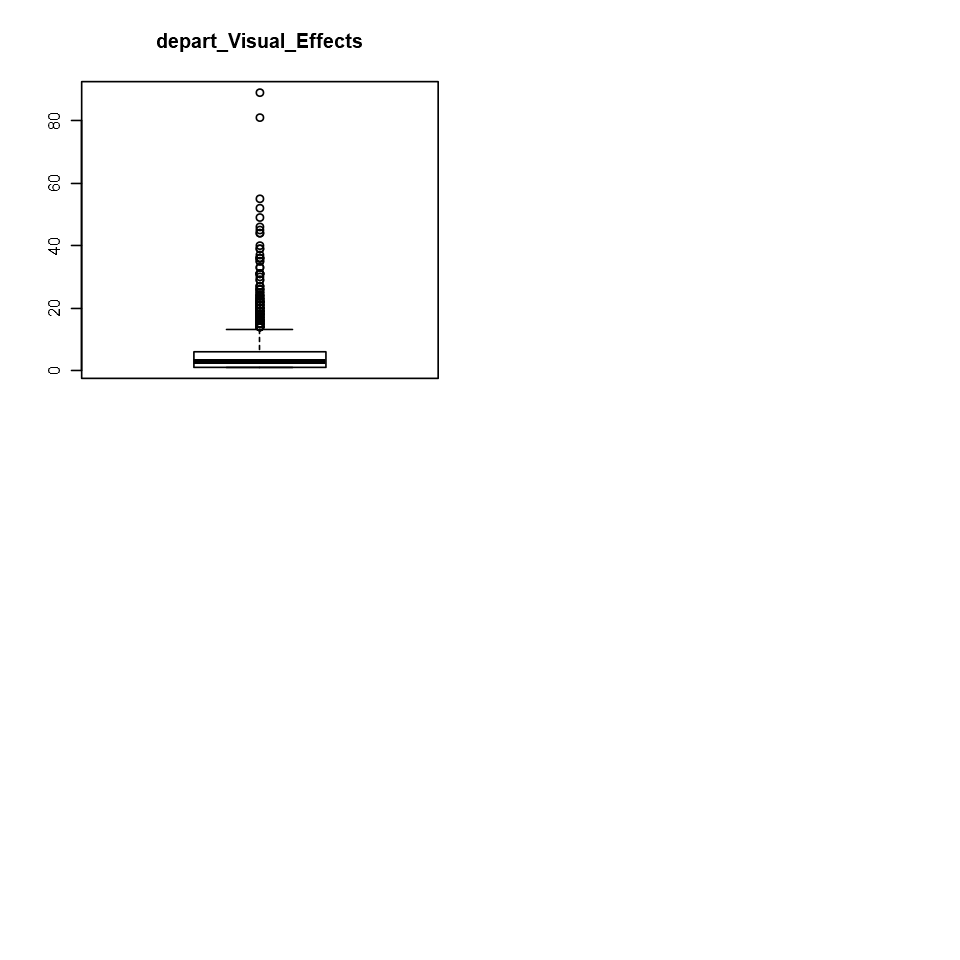

column name: depart_Crew


Data.Type: Numeric




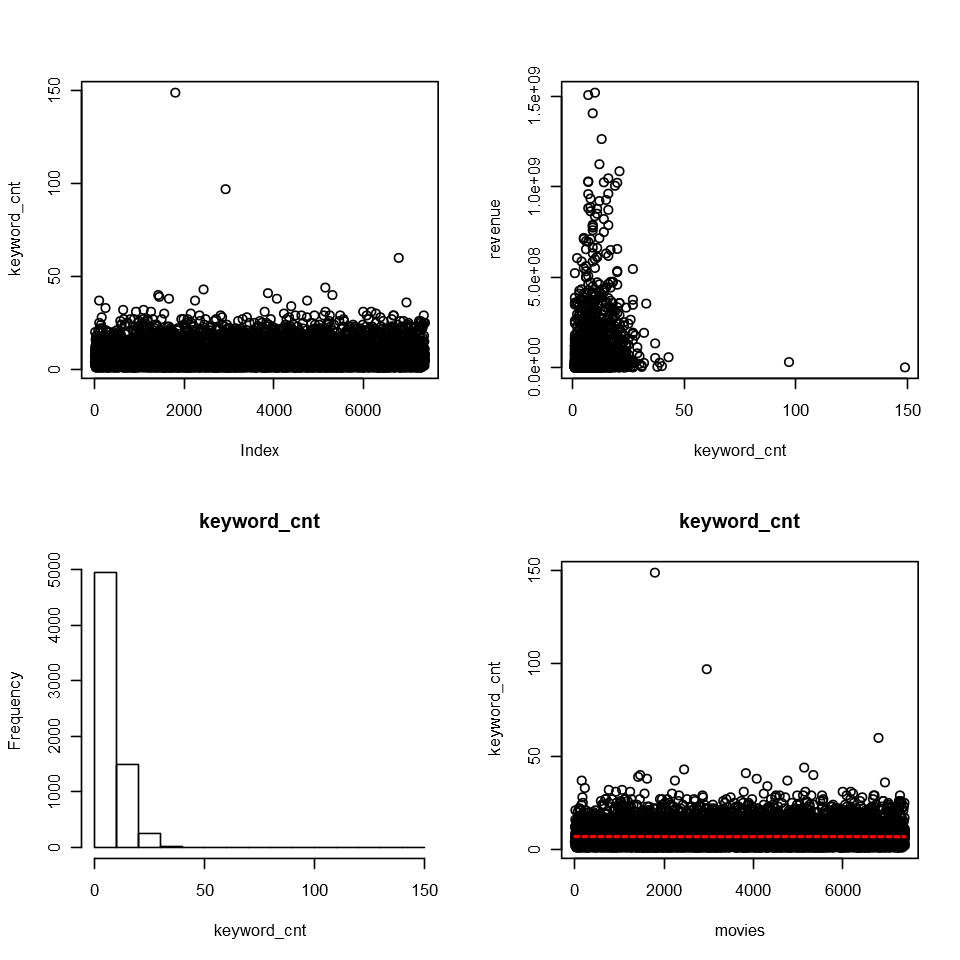

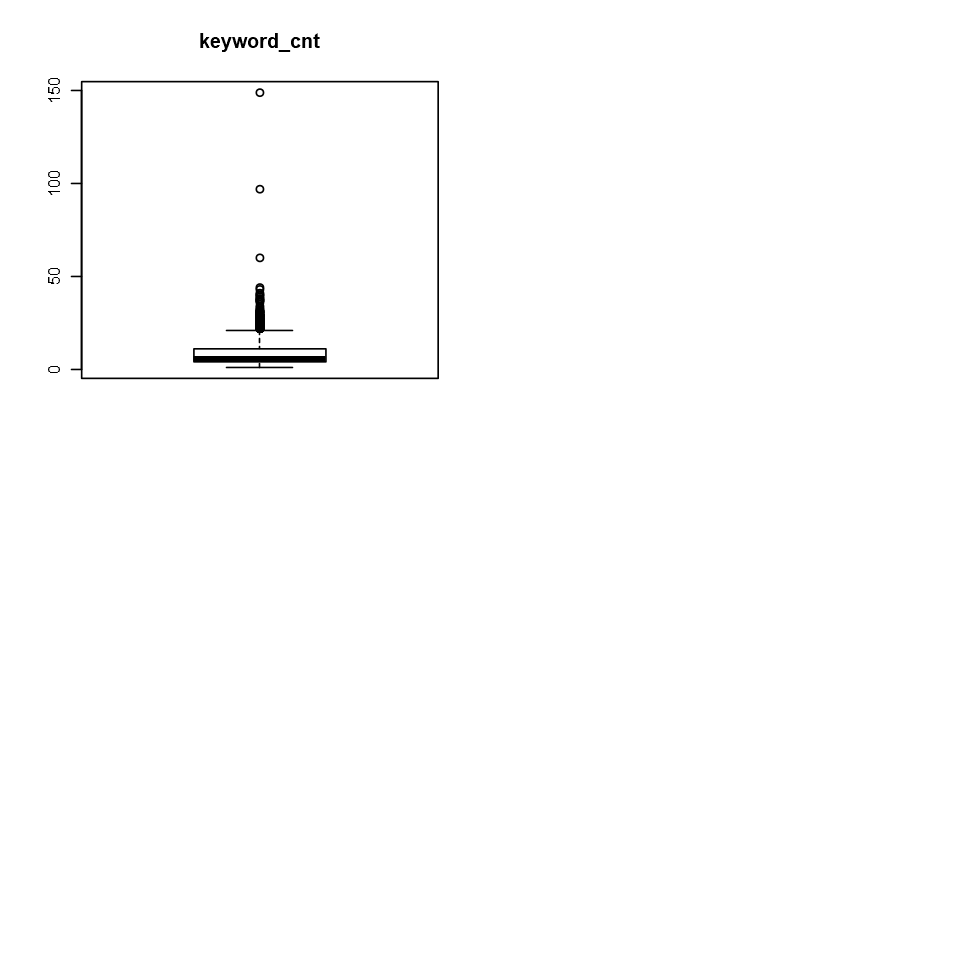

column name: actor2_movies_cnt


Data.Type: Numeric




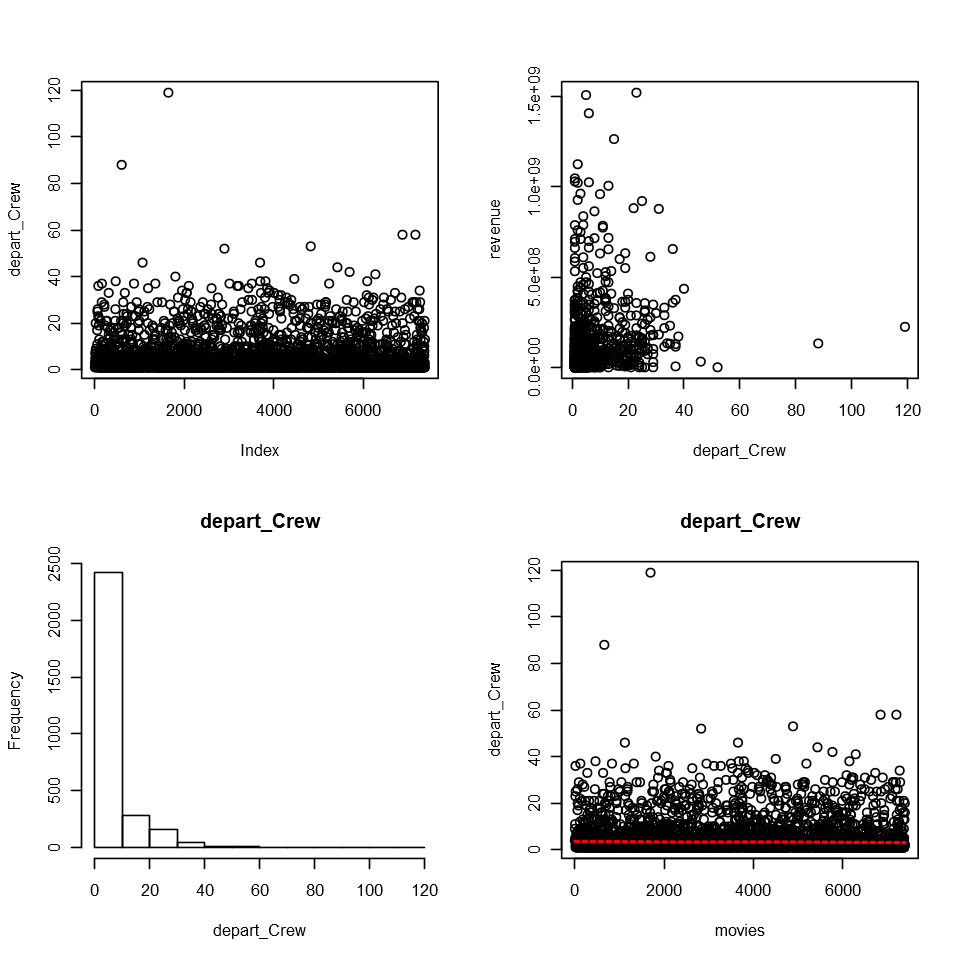

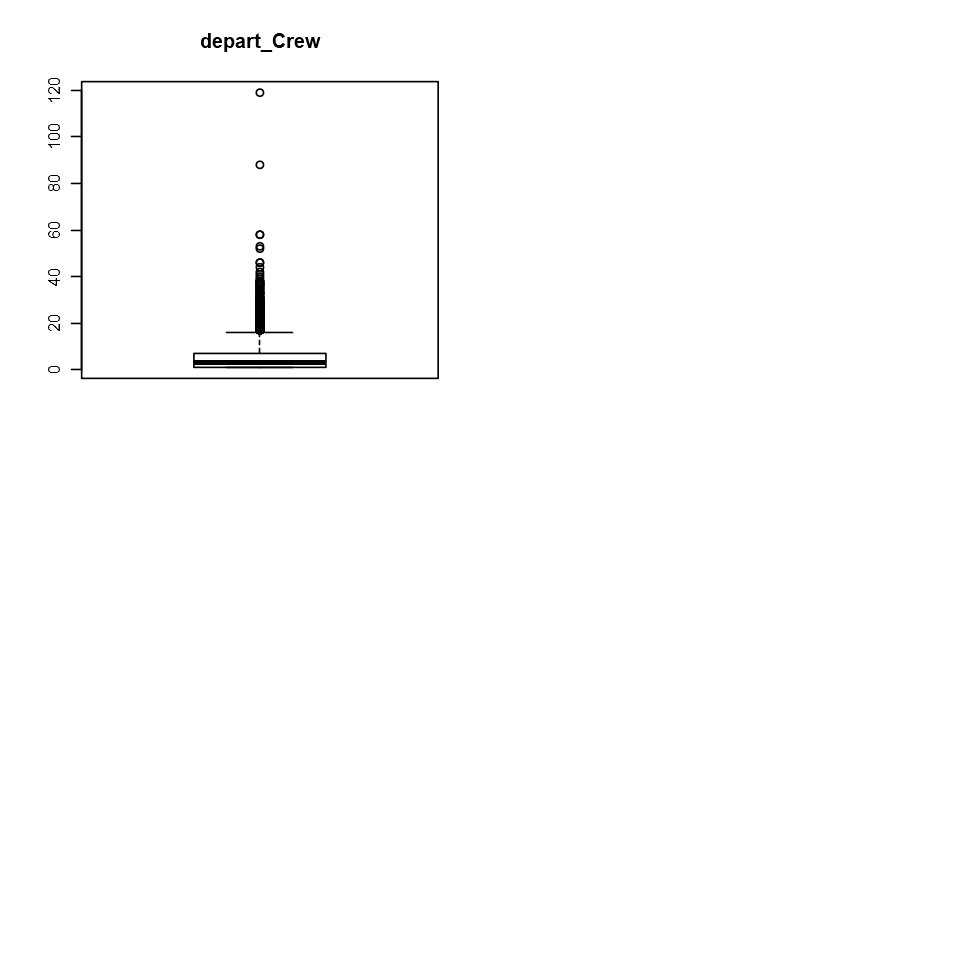

column name: actor1_movies_cnt


Data.Type: Numeric




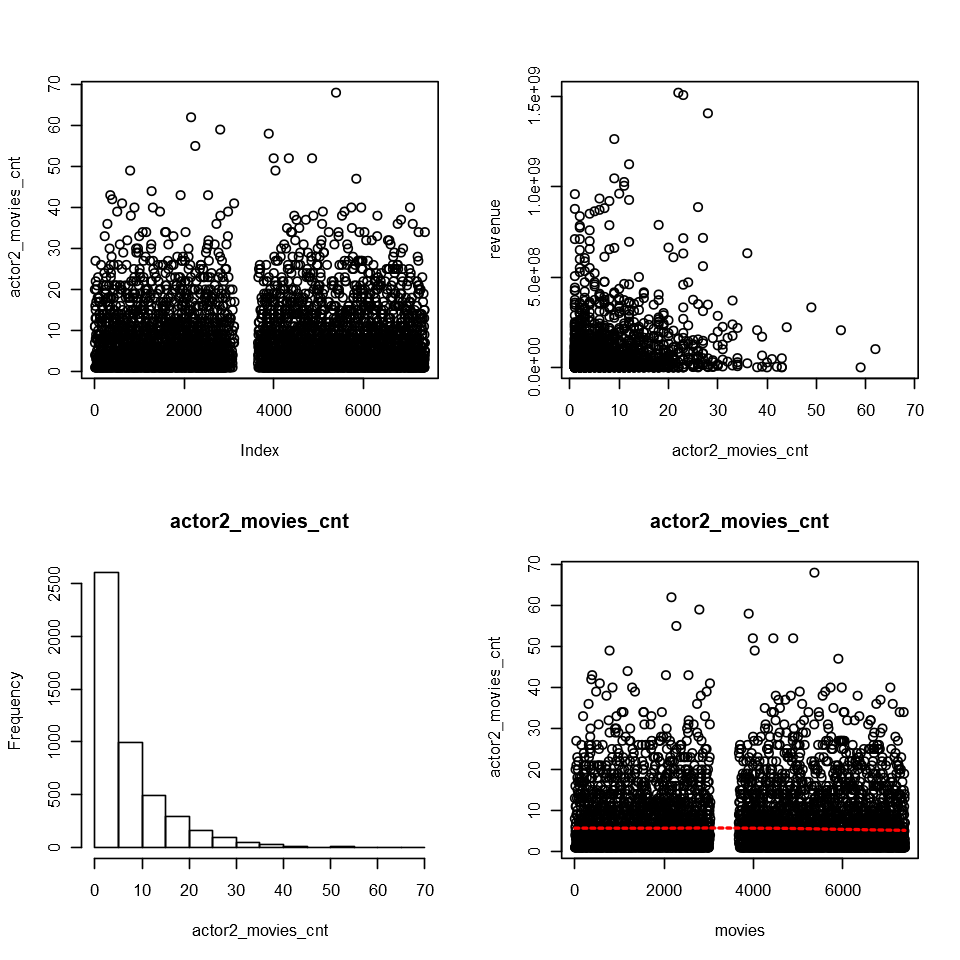

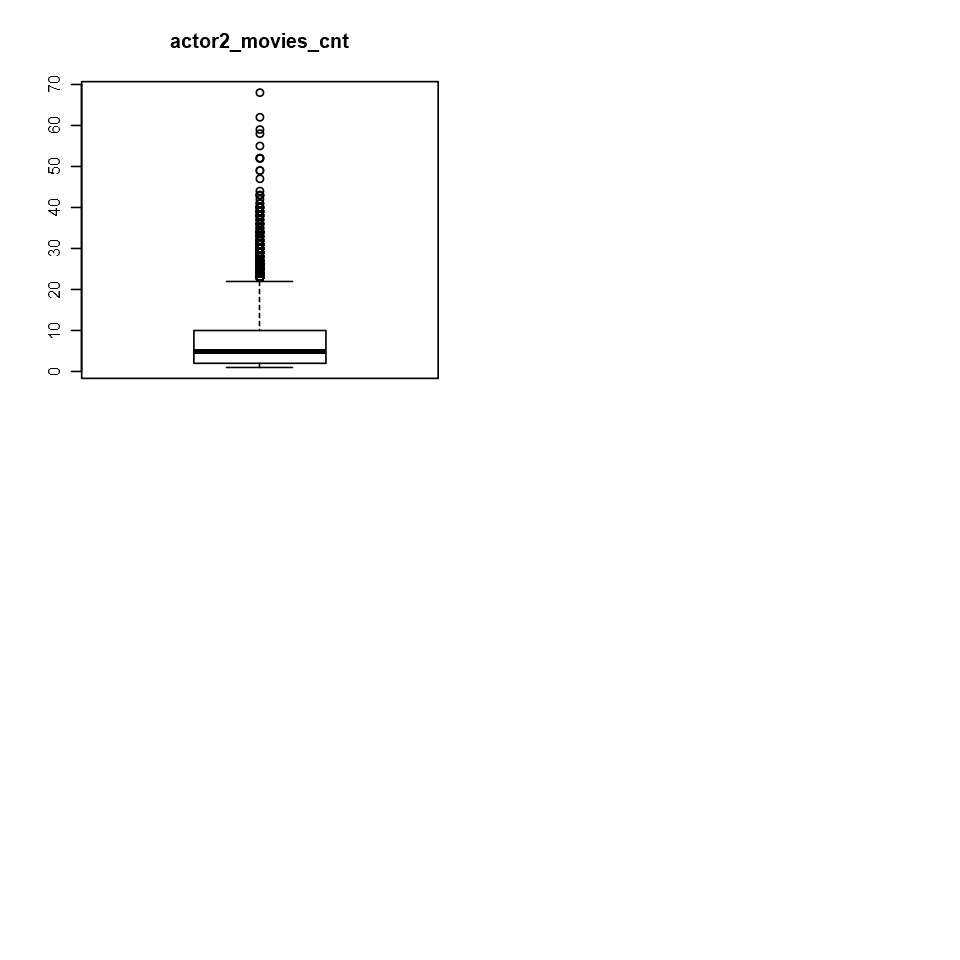

column name: actor0_movies_cnt


Data.Type: Numeric




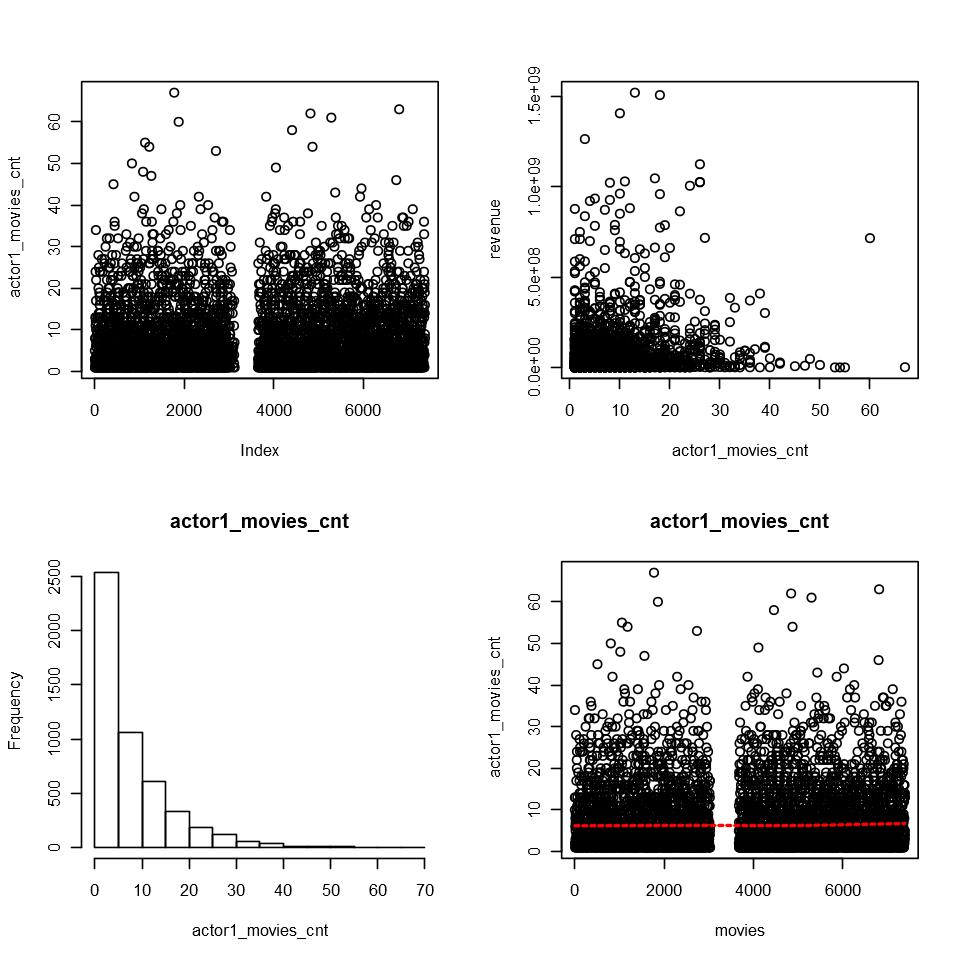

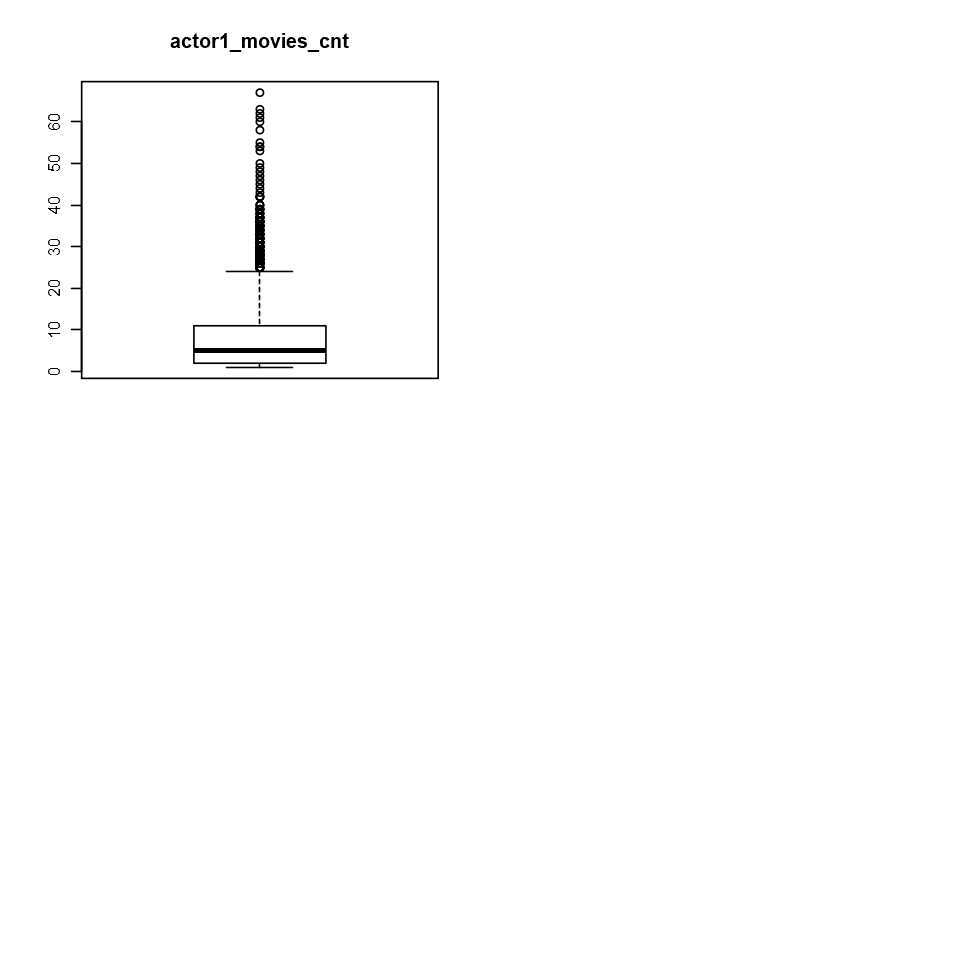

column name: runtime


Data.Type: Numeric




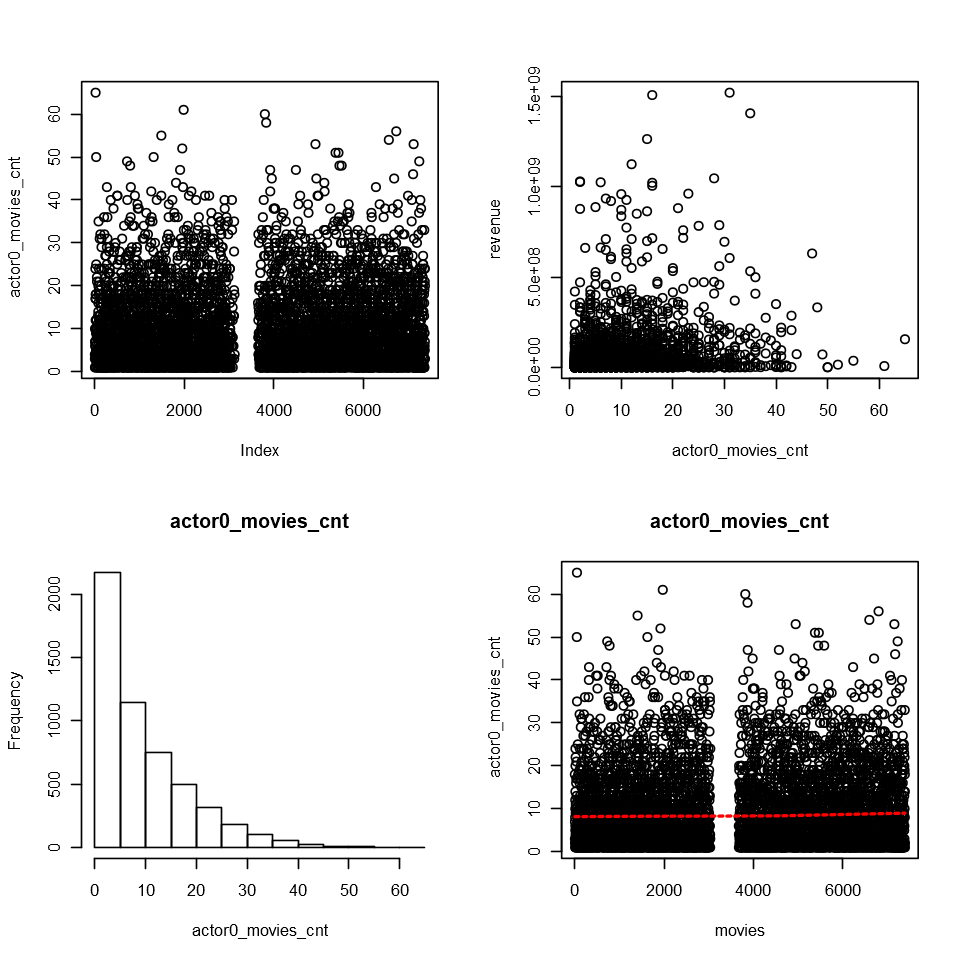

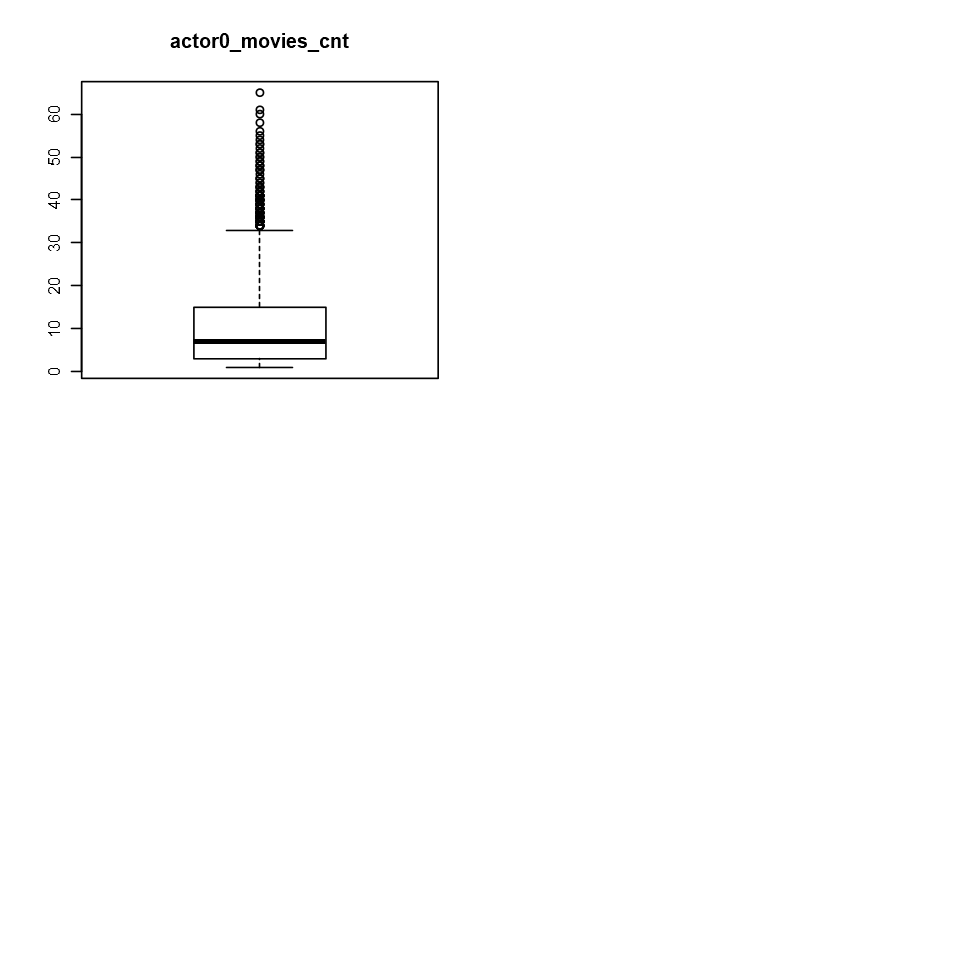

column name: budget


Data.Type: Numeric




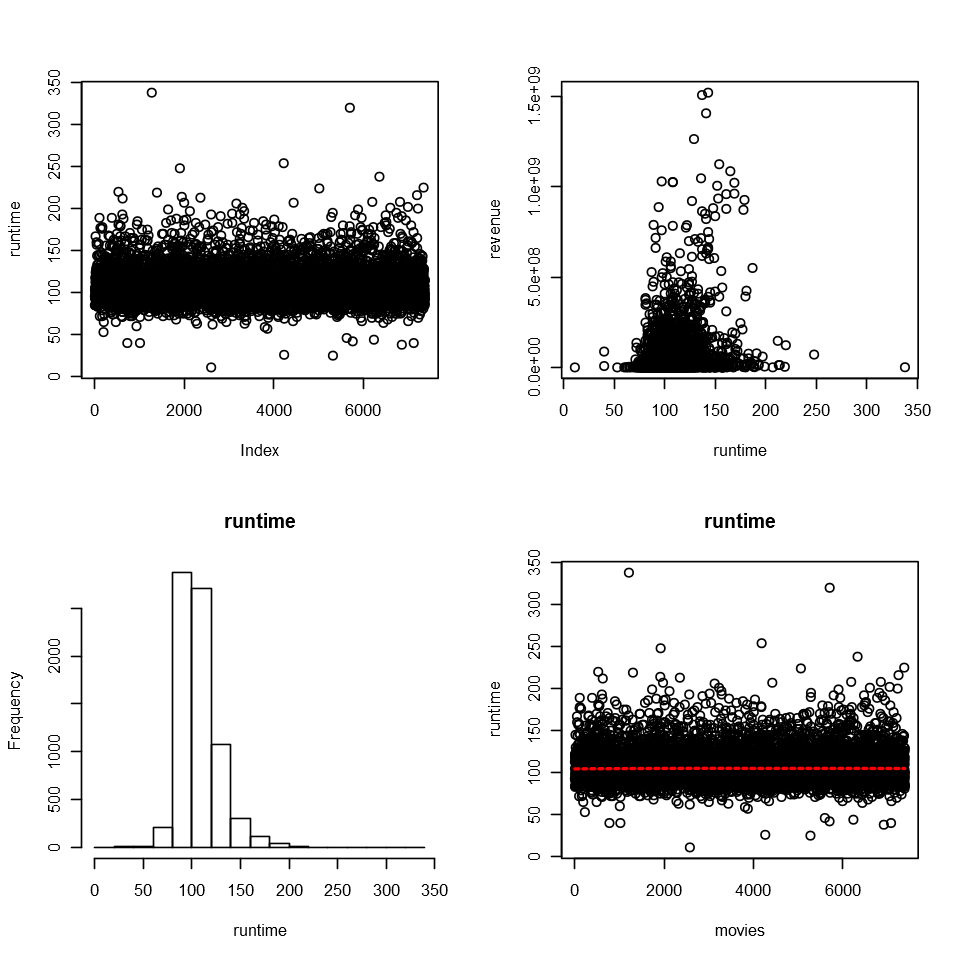

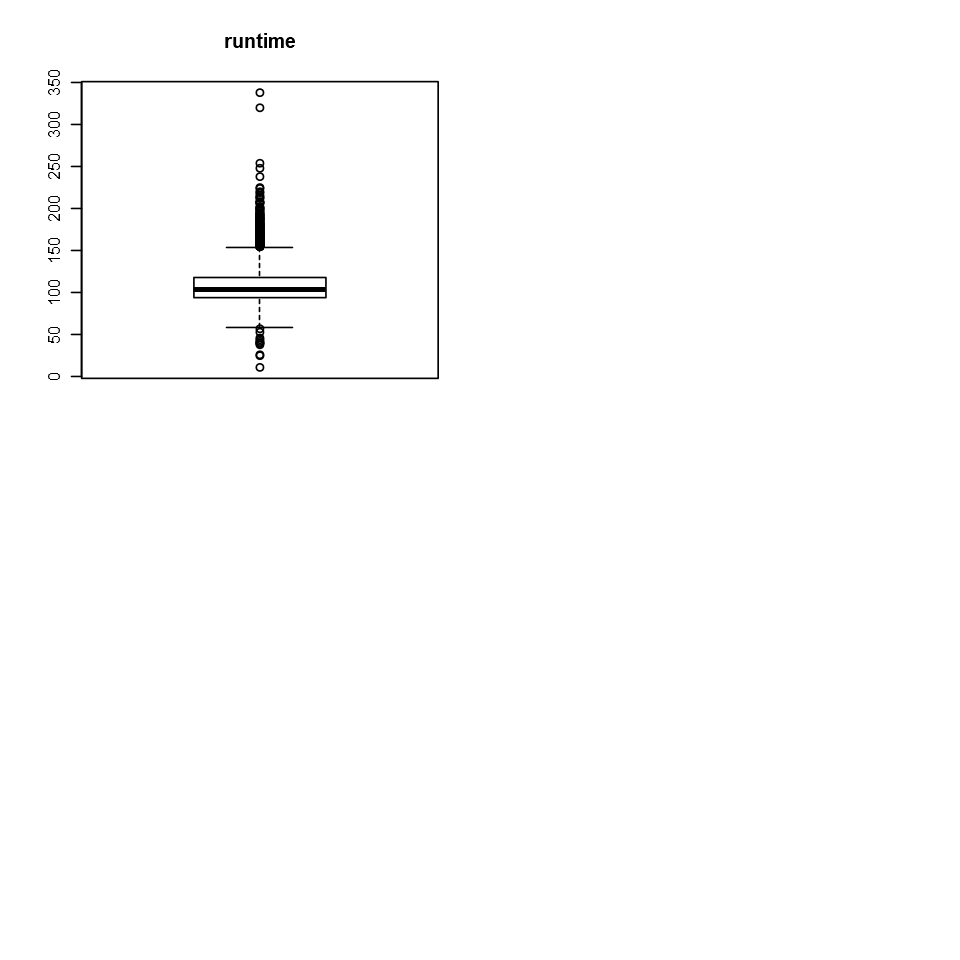

column name: actor0_prev_revenue


Data.Type: Numeric




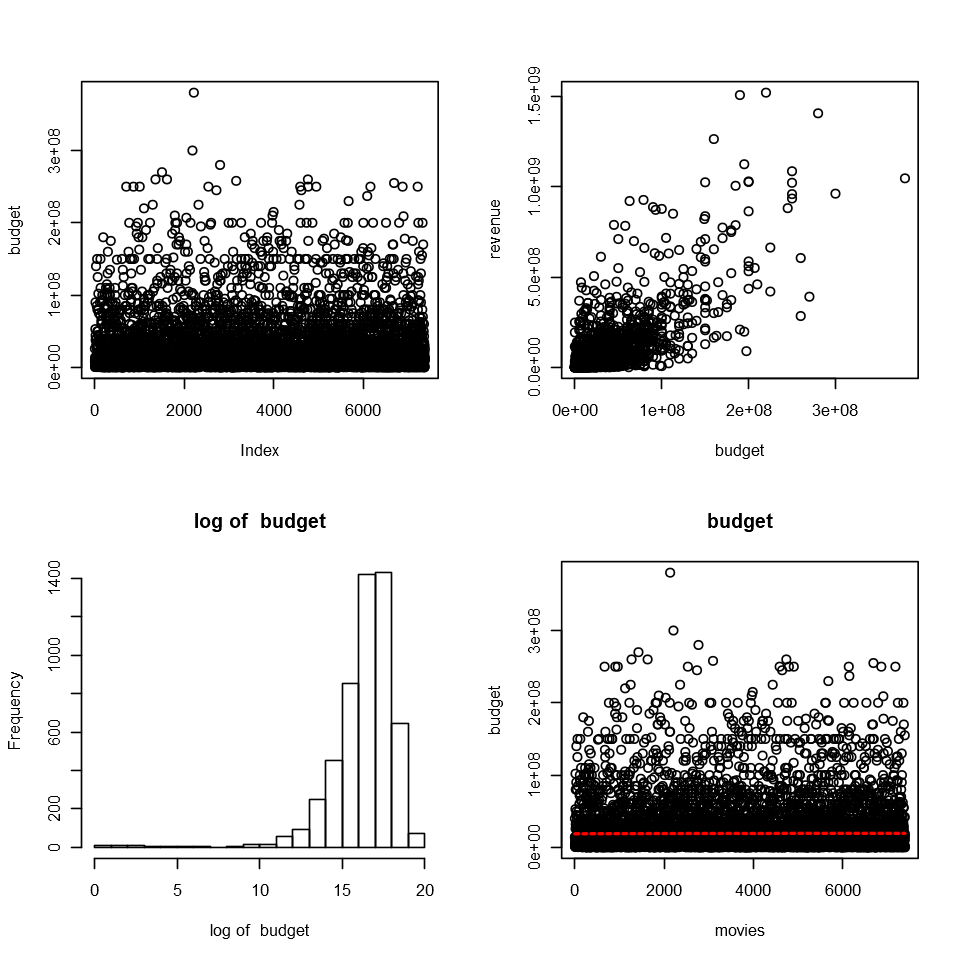

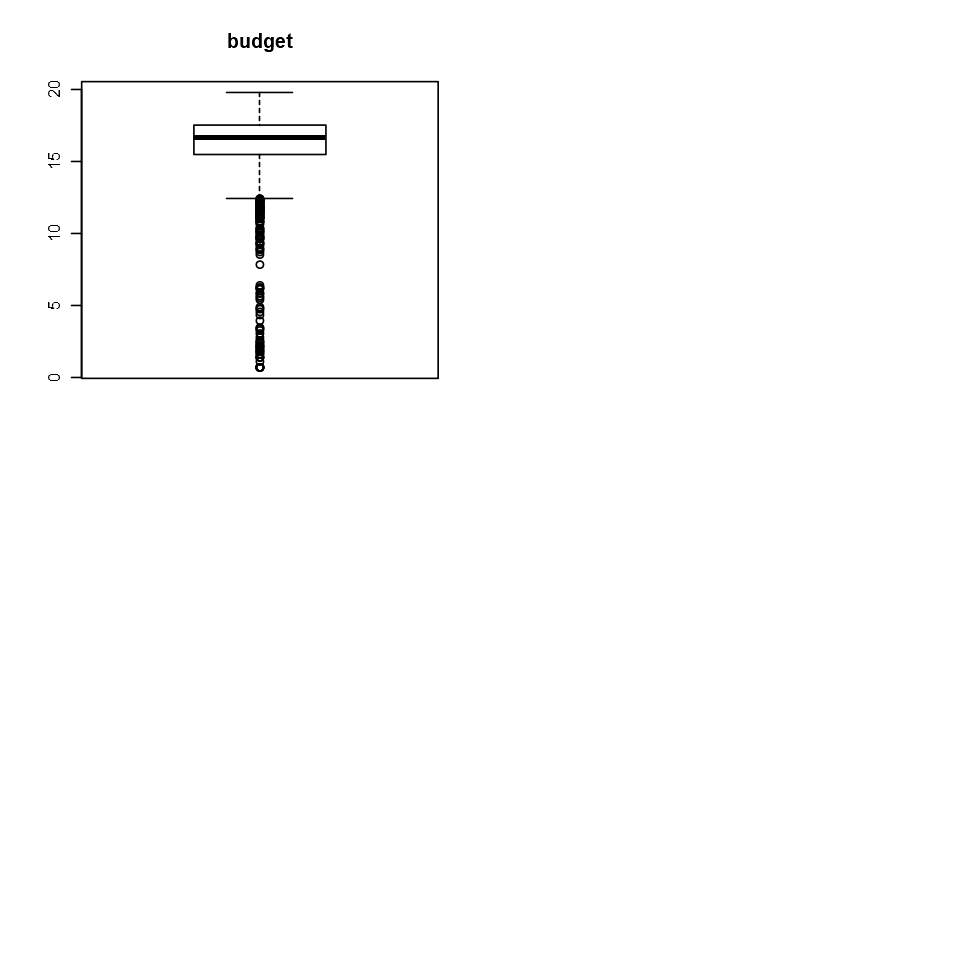

column name: actor1_prev_revenue


Data.Type: Numeric




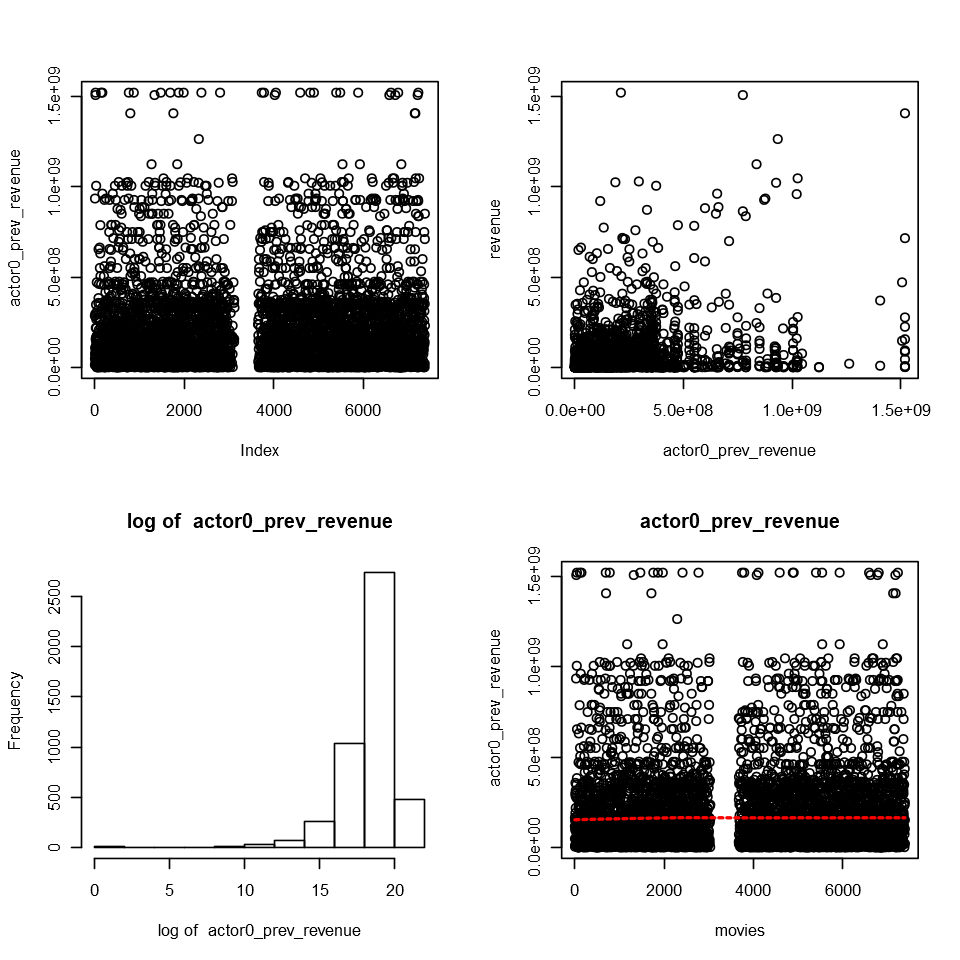

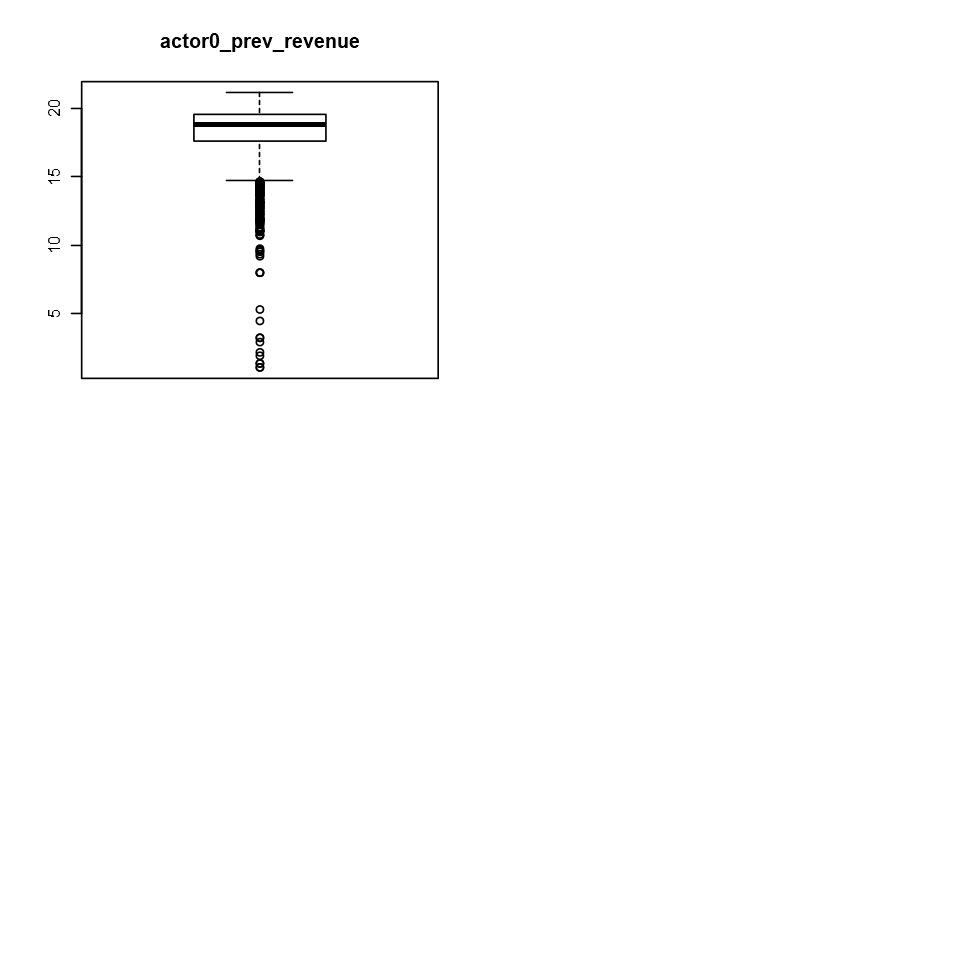

column name: actor2_prev_revenue


Data.Type: Numeric




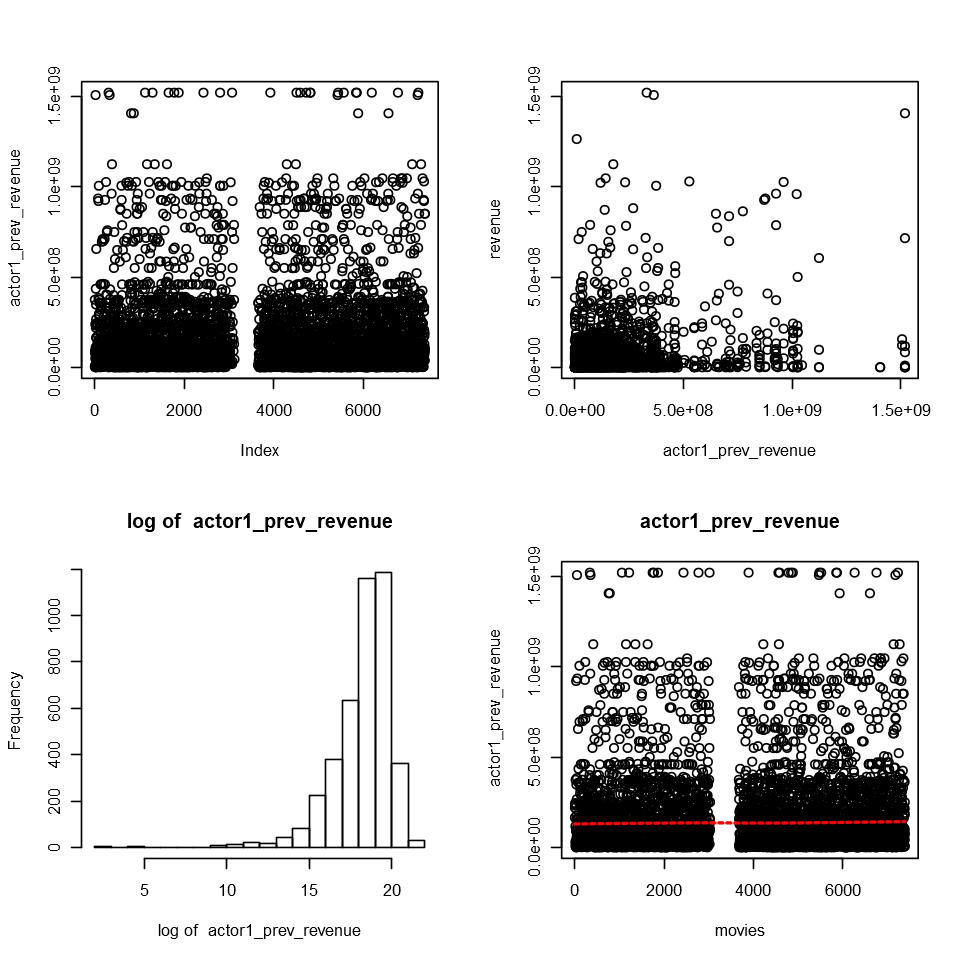

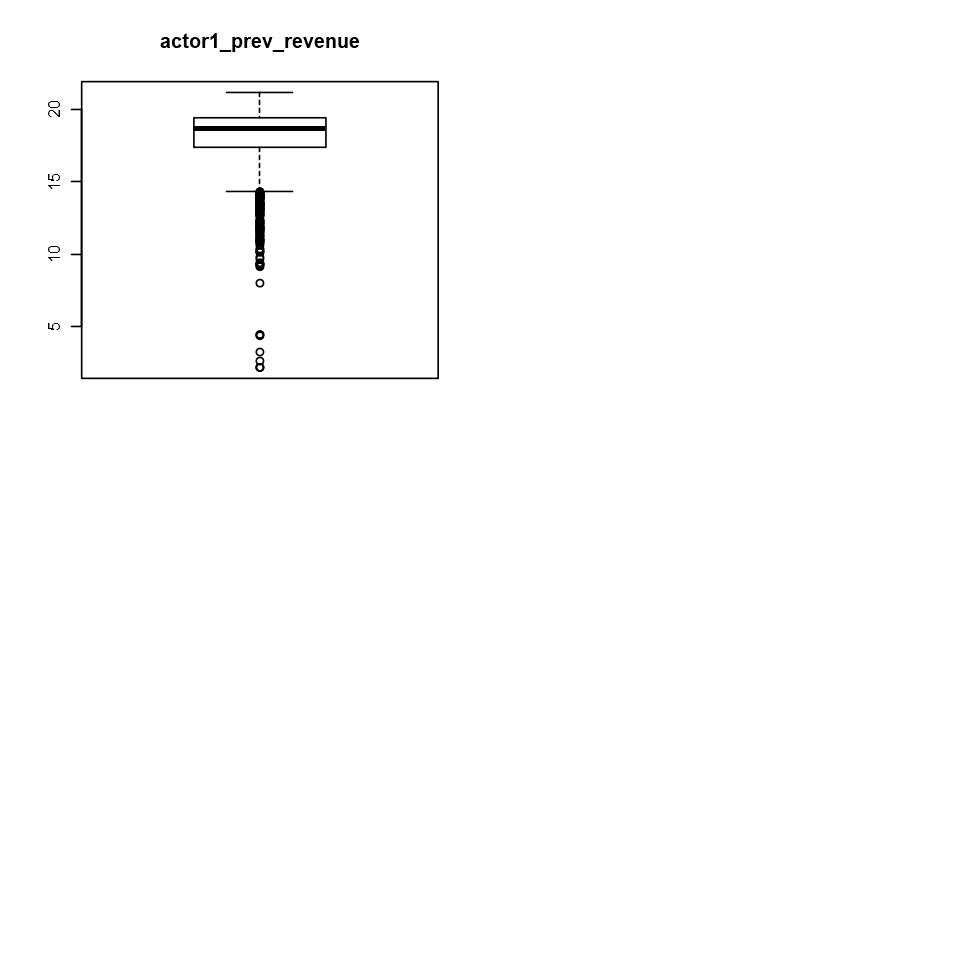

column name: revenue


Data.Type: Numeric




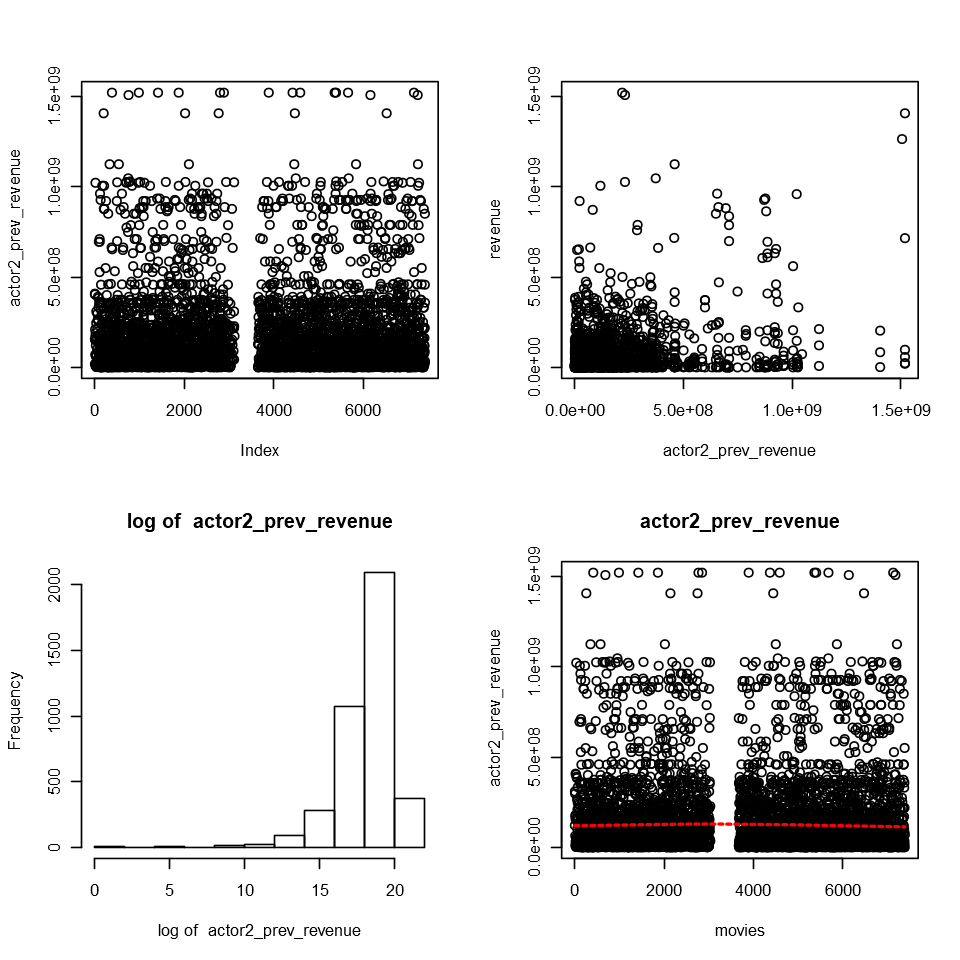

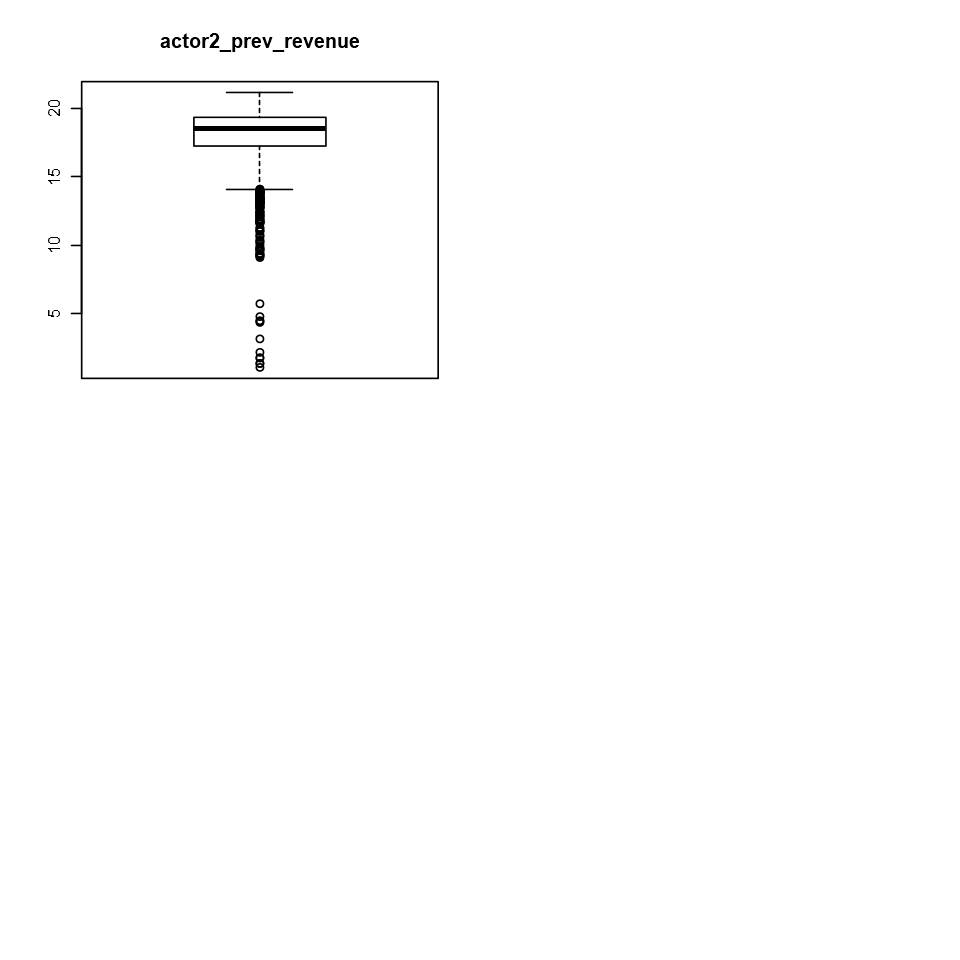

column name: popularity


Data.Type: Numeric




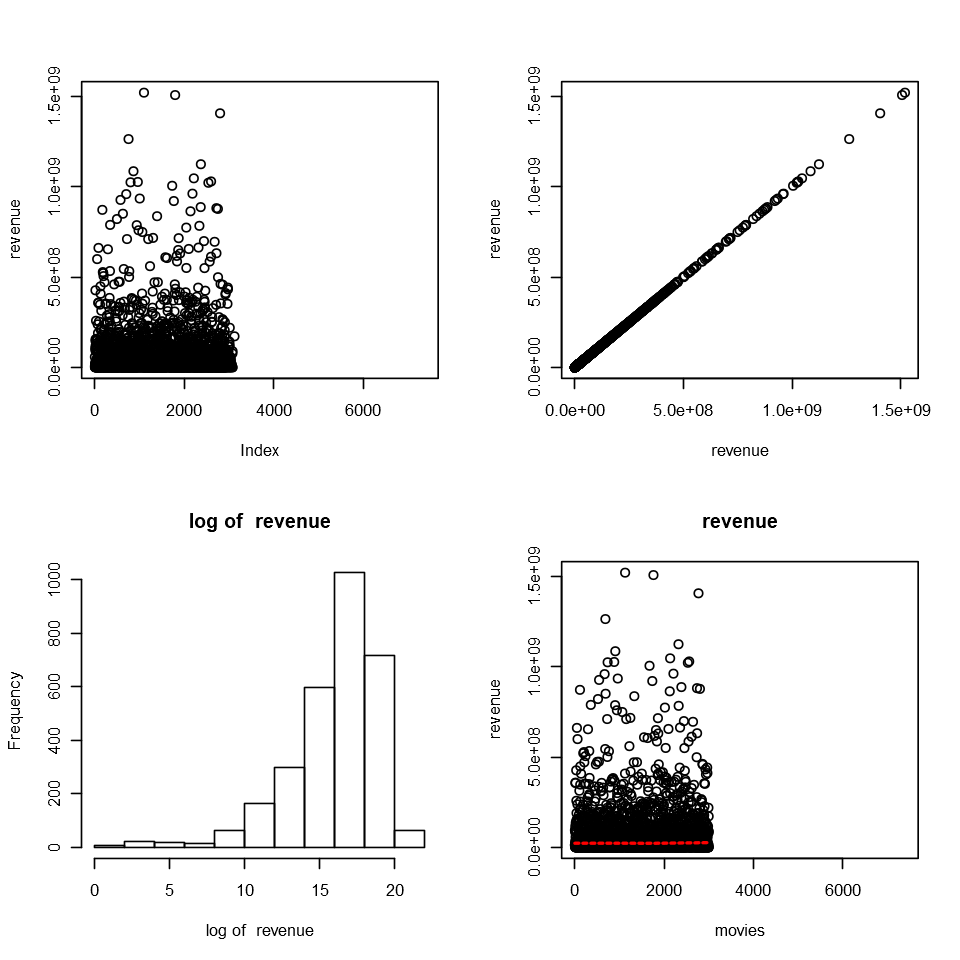

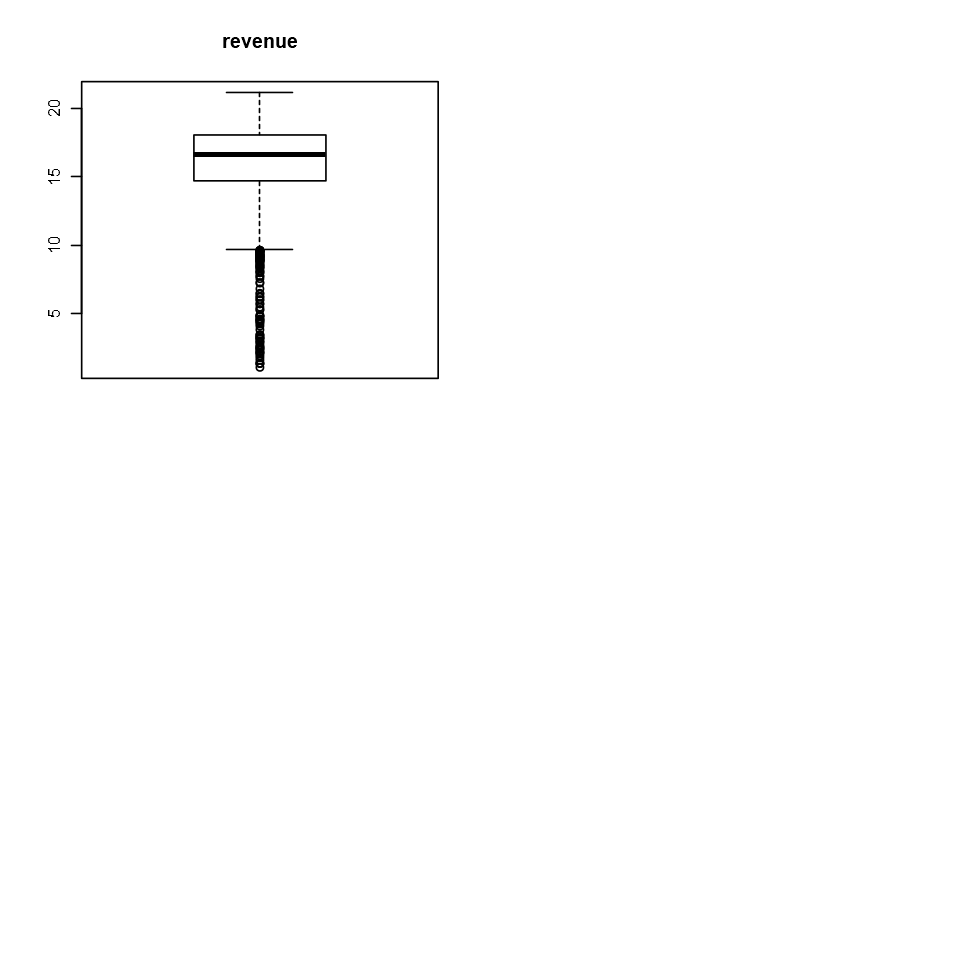

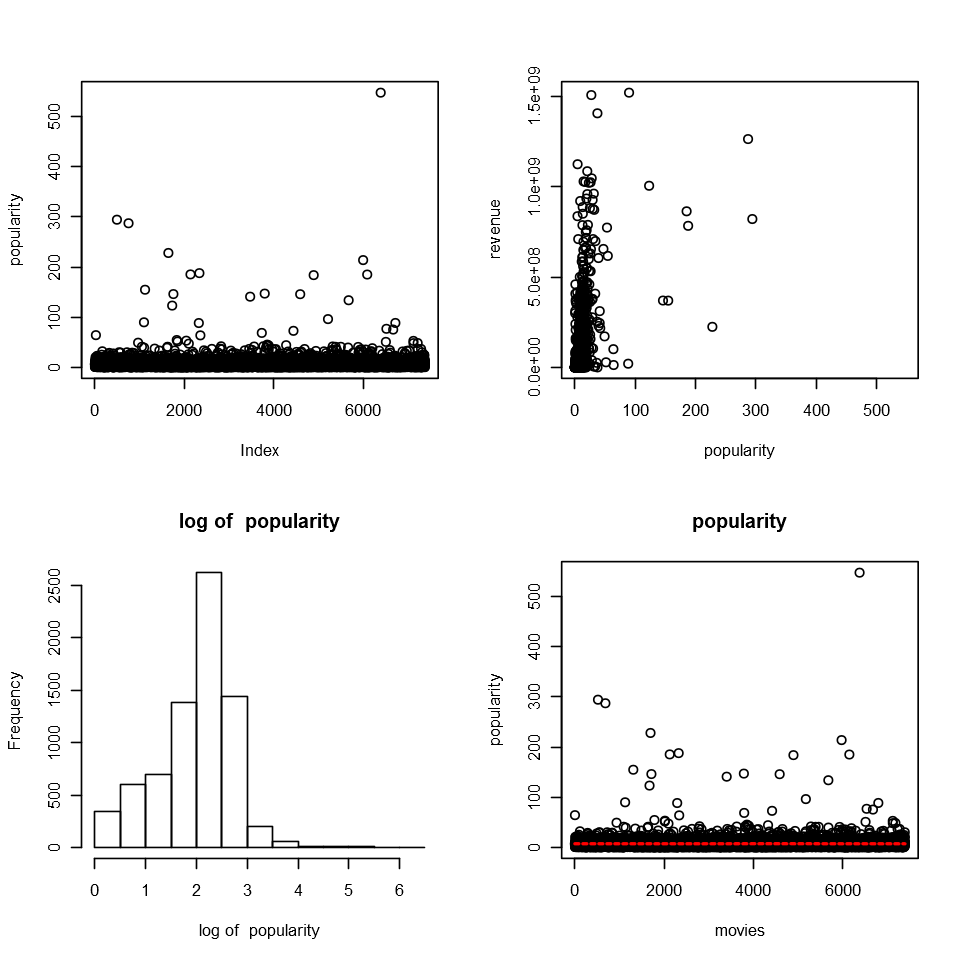

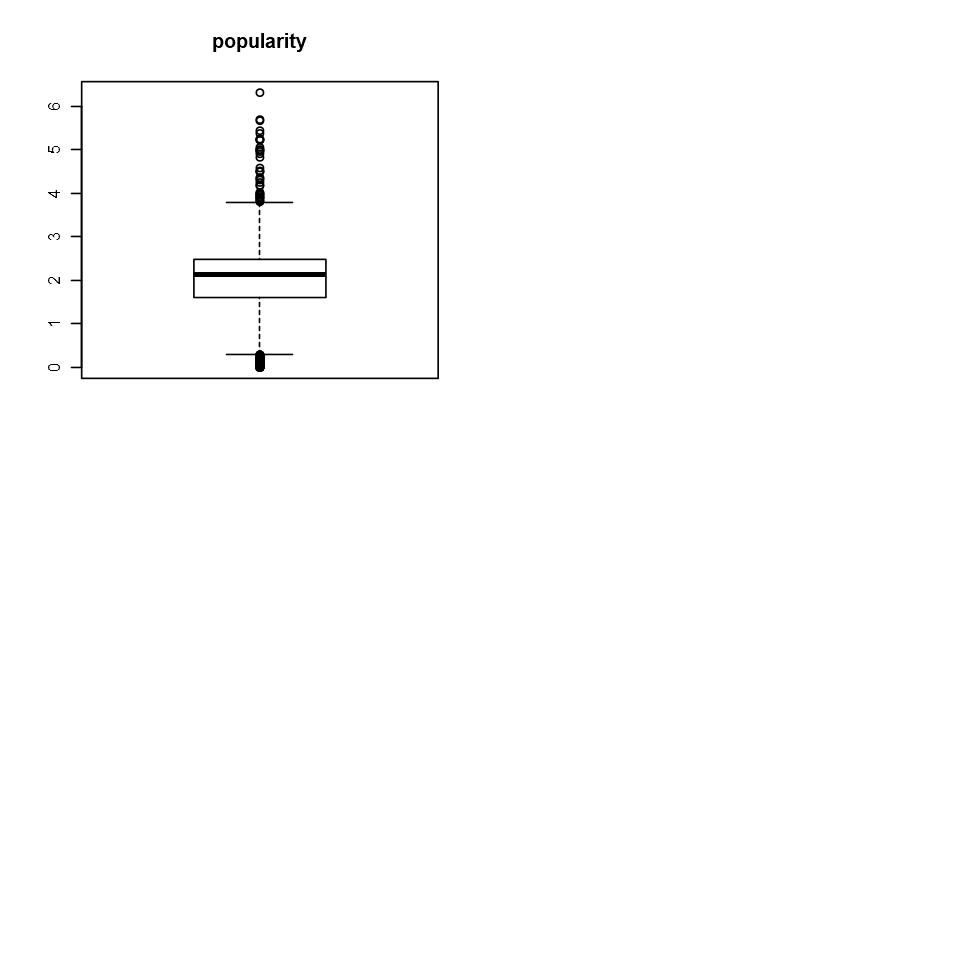

In [4]:
setwd("C://Users//Cherch//DataScience//project")

#install.packages("openxlsx")
require("openxlsx")
require("tidyverse")
require(devtools)
library(dplyr)


protocol<-read.xlsx("../project/BoxOffice - Data Retrieval Protocol.xlsx", sheet = "protocol")

head(protocol)

rownames(protocol) <- str_trim(protocol$Feature.name)

load("../data/BoxOffice_ff.RData")

##########################################################################################
# Function that print plot per variable type
##########################################################################################
doEDA <- function(data, column_name) {
    
    options(repr.plot.width = 8, repr.plot.height = 8)
    par(mfrow=c(2,2))
  
  val.type <- str_trim(protocol[column_name, 'Value.type'])
  data.type <- str_trim(protocol[column_name, 'Data.type'])
  
  
  message(sprintf("column name: %s\n", column_name))
  message(sprintf("Data.Type: %s\n", val.type))
  
  summary(data[[column_name]])
  
  
  if (!is.na(val.type) & val.type == "Numeric") {
    val.min <-   as.numeric(str_trim(protocol[column_name, 'Min']))
    val.max <- as.numeric(str_trim(protocol[column_name, 'Max']))
    
    

    plot(data[[column_name]], ylab = column_name)
    
    plot(data[['revenue']] ~ data[[column_name]], xlab=column_name, ylab = "revenue")
    
    #if more than 35 unique numbers
    if (protocol[column_name,"Unique.count"] > 35) {
      #if differencce between the min and max is bigger than 1000 present log
      if ((val.max - val.min) > 1000) {
        hist(log(data[[column_name]]+1), main = paste("log of ", column_name), xlab = paste("log of ", column_name))
      } else {
        hist(data[[column_name]], main = column_name, xlab = column_name)
      }
      
      scatter.smooth(data[[column_name]] ~ data[['movie_id']], main=column_name, xlab="movies",ylab=column_name, family="symmetric",
                     lpars =list(col = "red", lwd = 2, lty = 2))
    } else {
      barplot(table(data[[column_name]]), main = column_name)
    }
    
    
    # if differencce between the min and max is bigger than 1000 present log
    delta<-(val.max - val.min)
    if (!is.na(delta) & delta > 1000) {
      boxplot(log(data[column_name]+1),main=column_name)
    } else {
      boxplot(data[column_name],main=column_name)
    }
    
  } else if (!is.na(val.type) & val.type == "Categorical") {
    
    if (!is.na(data.type) & data.type != "Text") {
      table(data[[column_name]])
      
      barplot(table(data[[column_name]]), main = column_name)
      #plot(data[['revenue']] ~ data[[column_name]], xlab=column_name)
    }
    
    ggplot(data)+
      geom_density(aes(log(data[['revenue']]), group=data[[column_name]], color=data[[column_name]]))
  }
    par(mfrow=c(1,1))
}

##########################################################################################
# clean the movies - replace all the NULL values with Na
##########################################################################################
cmovies<-movies
for (n in 2:nrow(protocol)){
  val<-str_trim(protocol$Null[n])

  feature<-str_trim(protocol$Feature.name[n])
  
  # set the NULL value to be Na
  if (!is.na(val) & (val == "0" || val == "1")) {
    cmovies[feature]<- na_if(cmovies[feature], as.numeric(val))
  }
}

##########################################################################################
# print the summary and graphs per variable on cmovies 
##########################################################################################
# Run in loop over the parameters and plot graph based on the variable type



#remove depart_Lighting_female as it has all the values = 0
#cmovies<-cmovies[-grep('depart_Lighting_female', names(cmovies))]
#protocol<-protocol[-grep('depart_Lighting_female', rownames(protocol)), ]

#remove depart_Visual_Effects_female as it has all the values = 0
#cmovies<-cmovies[-grep('depart_Visual_Effects_female', names(cmovies))]
#protocol<-protocol[-grep('depart_Visual_Effects_female', rownames(protocol)), ]


#remove movie_id from protocol
#cmovies<-cmovies[-grep('sw_collection', names(cmovies))]
#protocol<-protocol[-grep('sw_collection', rownames(protocol)), ]

#remove movie_id from protocol
protocol<-protocol[-grep('movie_id', rownames(protocol)), ]

for (n in rownames(protocol)){
    doEDA(cmovies, n)
    
    Sys.sleep(10)
}



In [ ]:
##########################################################################################
# Correlation Graph 
##########################################################################################


# list all the numeric variables
numerics<-str_trim(protocol$Feature.name[protocol$Value.type == "Numeric"])


# list all the cat variables 
categoricals<-str_trim(protocol$Feature.name[protocol$Value.type == "Categorical"])

#remove movie_id
categoricals<-categoricals[-grep('movie_id', categoricals)]

#remove original_languages
categoricals<-categoricals[-grep('original_language', categoricals)]

#remove runtime_cat
categoricals<-categoricals[-grep('runtime_cat', categoricals)]

#cmovies$original_language_num<-factor(cmovies$original_language)
#cmovies$original_language_num<-as.numeric(levels(cmovies$original_language_num))[cmovies$original_language_num]
#cmovies$runtime_cat<-factor(cmovies$runtime_cat)

#install.packages("corrplot")
library(corrplot)

corr<-cor(cmovies[numerics], method = "pearson", use = "complete.obs")

corrplot(corr, method="circle")


corr<-cor(cmovies[categoricals], method = "spearman", use = "complete.obs")

corrplot(corr, method="circle")



both<-c(numerics, categoricals)

corr<-cor(cmovies[both], method = "spearman", use = "complete.obs")

corrplot(corr, method="circle")




In [ ]:

##########################################################################################
# Missing Values heatmap
##########################################################################################
missingMatrix <- function(data) {
  vn <- names(data)
  missdata <- data.frame(row1=1:nrow(data))
  for(v in vn) {
    mv <- ifelse(is.na(data[[v]]),1,0)
    missdata[v] <- mv
  }
  missdata$row1 <- NULL
  return(missdata)
}

miss<-missingMatrix(cmovies)

options(repr.plot.width = 4, repr.plot.height = 4)
library(naniar)
vis_miss(cmovies[numerics])

vis_miss(cmovies[categoricals])



In [ ]:
##########################################################################################
# Outliers: checking distribution with and without outliers
# Outliers: checking distribution with and without outliers agains revenue
##########################################################################################

# list all the numeric variables
numerics<-str_trim(protocol$Feature.name[protocol$Value.type == "Numeric"])

outlierMatrix <- function(data,threshold=1.5) {
  vn <- names(data)
  outdata <- data.frame(row1=1:nrow(data))
  for(v in vn) {
    if(is.numeric(data[[v]])) {
      med<- median(data[[v]], na.rm = T)
      outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
      outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
      irq_level <- (outhigh - outlow) * threshold
      outlow <- outlow - irq_level
      outhigh <- outhigh +  irq_level
      mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
      outdata[v] <- mv
    } else {
      mv <- rep(0,nrow(data))
    }
  }
  outdata$row1 <- NULL
  return(outdata)
}

out<-outlierMatrix(cmovies,threshold = 2.0)

#cmovies with cleaned outliers
ocmovies<-cmovies

options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(2,2))
for(v in numerics) {
  #look on variable with some variability
  if (protocol[v,"Unique.count"] > 35) {
    print(v)
  
    ##############################
    #Handle outliers
    ##############################
    
    #drop outlier value (replace by NA)
    ocmovies[which(out[v] == 1), v]<-NA

    hist(cmovies[[v]], freq = FALSE, xlab = v,  main = "With Outliers")
    lines(density(cmovies[[v]], na.rm = TRUE))
    
    hist(ocmovies[[v]], freq = FALSE,xlab = v,  main = "Without Outliers")
    lines(density(ocmovies[[v]], na.rm = TRUE))
    
    plot(y = cmovies$revenue, x = cmovies[[v]], pch = 16, cex = 1.3, col = "blue", main = "Distribution against Revenure(with Outliers)", xlab = v, ylab = "revenue")
    abline(lm(cmovies$revenue ~ cmovies[[v]]))

    plot(y = ocmovies$revenue, x = ocmovies[[v]], pch = 16, cex = 1.3, col = "blue", main = "Distribution against Revenure(with Outliers)", xlab = v, ylab = "revenue")
    abline(lm(ocmovies$revenue ~ ocmovies[[v]]))
    
  }
}
par(mfrow=c(1,1))



In [ ]:
##########################################################################################
# Misssing: for each variable checking distribution with and without missing against all the other varaibles
##########################################################################################

miss<-missingMatrix(ocmovies)

head(missmovies)

for(v in numerics) {
  for(j in numerics) {
    val.min <-   as.numeric(str_trim(protocol[v, 'Min']))
    val.max <- as.numeric(str_trim(protocol[v, 'Max']))
    
    
  
    #if more than 35 unique numbers
#    if (protocol[v,"Unique.count"] > 35) {
      #if differencce between the min and max is bigger than 1000 present log
      
      if (v!=j)
      {
        if ((val.max - val.min) > 1000) {
          ggplot(ocmovies) +
            geom_density(aes(log(ocmovies[[v]]), group=miss[[j]], color=miss[[j]] + 1))
        }
        else
        {
          ggplot(ocmovies) +
            geom_density(aes(ocmovies[[v]], group=miss[[j]], color=miss[[j]] + 1))
          
          
        }
      }
#    }
  }
}

##########################################################################################
# Misssing: Create a table with all the variable that have missing values and explain how missings were created (MCAR and etc.)
##########################################################################################

##########################################################################################
# Misssing: Do imputation for each variable according to the appropriate technic
##########################################################################################

